In [14]:
import re
import os
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

In [2]:
evaluate_result_path = 'G:\\dataset\\corpus\\BNC\\Stem\\evaluateResult'

In [3]:
result_files = {}
for root, dirs, files in os.walk(evaluate_result_path):
    for file in files:
        if file == 'result.txt':
            result_file_path = os.path.join(root, file)
            
            info_list = result_file_path.split('evaluateResult')[1].split('\\')[1:-1]
            domain = info_list[0]
            name = info_list[1]
            for i in info_list[2:]:
                name += '-' + i
            if not domain in result_files.keys():
                result_files[domain] = {}
            result_files[domain][name] = result_file_path

In [4]:
Matrics = namedtuple('matrics', ['OI', 'UI', 'RI', 'AOL', 'AUL', 'P',
                                 'R', 'F1', 'PC', 'RC', 'F1C'])
matrics = {}
for domain, stemmers in result_files.items():
    for stem, file_path in stemmers.items():
#         OI = 0
#         UI = 0
#         RI = 0
#         AOL = 0
#         AUL = 0
#         P = 0
#         R = 0
#         F1 = 0
#         PC = 0
#         RC = 0
#         F1C = 0
        file = open(file_path, 'r', encoding='utf-8')
        for line in file:
            if line[0:2] == 'RI':
                RI = float(line.split()[1])
            elif line[0:2] == 'OI':
                OI = float(line.split()[1])
            elif line[0:2] == 'UI':
                UI = float(line.split()[1])
            elif line[0:3] == 'AOL':
                AOL = float(line.split()[1])
            elif line[0:3] == 'AUL':
                AUL = float(line.split()[1])
            elif line[0:8] == 'Precise:':
                P = float(line.split()[1])
            elif line[0:7] == 'Recall:':
                R = float(line.split()[1])
            elif line[0:3] == 'F1:':
                F1 = float(line.split()[1])
            elif line[0:8] == 'Precise(':
                PC = float(line.split()[1])
            elif line[0:7] == 'Recall(':
                RC = float(line.split()[1])
            elif line[0:3] == 'F1(':
                F1C = float(line.split()[1])
        file.close()
        if domain not in matrics.keys():
            matrics[domain] = {}
        matrics[domain][stem] = Matrics(OI, UI, RI, AOL, AUL, P, R, F1, PC, RC, F1C)

In [87]:
matrics

{'ACPROSE': {'HMM-HMM-4-5': matrics(OI=0.8537330839362065, UI=0.0026801539525464864, RI=0.14358676211124705, AOL=2.6991075852483966, AUL=1.108117414134458, P=0.019840948037303515, R=0.3976769845883707, F1=0.037796165243630164, PC=0.34089394883126495, RC=0.7723245981517572, F1C=0.47300825656741),
  'HMM-HMM-4-6': matrics(OI=0.8537330839362065, UI=0.0026801539525464864, RI=0.14358676211124705, AOL=2.6991075852483966, AUL=1.108117414134458, P=0.019840948037303515, R=0.3976769845883707, F1=0.037796165243630164, PC=0.34089394883126495, RC=0.7723245981517572, F1C=0.47300825656741),
  'HMM-HMM-5-3': matrics(OI=0.002931050692100098, UI=0.22499796687124846, RI=0.7720709824366515, AOL=2.991577787398166, AUL=1.3966062817164542, P=1.0, R=0.3558911813209629, F1=0.524955374330615, PC=1.0, RC=0.7410307640359075, F1C=0.851255221151996),
  'HMM-HMM-5-4': matrics(OI=0.8001316198527957, UI=0.018461616547880037, RI=0.18140676359932426, AOL=1.8152286569212681, AUL=1.0839717074268005, P=0.11534156112053731,

In [77]:
def plot_domain_hist(stemmers_list, m):
    if m == 'P':
        index = 5
    elif m == 'R':
        index = 6
    elif m == 'F1':
        index = 7
    elif m == 'PC':
        index = 8
    elif m == 'RC':
        index = 9
    elif m == 'F1C':
        index = 10
        
    stemmer_vs_maxtrics_domain = {}
    domains = []
    for domain, stemmer_tuple in matrics.items():
        domains.append(domain)
        for stemmer, matrics_tuple in stemmer_tuple.items():
            if stemmer not in stemmer_vs_maxtrics_domain.keys():
                stemmer_vs_maxtrics_domain[stemmer] = []
            stemmer_vs_maxtrics_domain[stemmer].append(matrics_tuple[index])
    
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.figsize'] = (10, 4)
    rects = {}
    width = 0.15
    colors = ['purple', 'm', 'magenta', 'hotpink', 'pink']
    x = None
    i = 0
    for stemmer in stemmers_list:
        y = stemmer_vs_maxtrics_domain[stemmer]
        if x is None:
            x = np.array(range(len(y)), np.float32)
        else:
            x += width
        rects[stemmer] = plt.bar(x=x, height=y, width=width, label=stemmer, alpha=0.9, color=colors[i])
        i += 1
    x -= width * (len(stemmers_list) - 2)
    plt.xticks([index + width for index in x], domains)
    plt.ylabel(m, fontsize=8)
    plt.xlabel('domain', fontsize=8)
    plt.yticks(fontproperties = 'Times New Roman', size = 9)
    plt.xticks(fontproperties = 'Times New Roman', size = 9)
    plt.legend(fontsize=8)

    #plt.savefig('./domain_vs_F1C.jpg', bbox_inches = 'tight')
    #plt.savefig('./domain_vs_F1C.eps', dpi=300, format='eps', bbox_inches = 'tight')

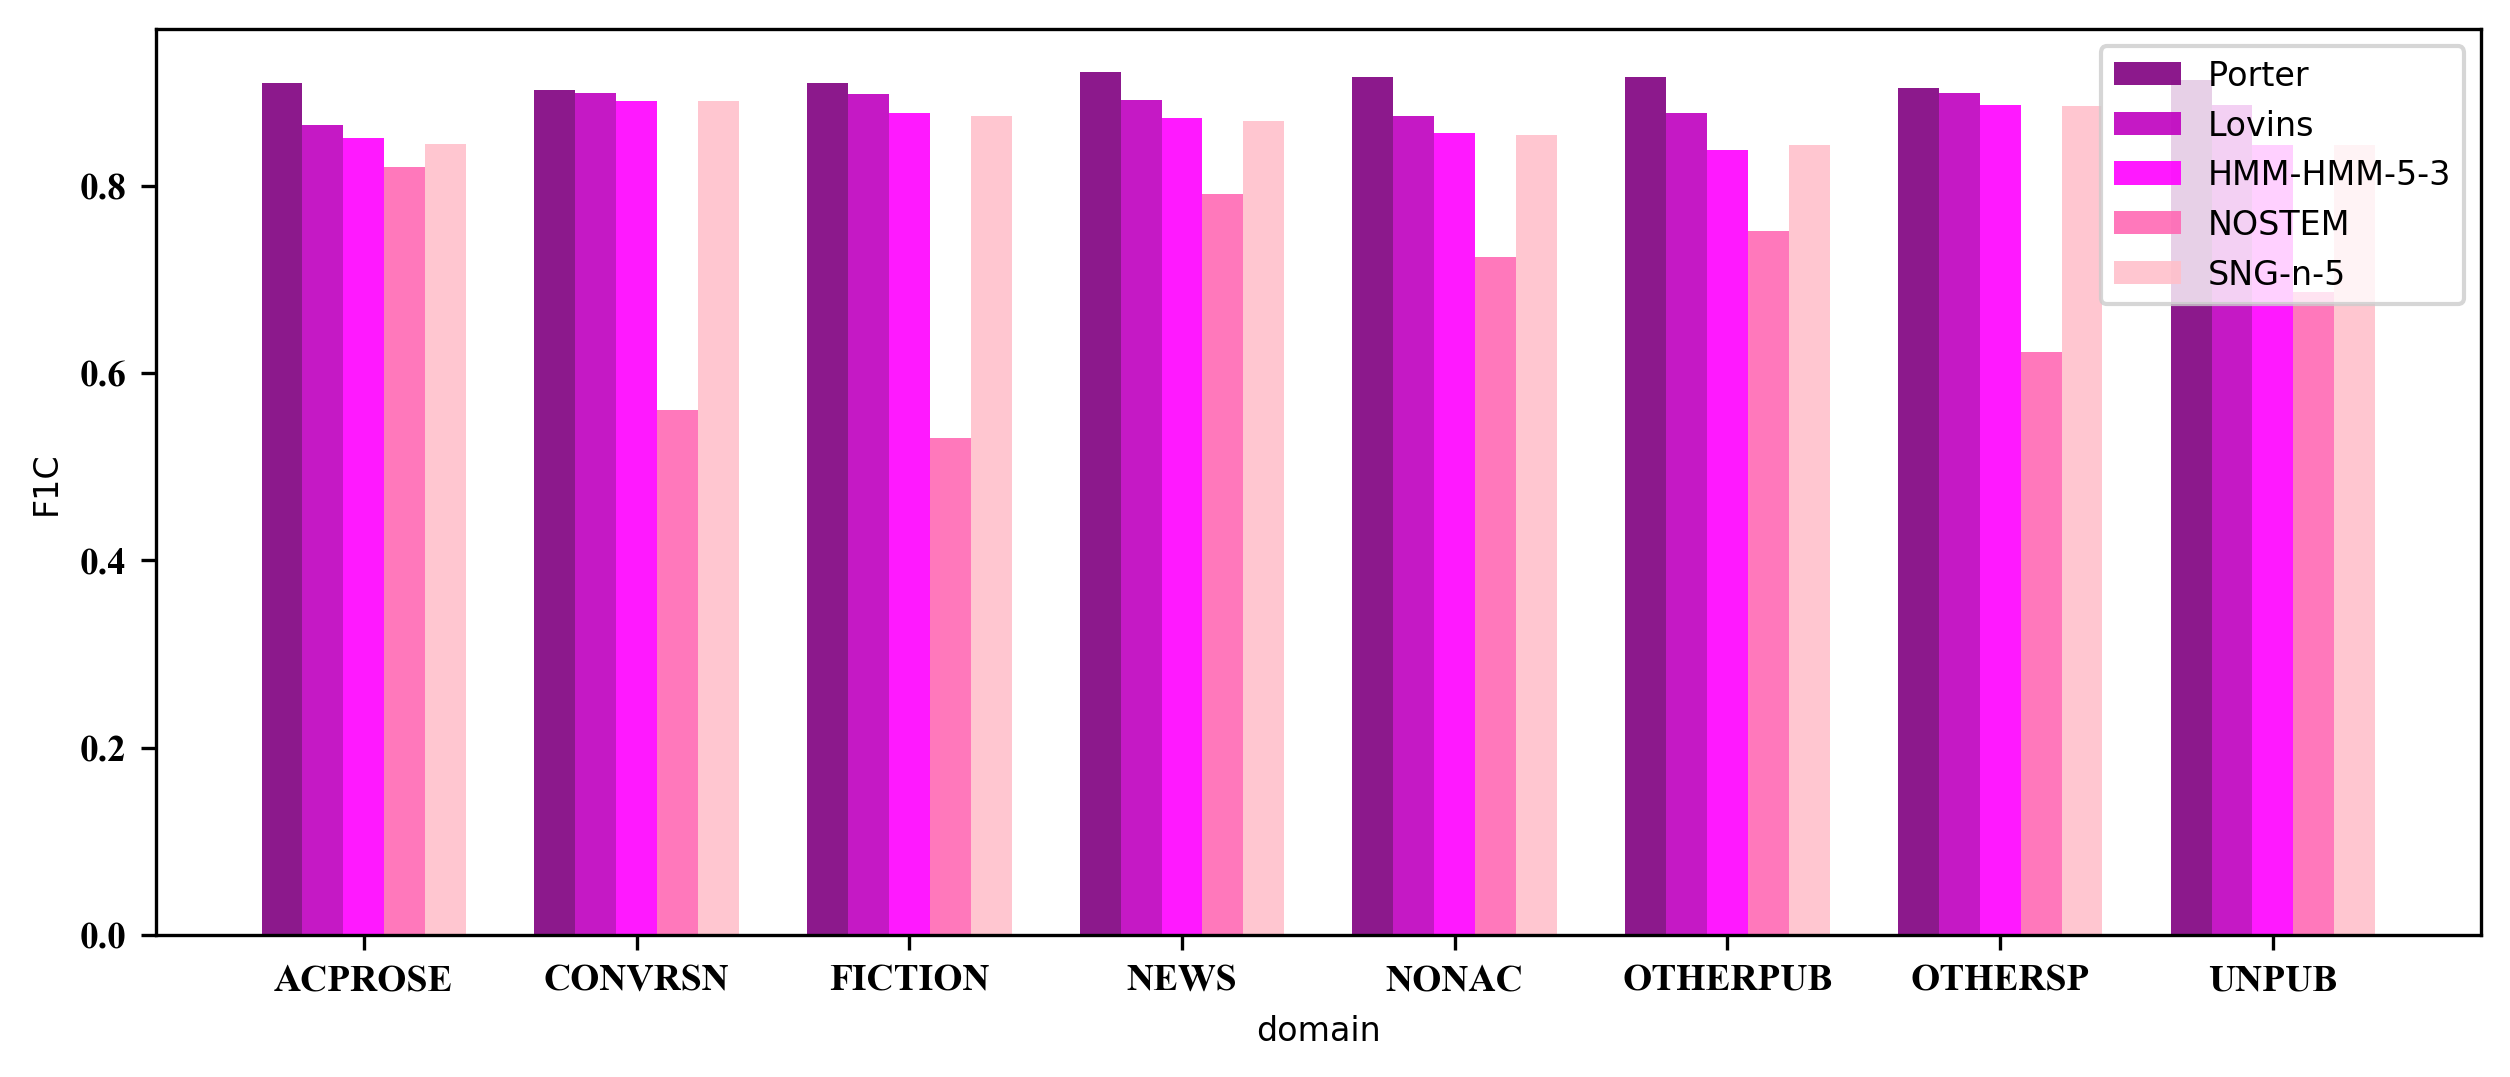

In [78]:
plot_domain_hist(['Porter', 'Lovins', 'HMM-HMM-5-3', 'NOSTEM', 'SNG-n-5'], 'F1C')

In [622]:
def plot_matrics_vs_stemmer(stemmer_name, m_name, m_index, colors, ecolors, figname=None):
    
    stemmer_vs_maxtrics_domain = {}
    domains = []
    for domain, stemmer_tuple in matrics.items():
        domains.append(domain)
        for stemmer, matrics_tuple in stemmer_tuple.items():
            if stemmer not in stemmer_vs_maxtrics_domain.keys():
                stemmer_vs_maxtrics_domain[stemmer] = {}
            for m in m_index:  
                if m not in stemmer_vs_maxtrics_domain[stemmer].keys():
                    stemmer_vs_maxtrics_domain[stemmer][m] = []
                stemmer_vs_maxtrics_domain[stemmer][m].append(matrics_tuple[m])
    stemmer_vs_maxtrics_mean = {}
    stemmer_vs_maxtrics_std = {}
    for stemmer, ms in stemmer_vs_maxtrics_domain.items():
        for m, data in ms.items():
            if stemmer not in stemmer_vs_maxtrics_mean.keys():
                stemmer_vs_maxtrics_mean[stemmer] = []
                stemmer_vs_maxtrics_std[stemmer] = []
                
            stemmer_vs_maxtrics_mean[stemmer].append(
                 np.mean(stemmer_vs_maxtrics_domain[stemmer][m]))
            stemmer_vs_maxtrics_std[stemmer].append(
                 np.std(stemmer_vs_maxtrics_domain[stemmer][m], ddof=1))
    
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.figsize'] = (10, 4)
    
    width = 0.1
    x = None
    i = 0
    for stemmer in stemmer_name:
        y_mean = stemmer_vs_maxtrics_mean[stemmer]
        y_std = stemmer_vs_maxtrics_std[stemmer]
        if x is None:
            x = np.array(range(len(y_mean)), dtype=np.float32)
        else:
            x += width
        plt.bar(x=x, height=y_mean, yerr=y_std, width=width, label=stemmer_name[i], 
               color=colors[i], ecolor=ecolors[i])
        i += 1    
    x -= width * (len(stemmer_name) - 3)
    plt.xticks([index + width for index in x], m_name)
    plt.xlabel('metrics', fontsize=8)
    plt.yticks(fontproperties = 'Times New Roman', size = 9)
    plt.xticks(fontproperties = 'Times New Roman', size = 9)
    plt.legend(fontsize=8)
    if figname is not None:
        plt.savefig(figname + '.jpg', bbox_inches = 'tight')
        plt.savefig(figname + '.eps', dpi=300, format='eps', bbox_inches = 'tight')

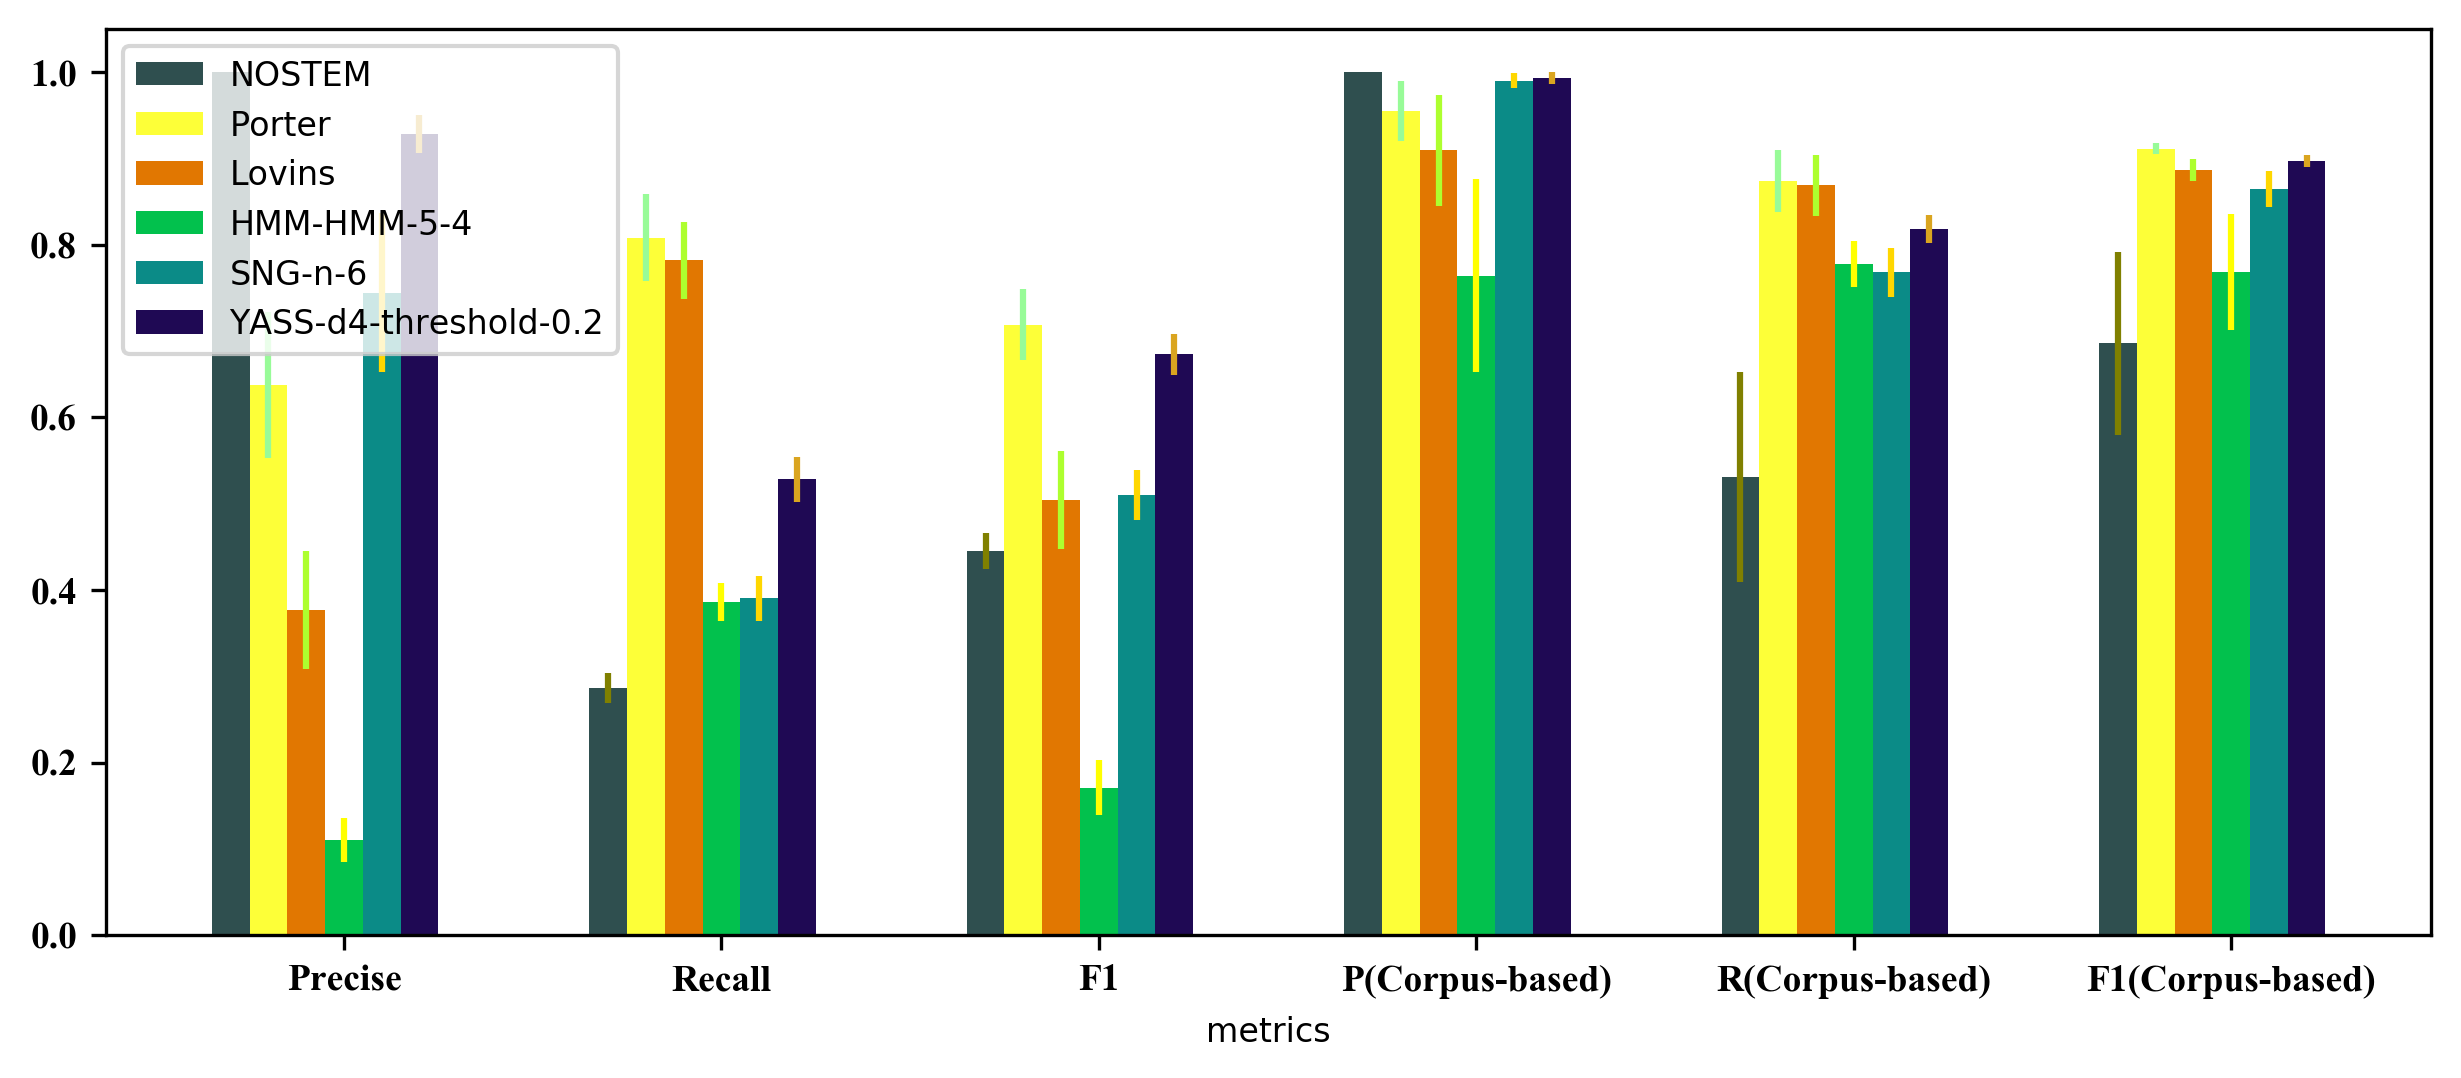

In [618]:
plot_matrics_vs_stemmer(['NOSTEM', 'Porter', 'Lovins', 'HMM-HMM-5-4', 'SNG-n-6', 'YASS-d4-threshold-0.2'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-based)', 'R(Corpus-based)', 'F1(Corpus-based)'], [5,6,7, 8, 9, 10],
                        ['darkslategray', '#fdff38', '#e17701',  '#02c14d', '#0b8b87', '#1f0954'],
                        ['olive', 'palegreen', 'greenyellow', 'yellow', 'gold', 'goldenrod'],
                       )
                       # figname='prf')

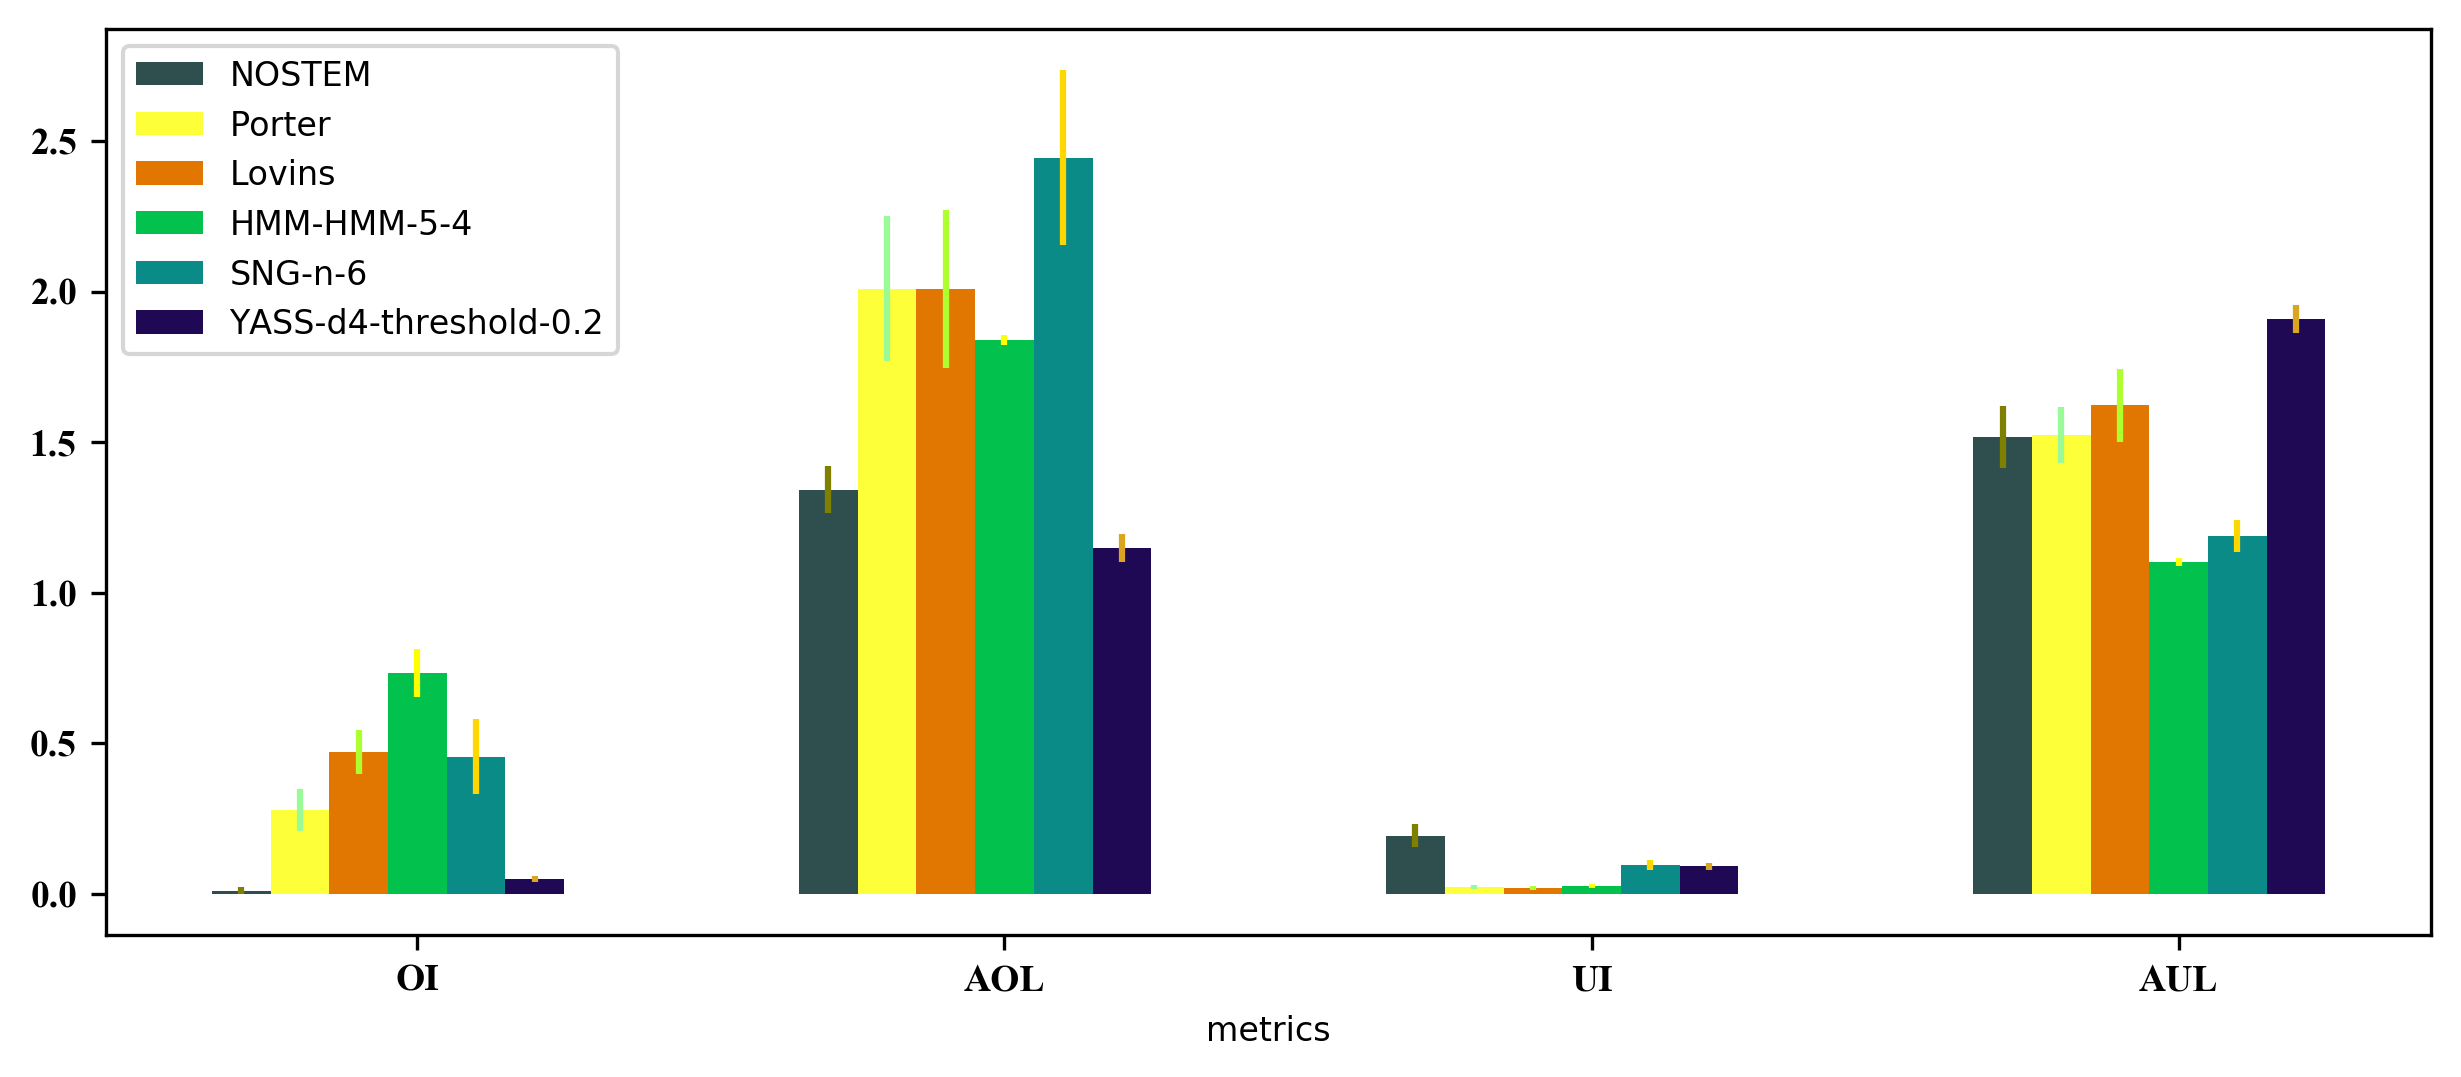

In [627]:
plot_matrics_vs_stemmer(['NOSTEM', 'Porter', 'Lovins', 'HMM-HMM-5-4', 'SNG-n-6', 'YASS-d4-threshold-0.2'],
                        ['OI', 'AOL', 'UI', 'AUL'], [0, 3, 1, 4],
                        ['darkslategray', '#fdff38', '#e17701',  '#02c14d', '#0b8b87', '#1f0954'],
                        ['olive', 'palegreen', 'greenyellow', 'yellow', 'gold', 'goldenrod'],
                         )
                       # figname='prf')

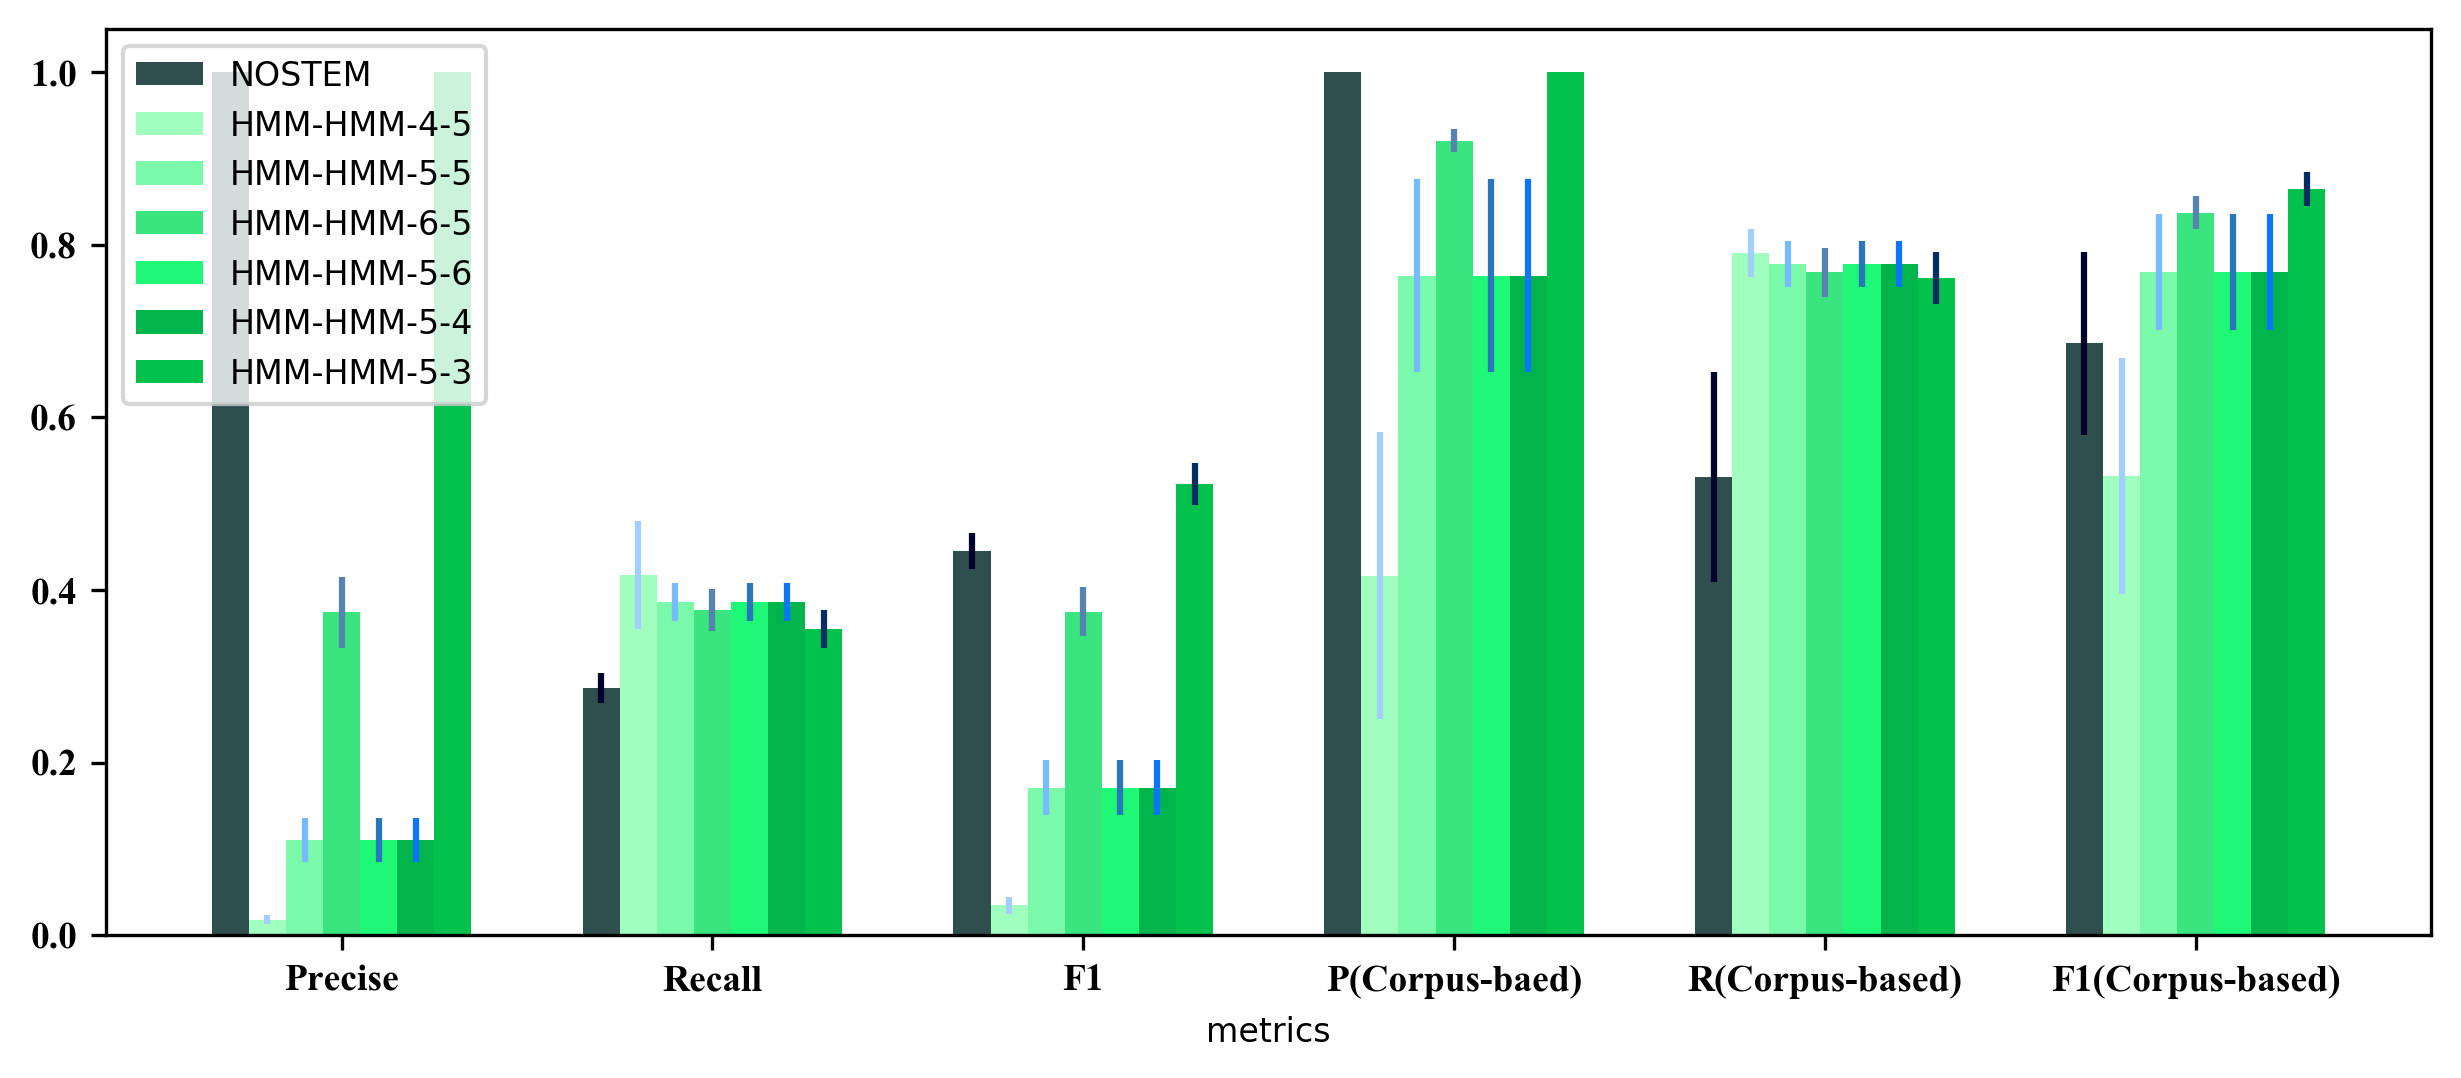

In [194]:
plot_matrics_vs_stemmer(['NOSTEM', 'HMM-HMM-4-5', 'HMM-HMM-5-5', 'HMM-HMM-6-5', 'HMM-HMM-5-6', 'HMM-HMM-5-4', 'HMM-HMM-5-3'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [5,6,7, 8, 9, 10],
                        colors=['darkslategray', '#a0febf', '#7af9ab', '#3ae57f', '#1ef876', '#01b44c', '#02c14d', '#009337'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a'],
                       )
                        #figname='HMM_prf')

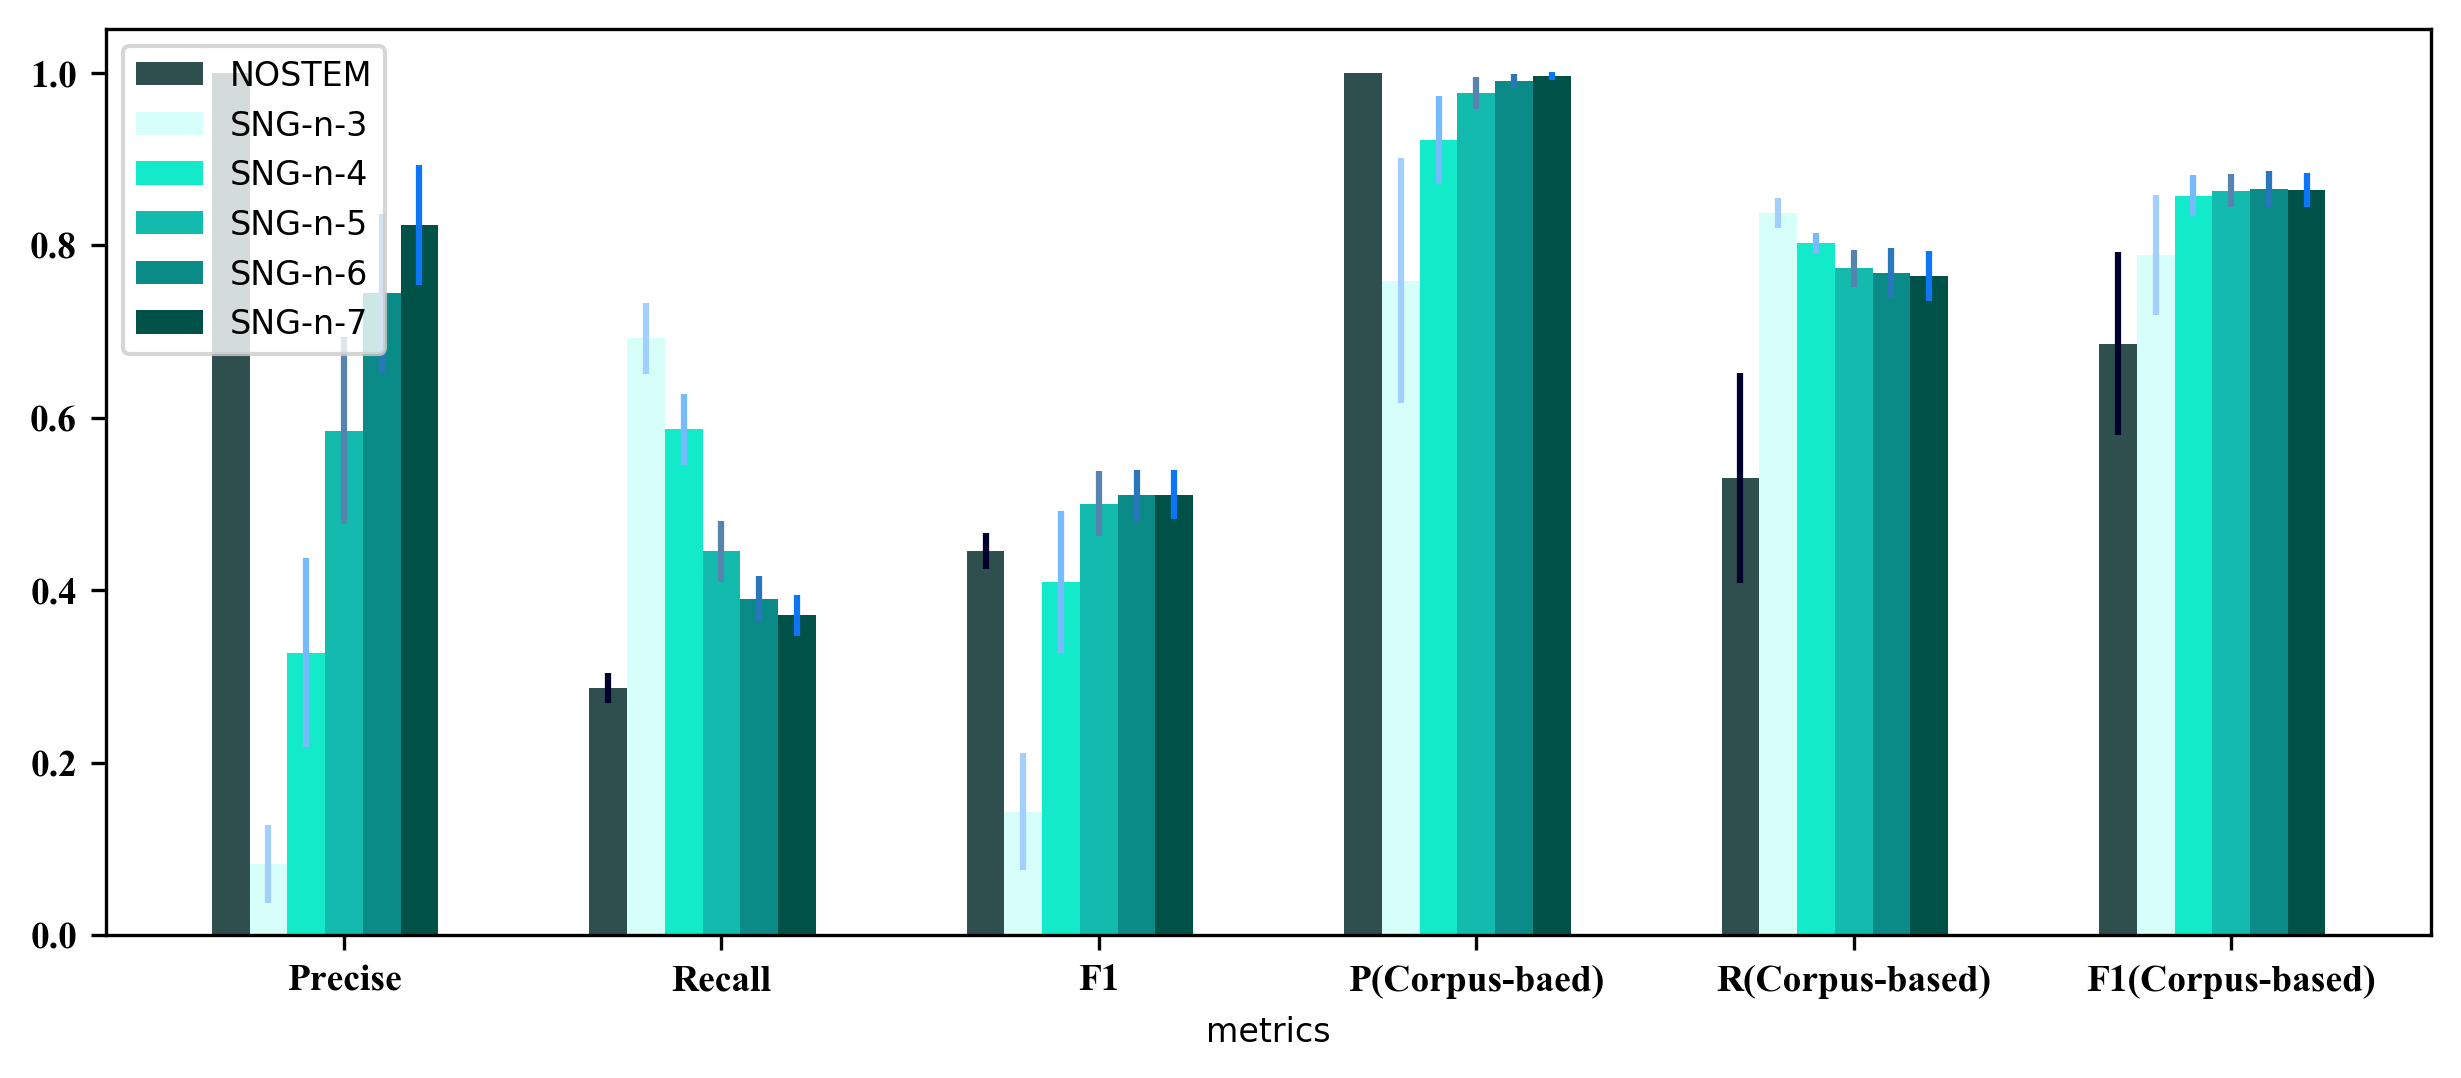

In [193]:
plot_matrics_vs_stemmer(['NOSTEM', 'SNG-n-3', 'SNG-n-4', 'SNG-n-5', 'SNG-n-6', 'SNG-n-7'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [5,6,7, 8, 9, 10],
                        colors=['darkslategray', '#d6fffa', '#13eac9', '#13bbaf', '#0b8b87', '#005249', '#03012d'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a'],
                       )
                        #figname='SNG_prf')

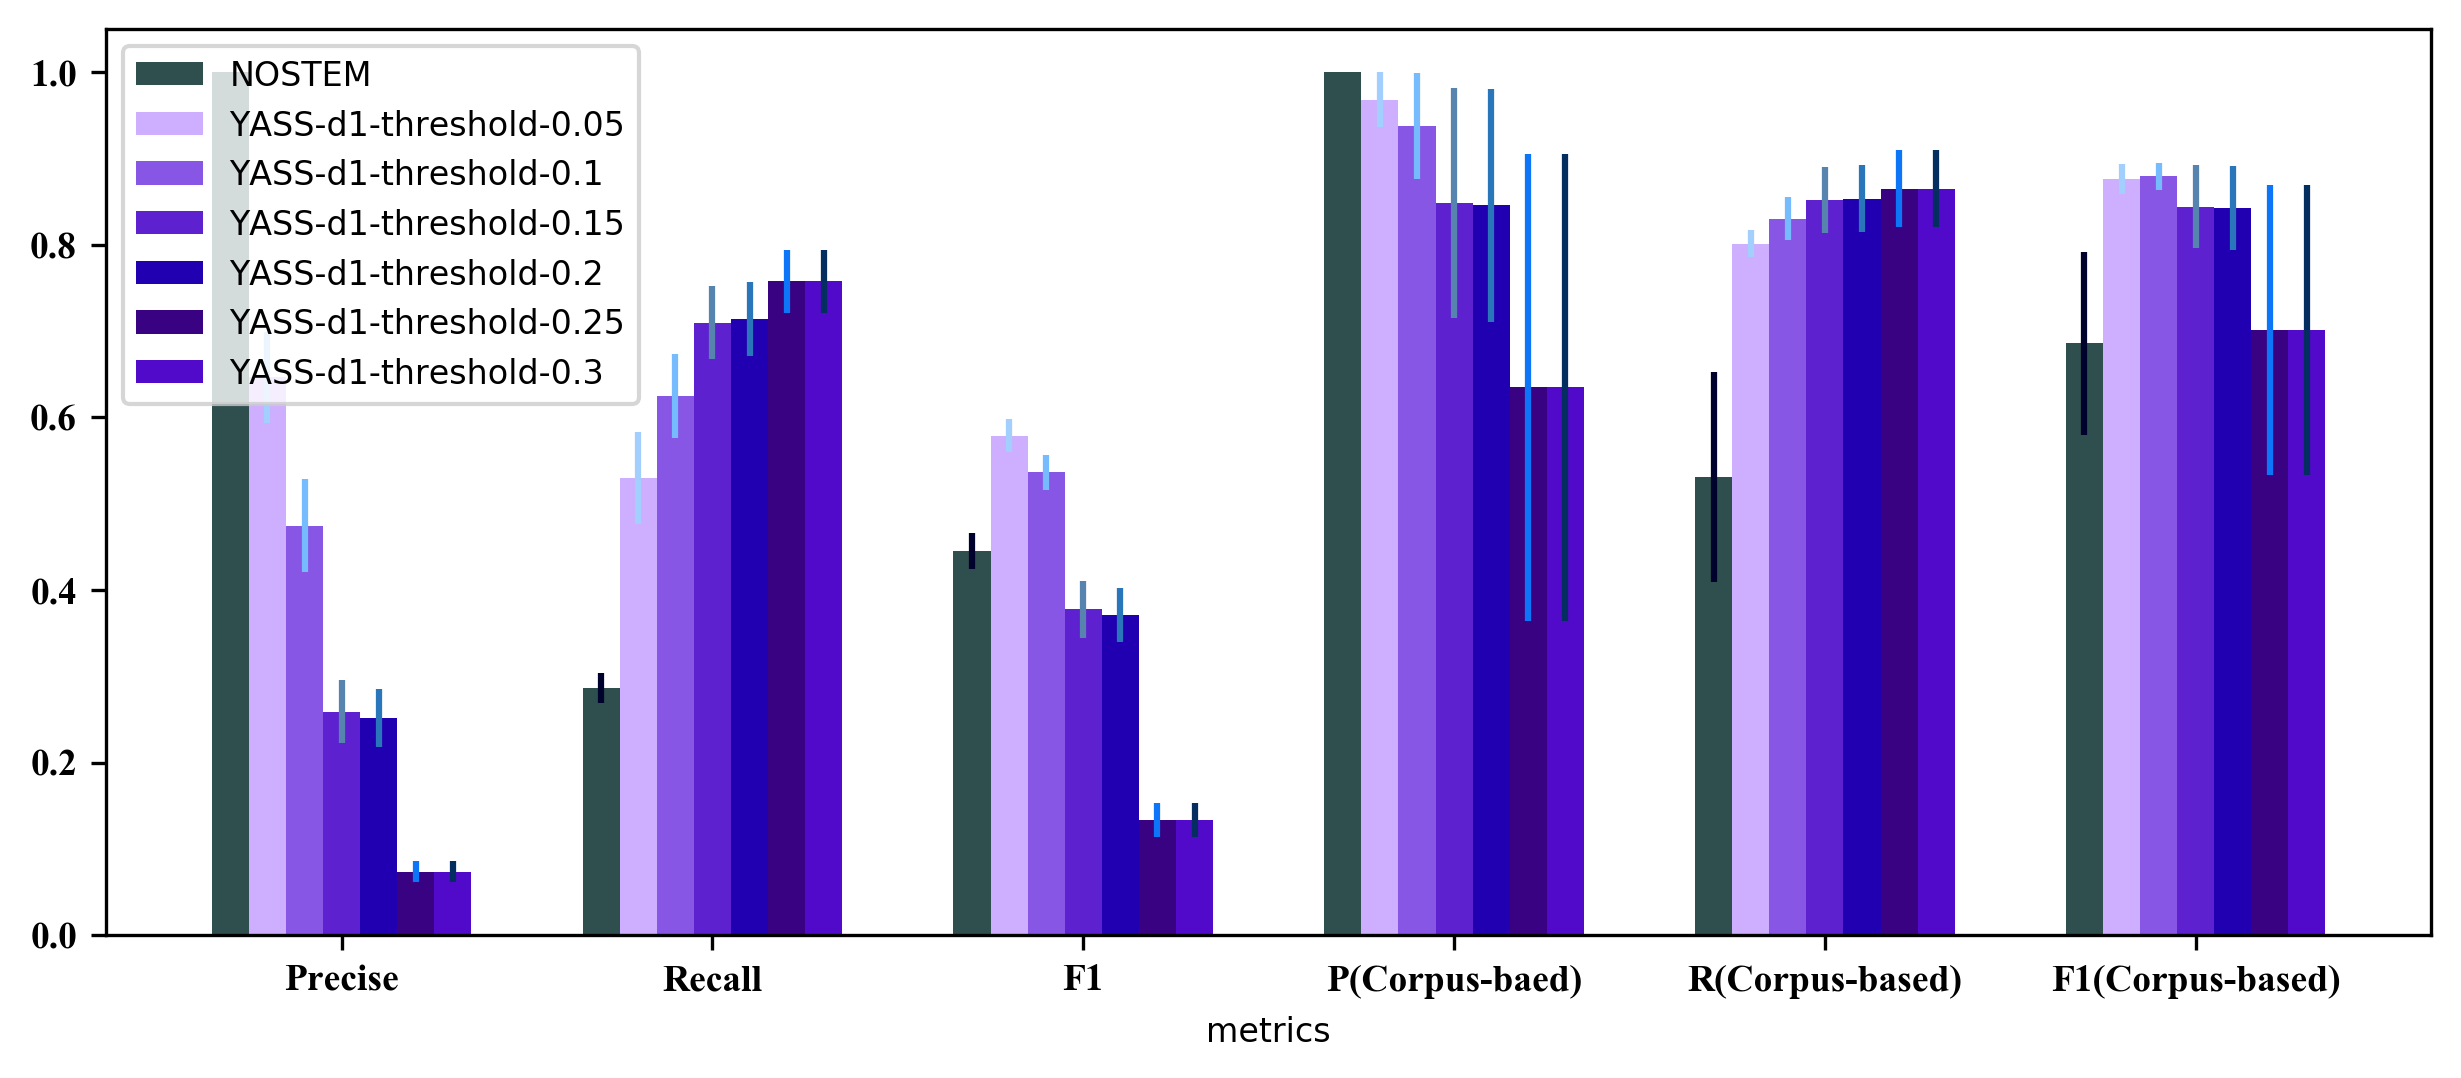

In [200]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d1-threshold-0.05', 
                         'YASS-d1-threshold-0.1',
                         'YASS-d1-threshold-0.15',
                         'YASS-d1-threshold-0.2',
                         'YASS-d1-threshold-0.25',
                         'YASS-d1-threshold-0.3'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [5, 6, 7, 8, 9, 10],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                       # figname='YASS_d1_prf')

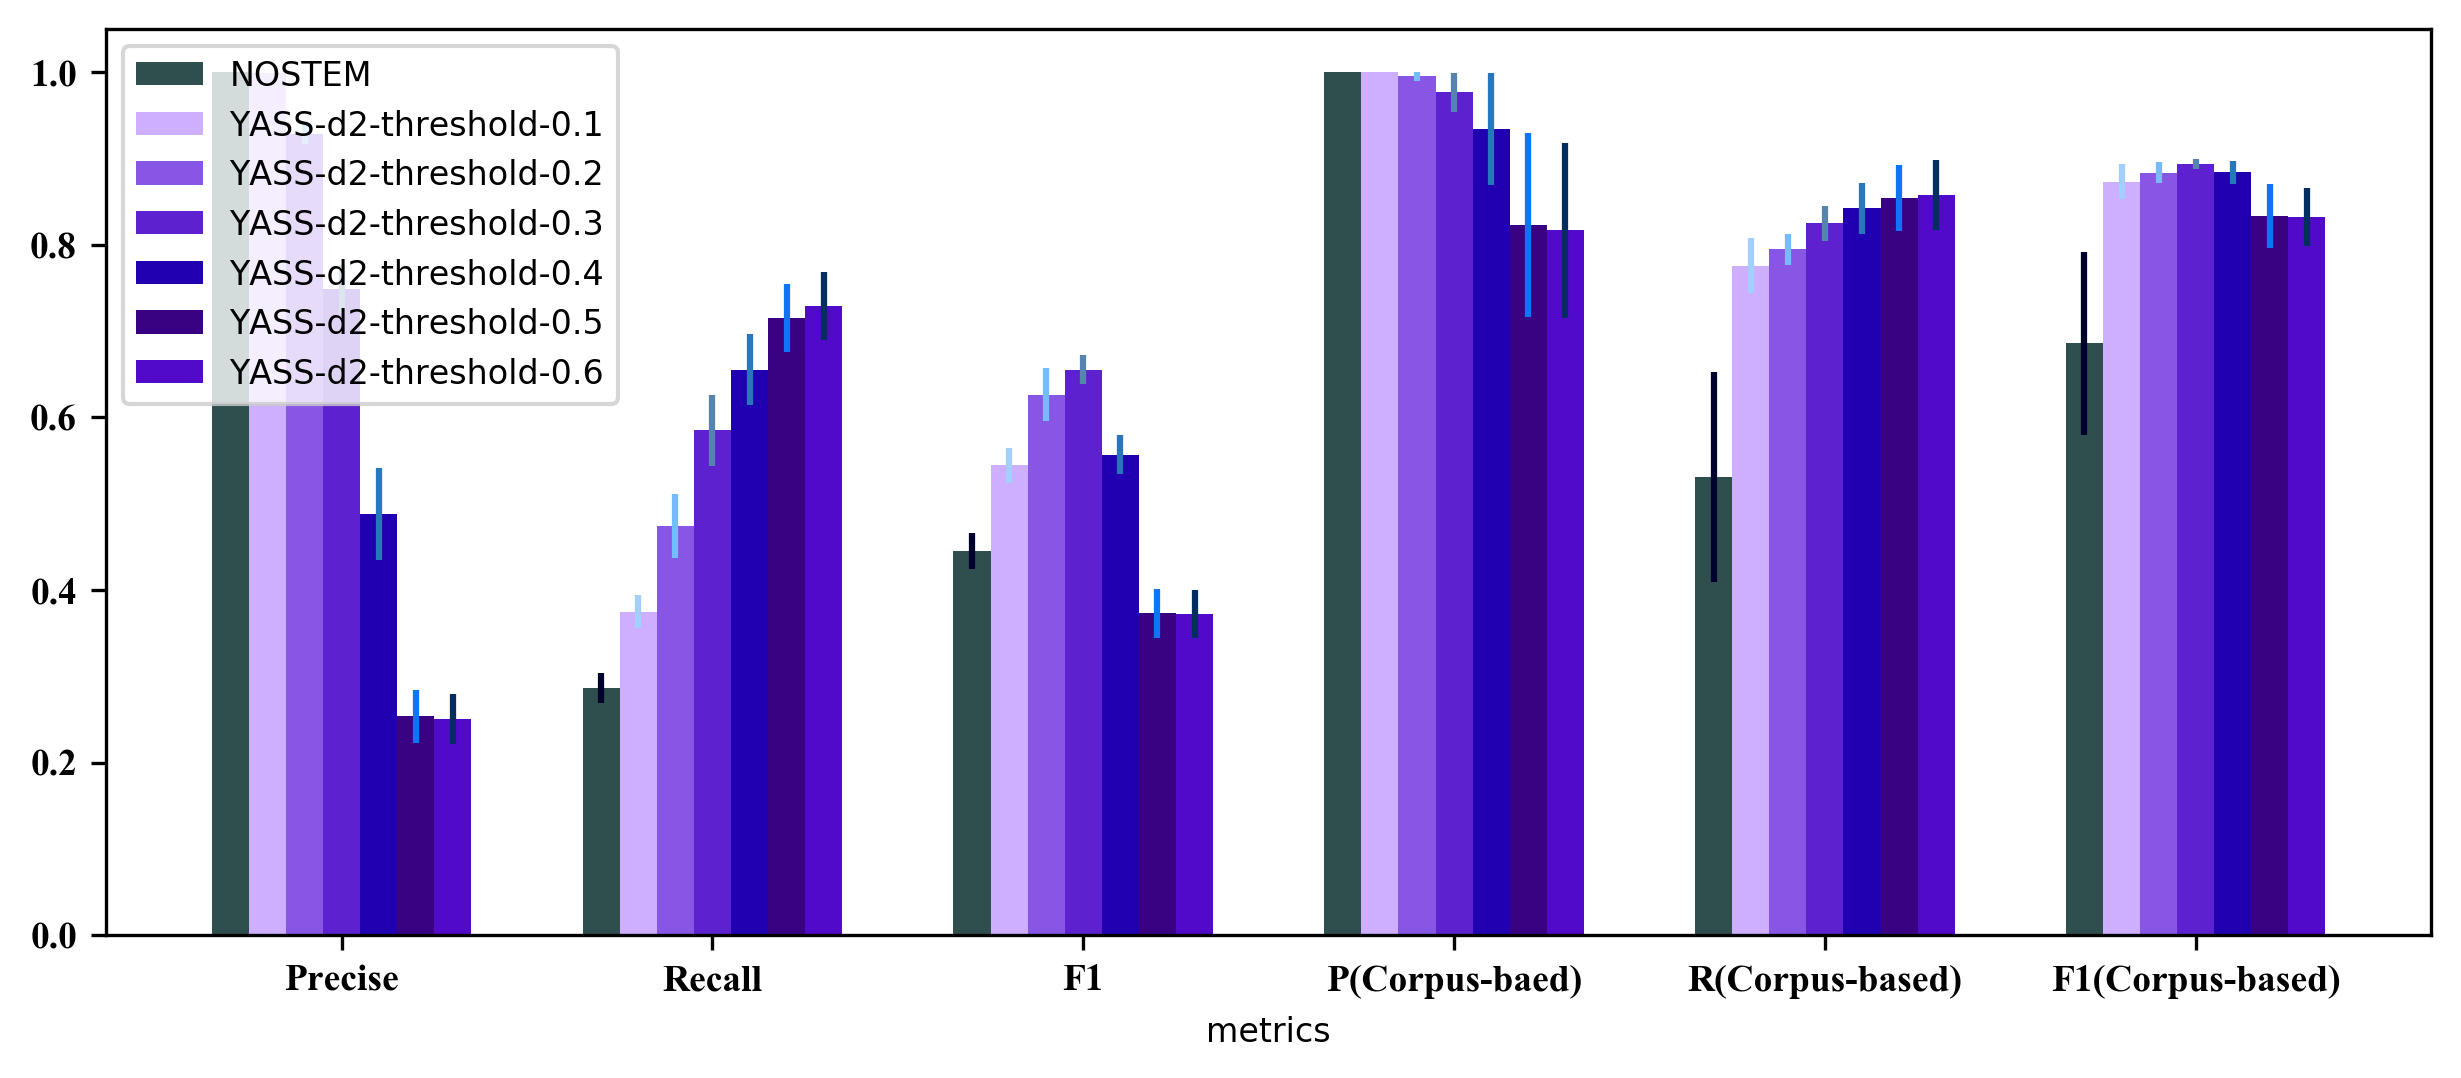

In [206]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d2-threshold-0.1', 
                         'YASS-d2-threshold-0.2',
                         'YASS-d2-threshold-0.3',
                         'YASS-d2-threshold-0.4',
                         'YASS-d2-threshold-0.5',
                         'YASS-d2-threshold-0.6'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [5, 6, 7, 8, 9, 10],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                       #figname='YASS_d2_prf')

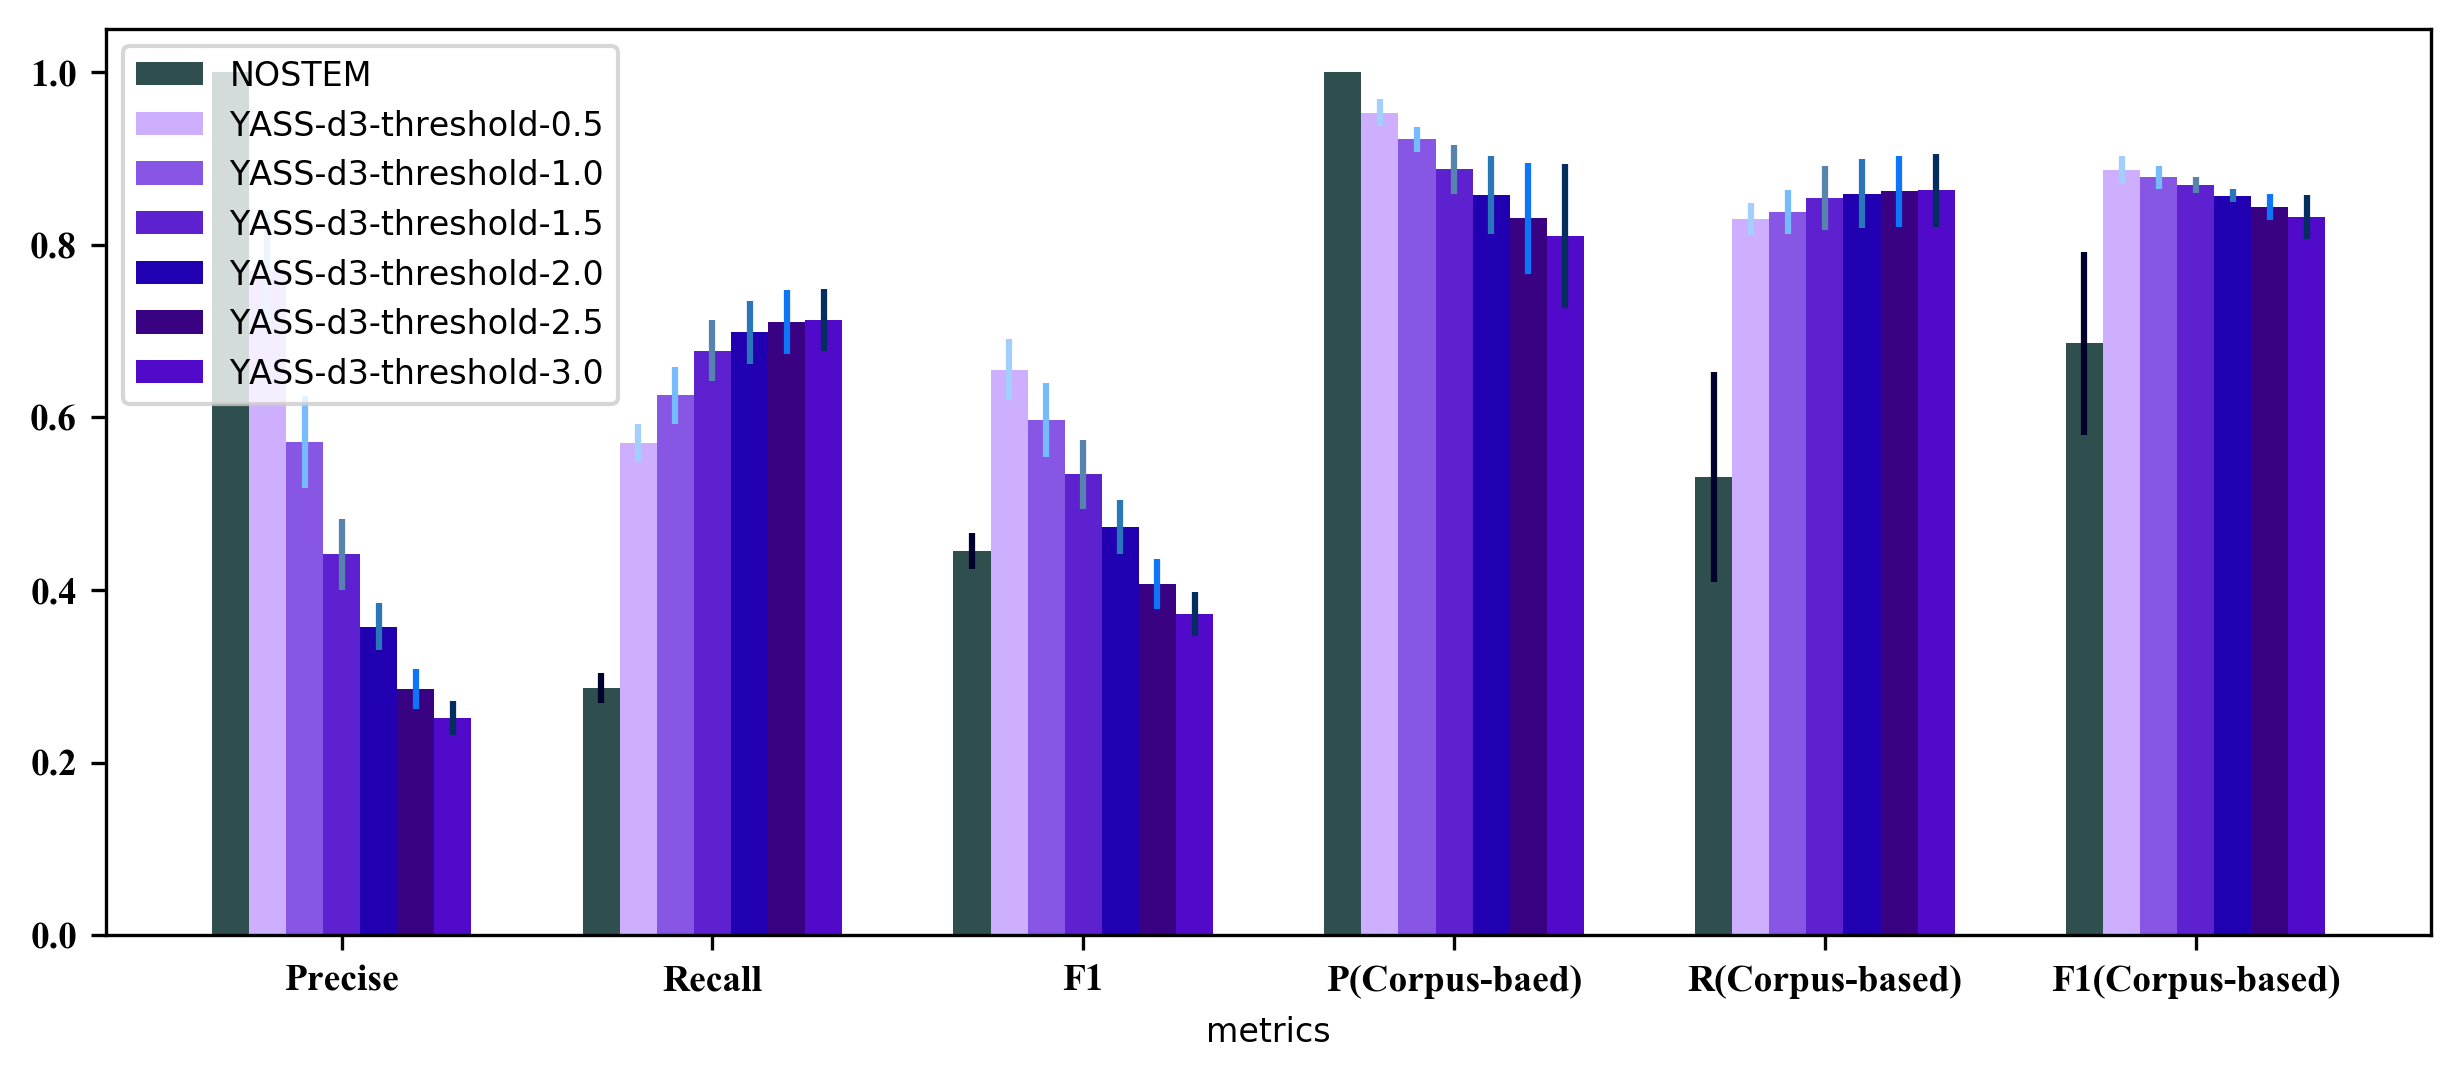

In [208]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d3-threshold-0.5', 
                         'YASS-d3-threshold-1.0',
                         'YASS-d3-threshold-1.5',
                         'YASS-d3-threshold-2.0',
                         'YASS-d3-threshold-2.5',
                         'YASS-d3-threshold-3.0'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [5, 6, 7, 8, 9, 10],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                       #figname='YASS_d3_prf')

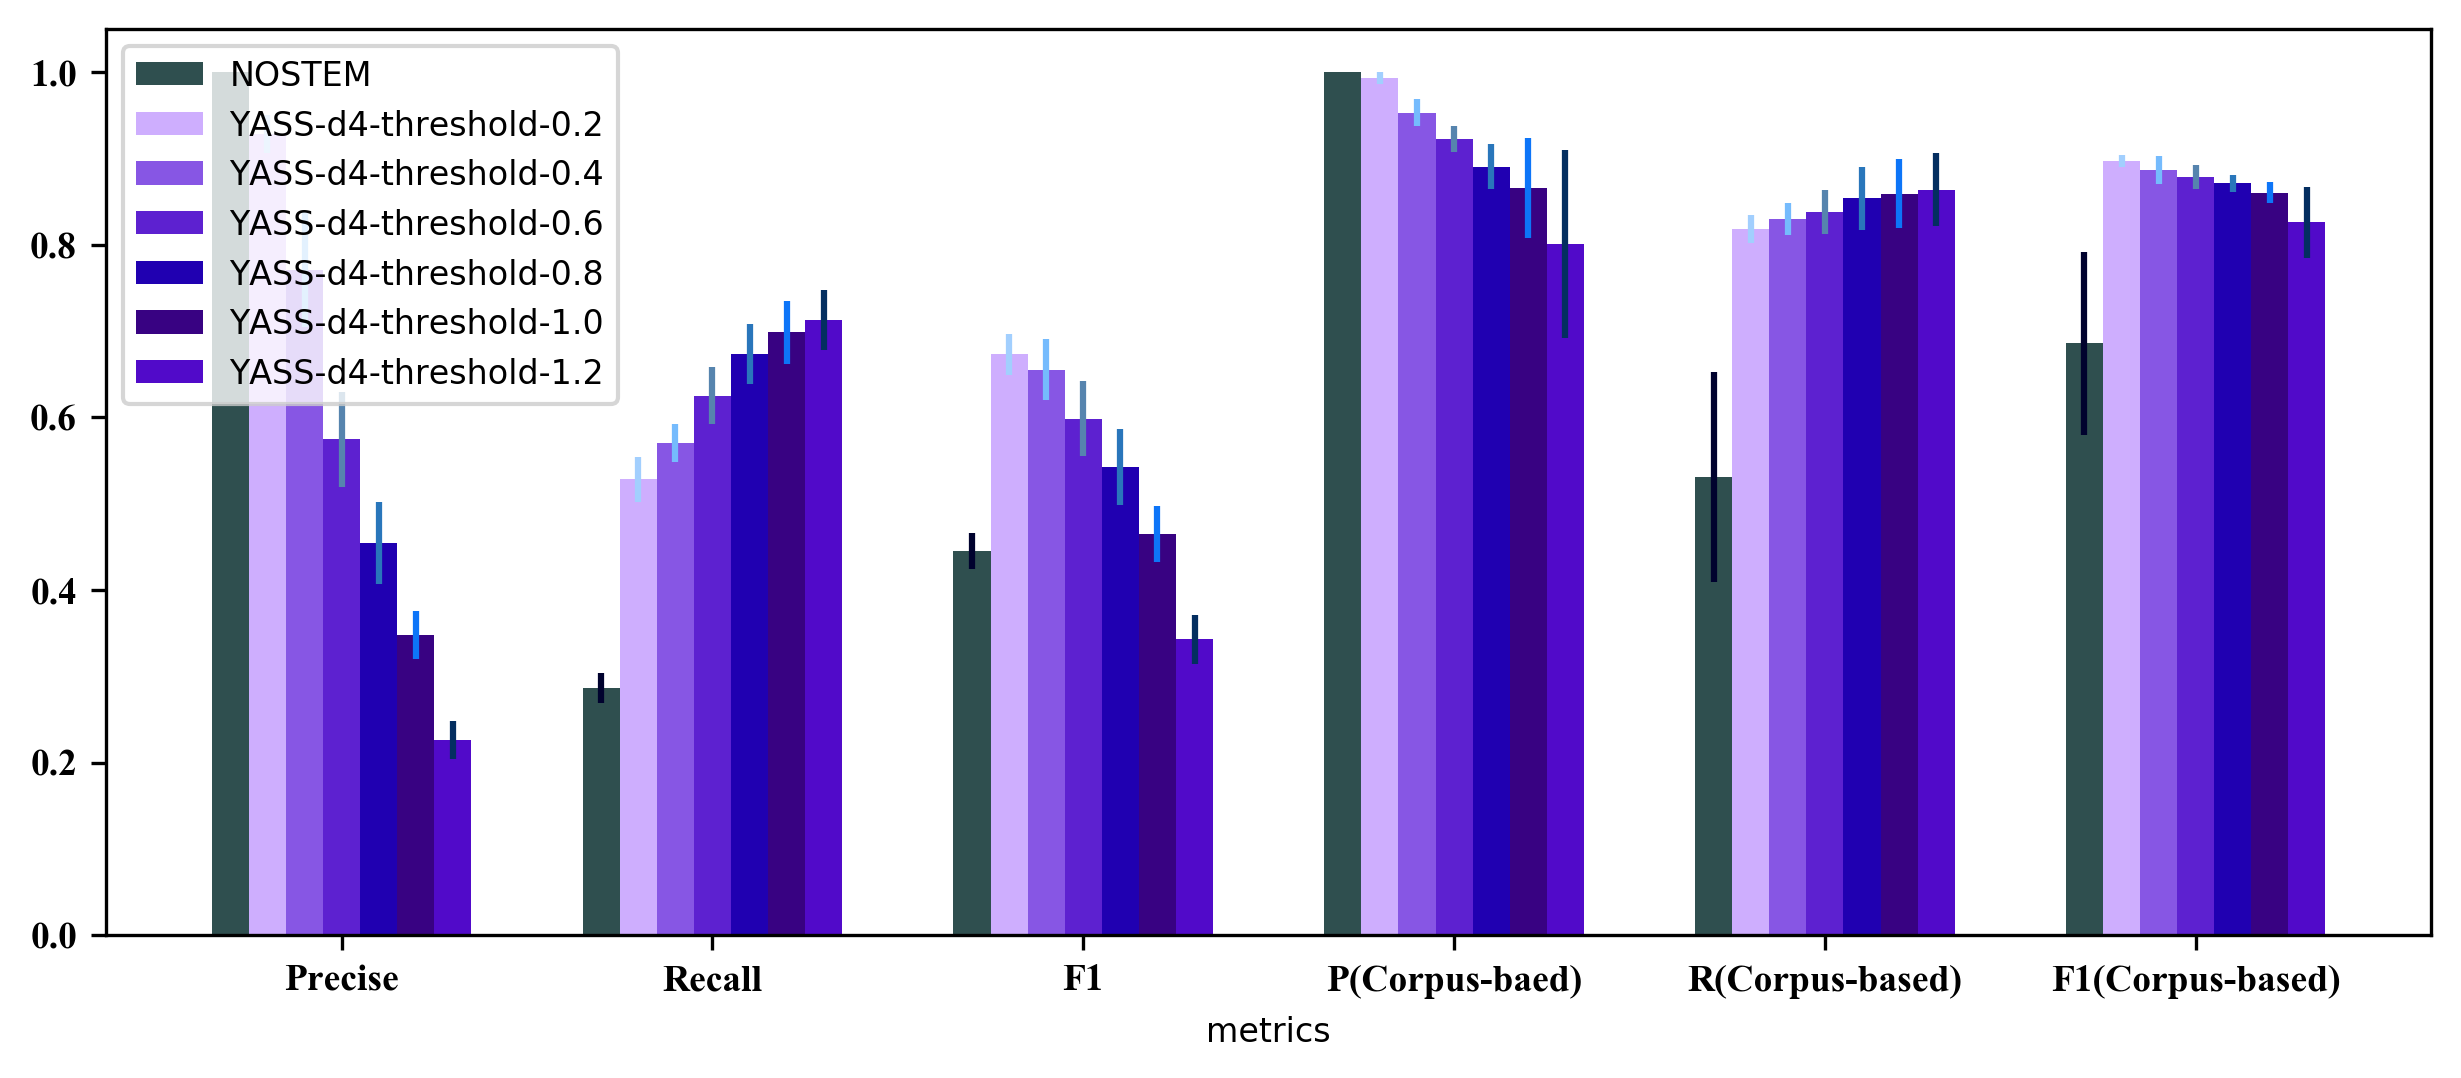

In [211]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d4-threshold-0.2', 
                         'YASS-d4-threshold-0.4',
                         'YASS-d4-threshold-0.6',
                         'YASS-d4-threshold-0.8',
                         'YASS-d4-threshold-1.0',
                         'YASS-d4-threshold-1.2'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [5, 6, 7, 8, 9, 10],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                       #figname='YASS_d4_prf')

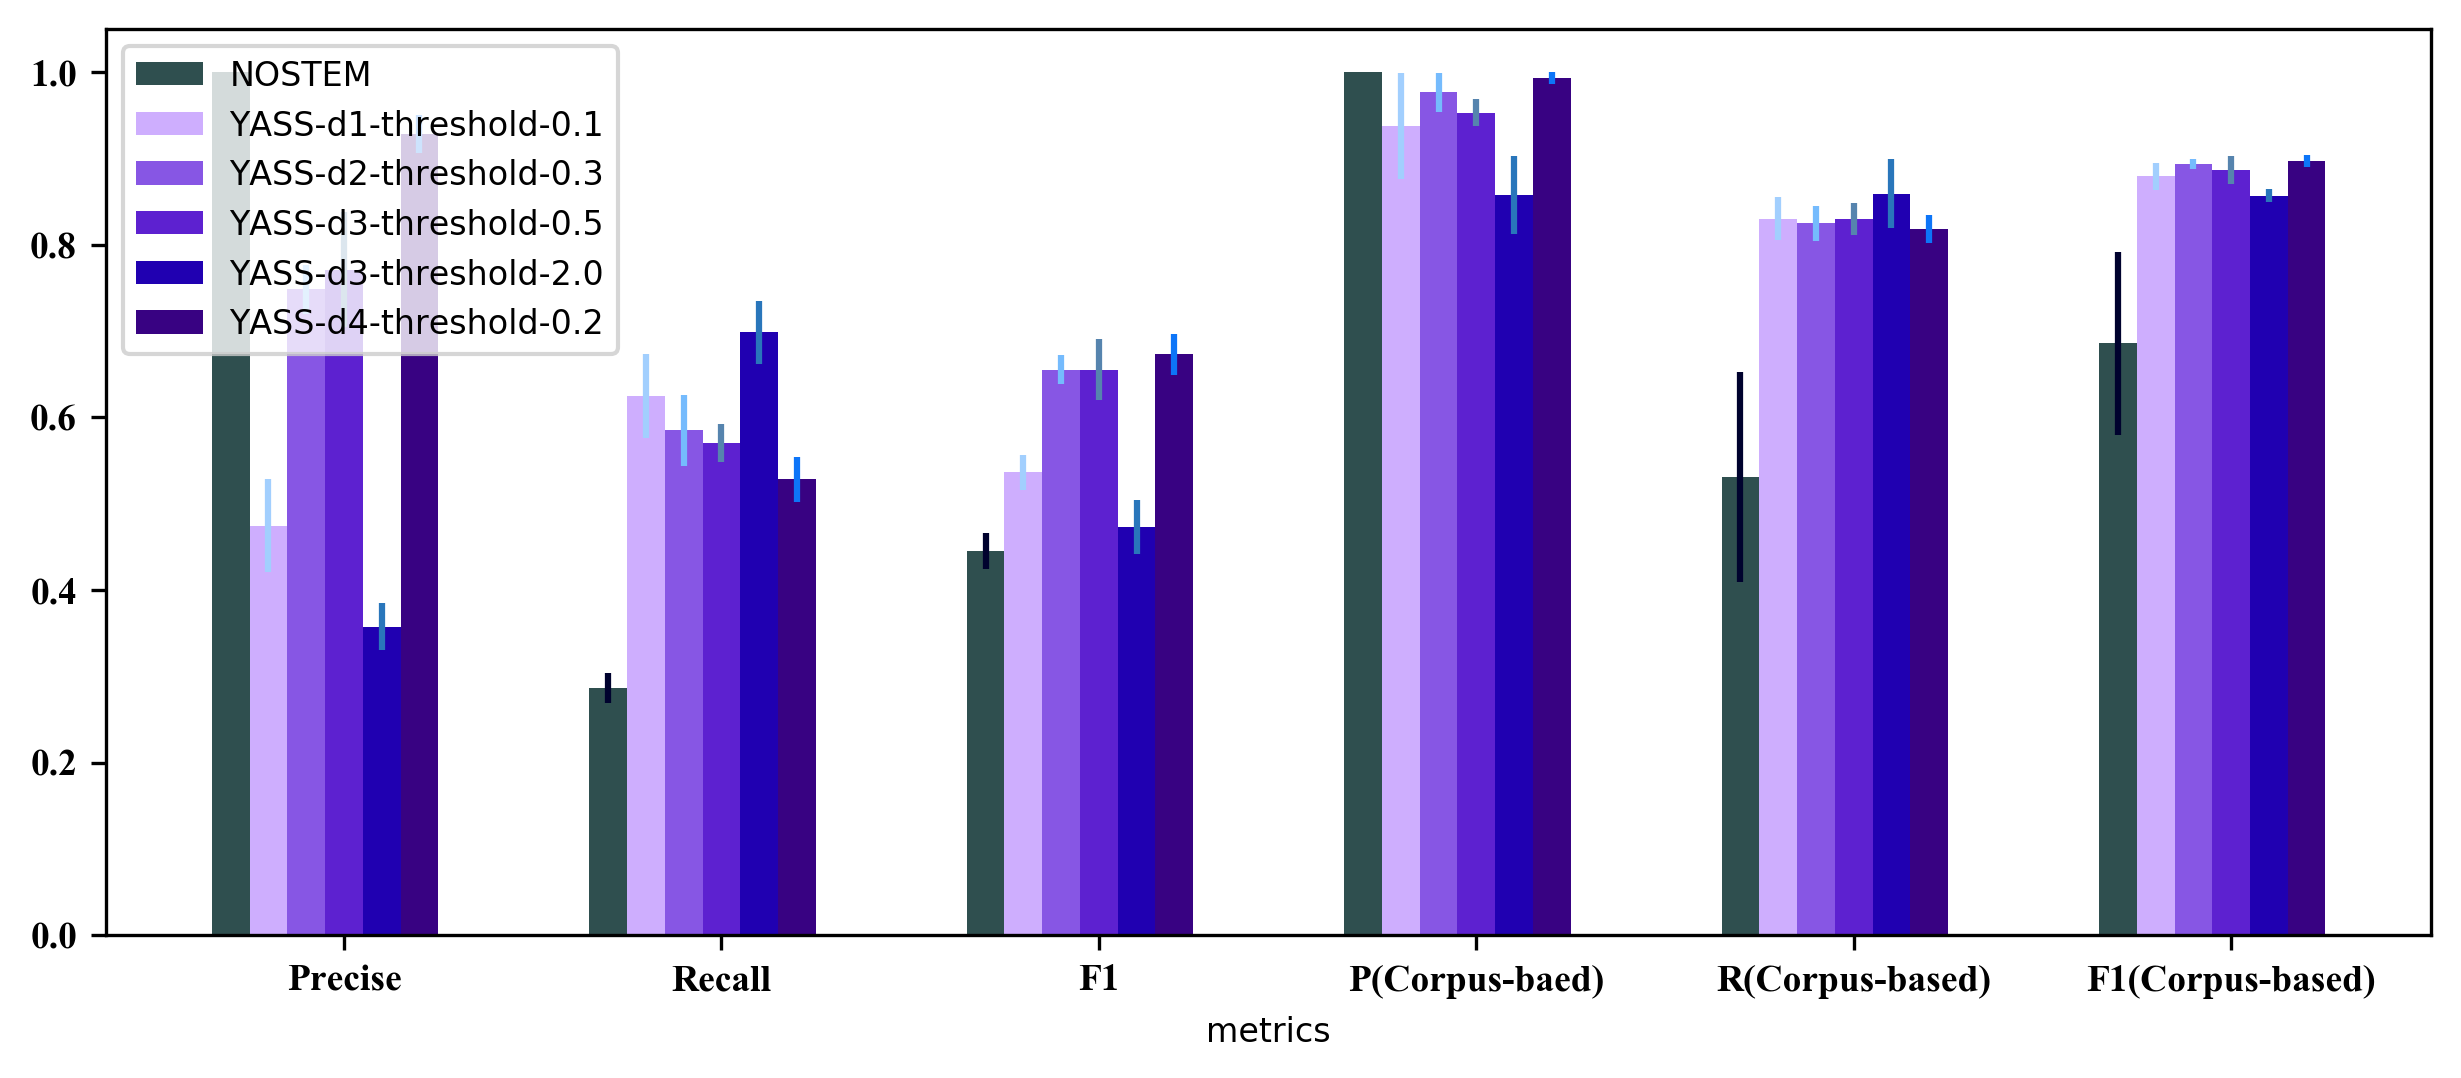

In [214]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d1-threshold-0.1', 
                         'YASS-d2-threshold-0.3',
                         'YASS-d3-threshold-0.5',
                         'YASS-d3-threshold-2.0',
                         'YASS-d4-threshold-0.2'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [5, 6, 7, 8, 9, 10],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                       #figname='YASS_prf')

In [620]:
def plot_matrics_vs_stemmer(stemmer_name, m_name, m_index, colors, ecolors, figname=None):
    
    stemmer_vs_maxtrics_domain = {}
    domains = []
    for domain, stemmer_tuple in matrics.items():
        domains.append(domain)
        for stemmer, matrics_tuple in stemmer_tuple.items():
            if stemmer not in stemmer_vs_maxtrics_domain.keys():
                stemmer_vs_maxtrics_domain[stemmer] = {}
            for m in m_index:  
                if m not in stemmer_vs_maxtrics_domain[stemmer].keys():
                    stemmer_vs_maxtrics_domain[stemmer][m] = []
                stemmer_vs_maxtrics_domain[stemmer][m].append(matrics_tuple[m])
    stemmer_vs_maxtrics_mean = {}
    stemmer_vs_maxtrics_std = {}
    for stemmer, ms in stemmer_vs_maxtrics_domain.items():
        for m, data in ms.items():
            if stemmer not in stemmer_vs_maxtrics_mean.keys():
                stemmer_vs_maxtrics_mean[stemmer] = []
                stemmer_vs_maxtrics_std[stemmer] = []
                
            stemmer_vs_maxtrics_mean[stemmer].append(
                 np.mean(stemmer_vs_maxtrics_domain[stemmer][m]))
            stemmer_vs_maxtrics_std[stemmer].append(
                 np.std(stemmer_vs_maxtrics_domain[stemmer][m], ddof=1))
    
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.figsize'] = (10, 7)
    
    width = 0.1
    x = None
    i = 0
    for stemmer in stemmer_name:
        y_mean = stemmer_vs_maxtrics_mean[stemmer]
        y_std = stemmer_vs_maxtrics_std[stemmer]
        if x is None:
            x = np.array(range(len(y_mean)), dtype=np.float32)
        else:
            x += width
        plt.bar(x=x[0], height=y_mean[0], yerr=y_std[0], width=width, 
                bottom=[0],
                label=stemmer_name[i] + '-OI', 
               color=colors[i], ecolor=ecolors[i])
        plt.bar(x=x[0], height=-y_mean[1], yerr=y_std[1], 
                bottom=[1],
                width=width, label=stemmer_name[i] + '-UI', 
               color=colors[i], ecolor=ecolors[i])
        i += 1    
    x -= width * (len(stemmer_name) - 4) + 0.5*width
    plt.xticks([x[0]], [''])
    plt.xlabel('metrics', fontsize=8)
    plt.tick_params(axis="x", top=True, labelbottom=True, labeltop=True)
    plt.xticks([x[0]], [''])
    plt.yticks(fontproperties = 'Times New Roman', size = 9)
    plt.xticks(fontproperties = 'Times New Roman', size = 9)
    plt.legend(fontsize=8)
    if figname is not None:
        plt.savefig(figname + '.jpg', bbox_inches = 'tight')
        plt.savefig(figname + '.eps', dpi=300, format='eps', bbox_inches = 'tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


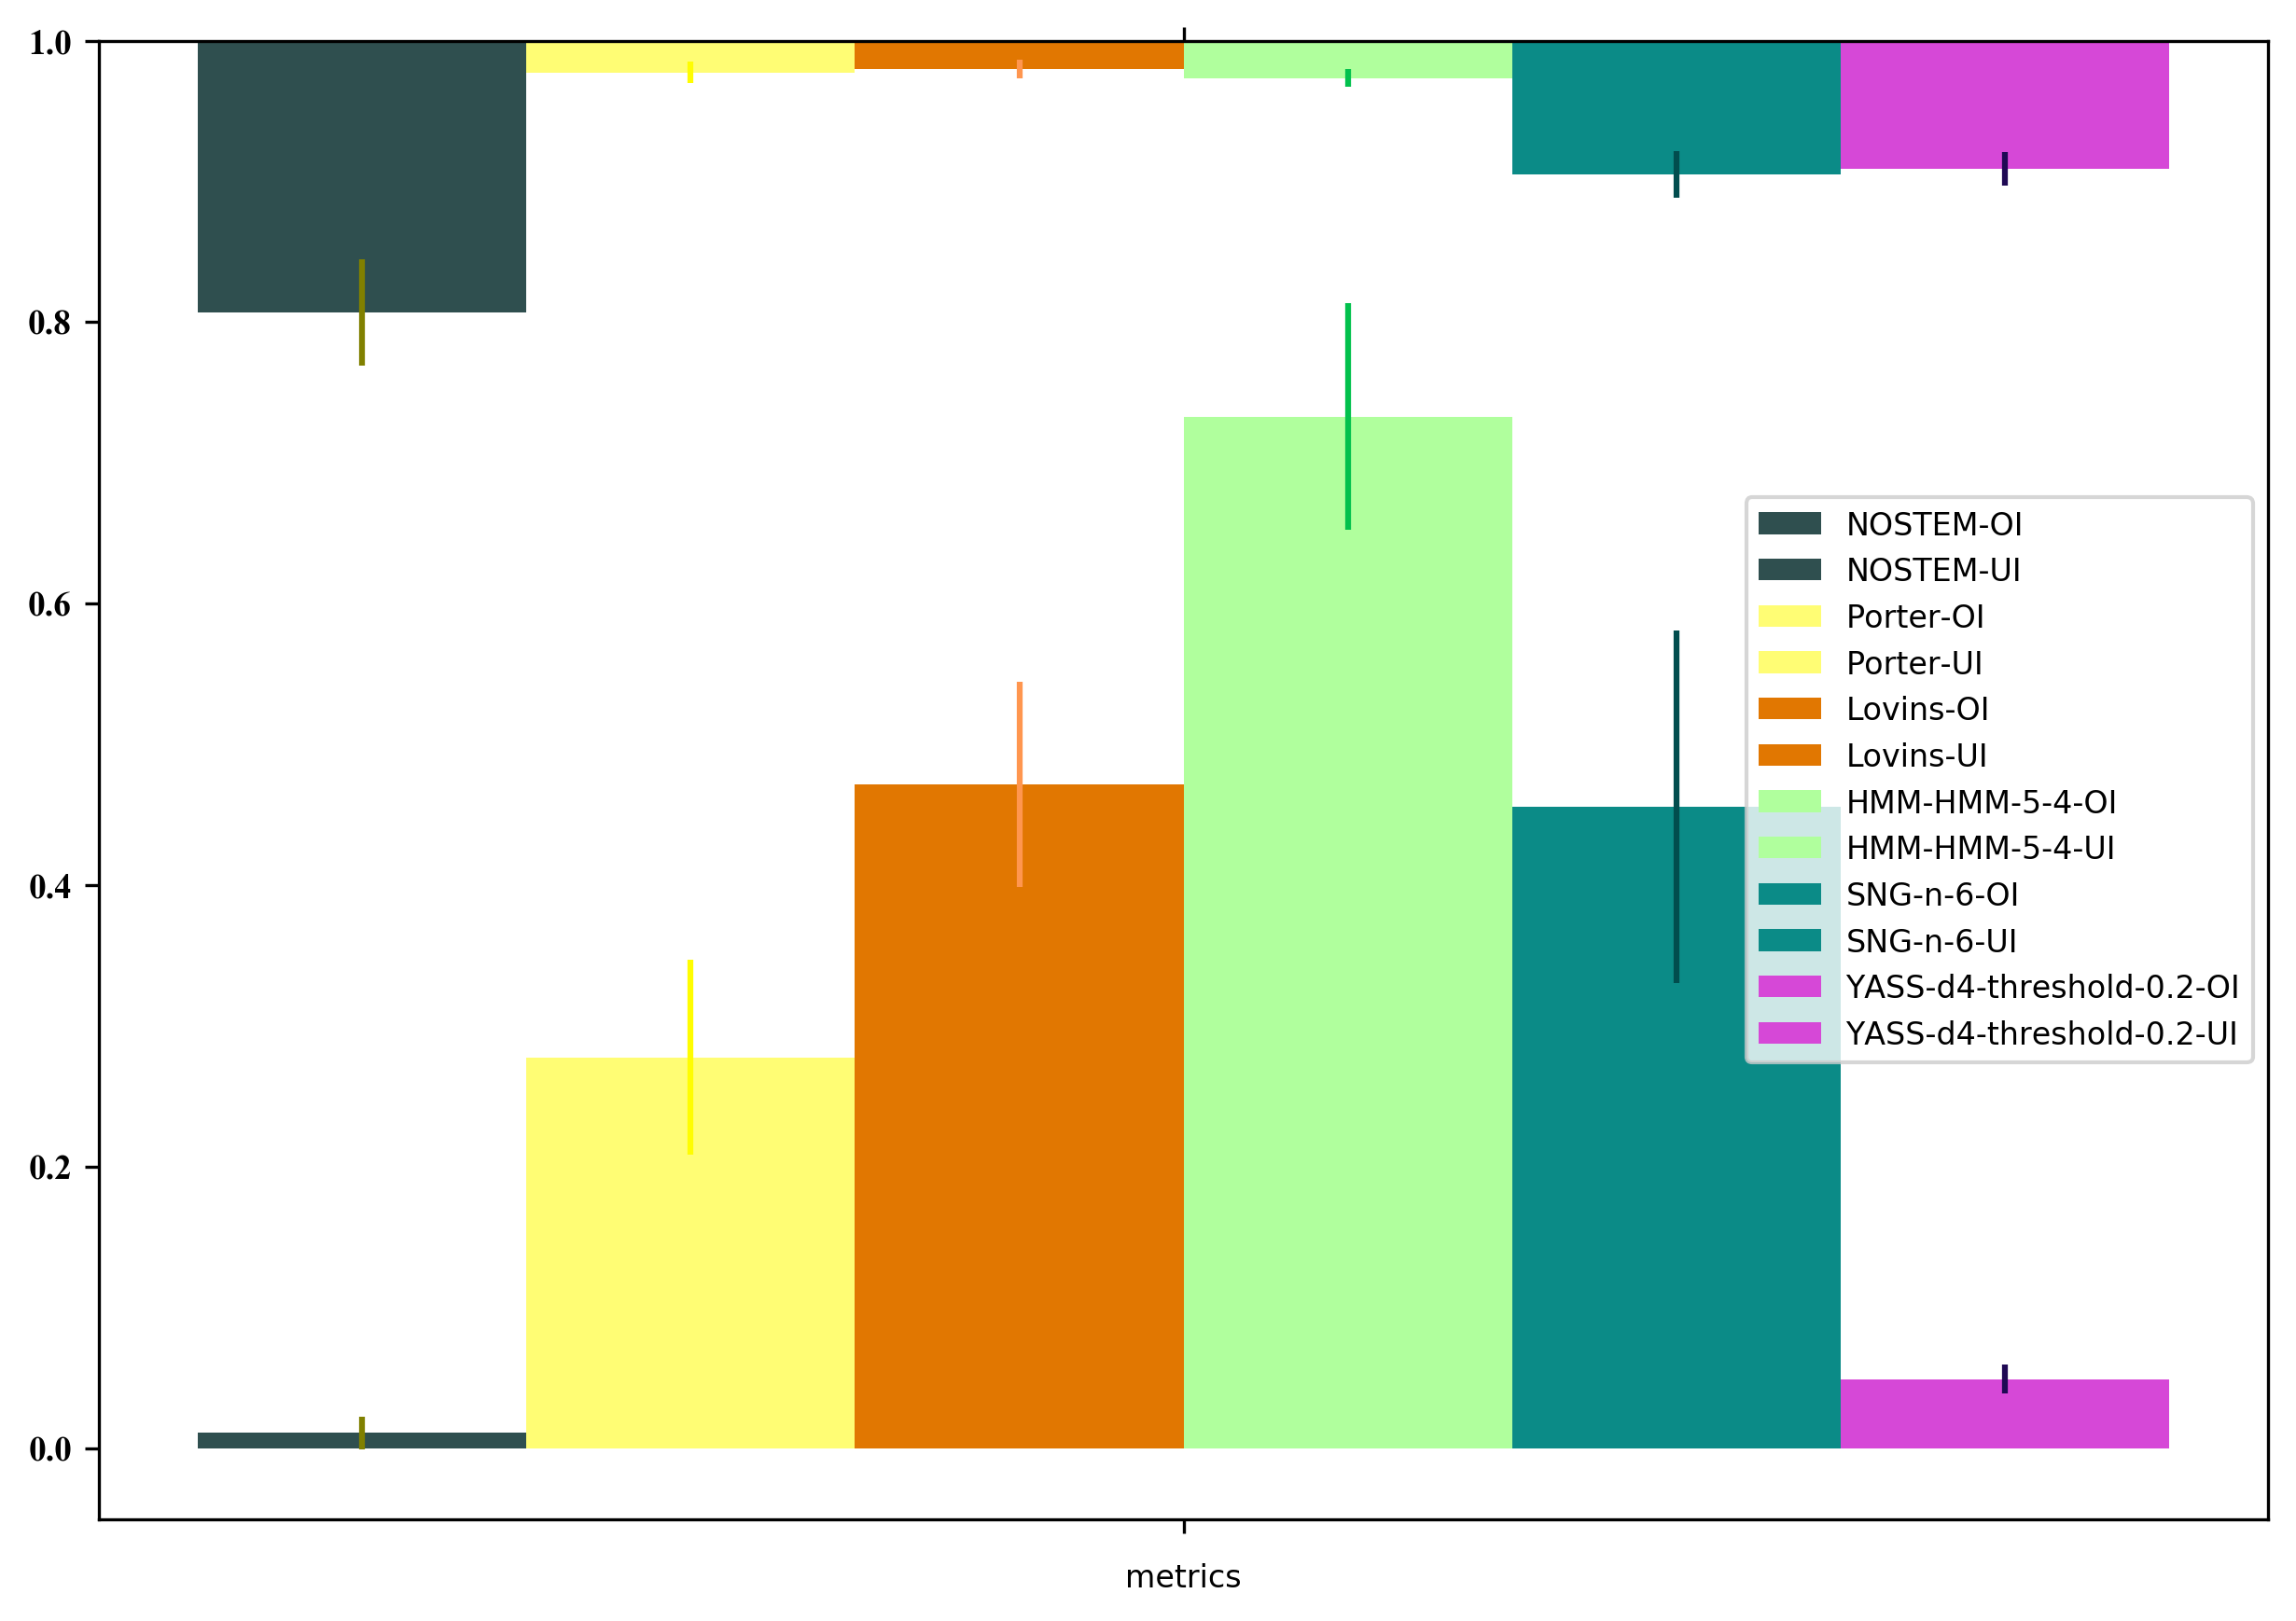

In [621]:
plot_matrics_vs_stemmer(['NOSTEM', 'Porter', 'Lovins', 'HMM-HMM-5-4', 'SNG-n-6', 'YASS-d4-threshold-0.2'],
                        ['OI', 'UI'], [0, 1],
                        ['darkslategray', '#fffd74', '#e17701', '#b0ff9d', '#0b8b87', '#d648d7'],
                        ['olive', '#fffd01', '#ff964f',  '#02c14d', '#014d4e', '#1f0954'],
                       )
                        #figname='oui')

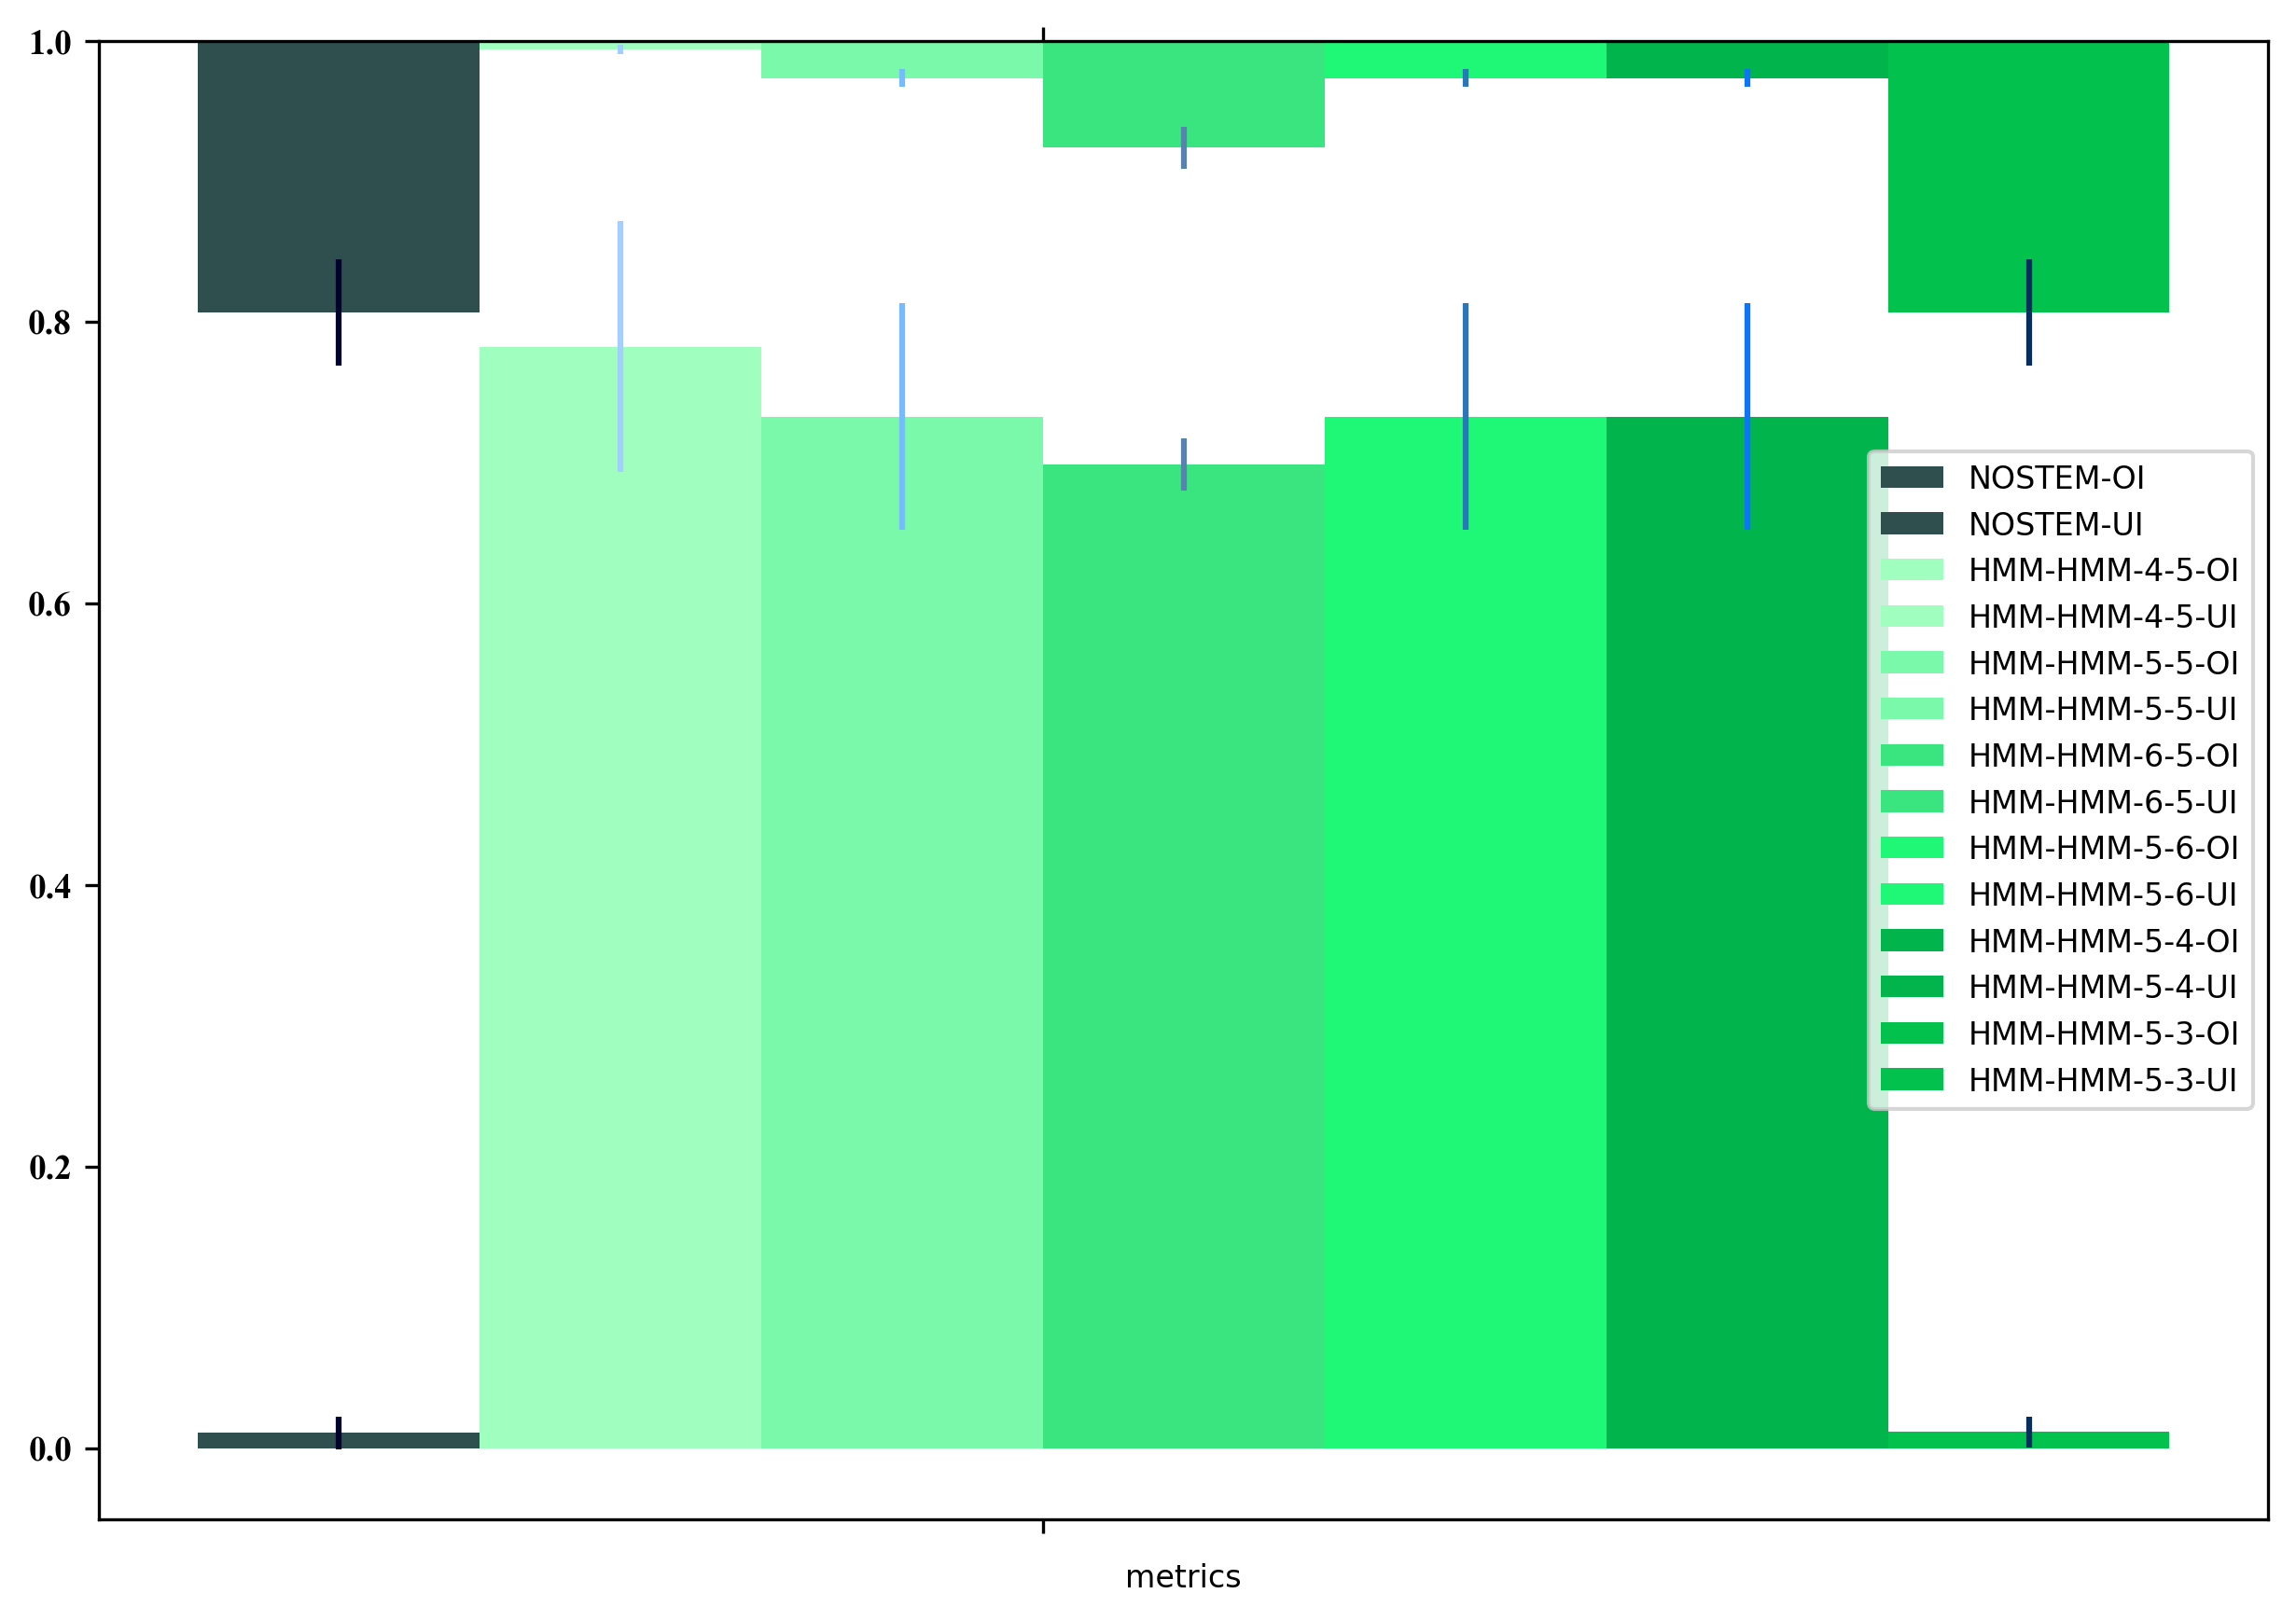

In [335]:
plot_matrics_vs_stemmer(['NOSTEM', 'HMM-HMM-4-5', 'HMM-HMM-5-5', 'HMM-HMM-6-5', 'HMM-HMM-5-6', 'HMM-HMM-5-4', 'HMM-HMM-5-3'],
                        ['', ''],
                        [0, 1],
                        colors=['darkslategray', '#a0febf', '#7af9ab', '#3ae57f', '#1ef876', '#01b44c', '#02c14d', '#009337'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a'],
                       )
                        #figname='HMM_oui')

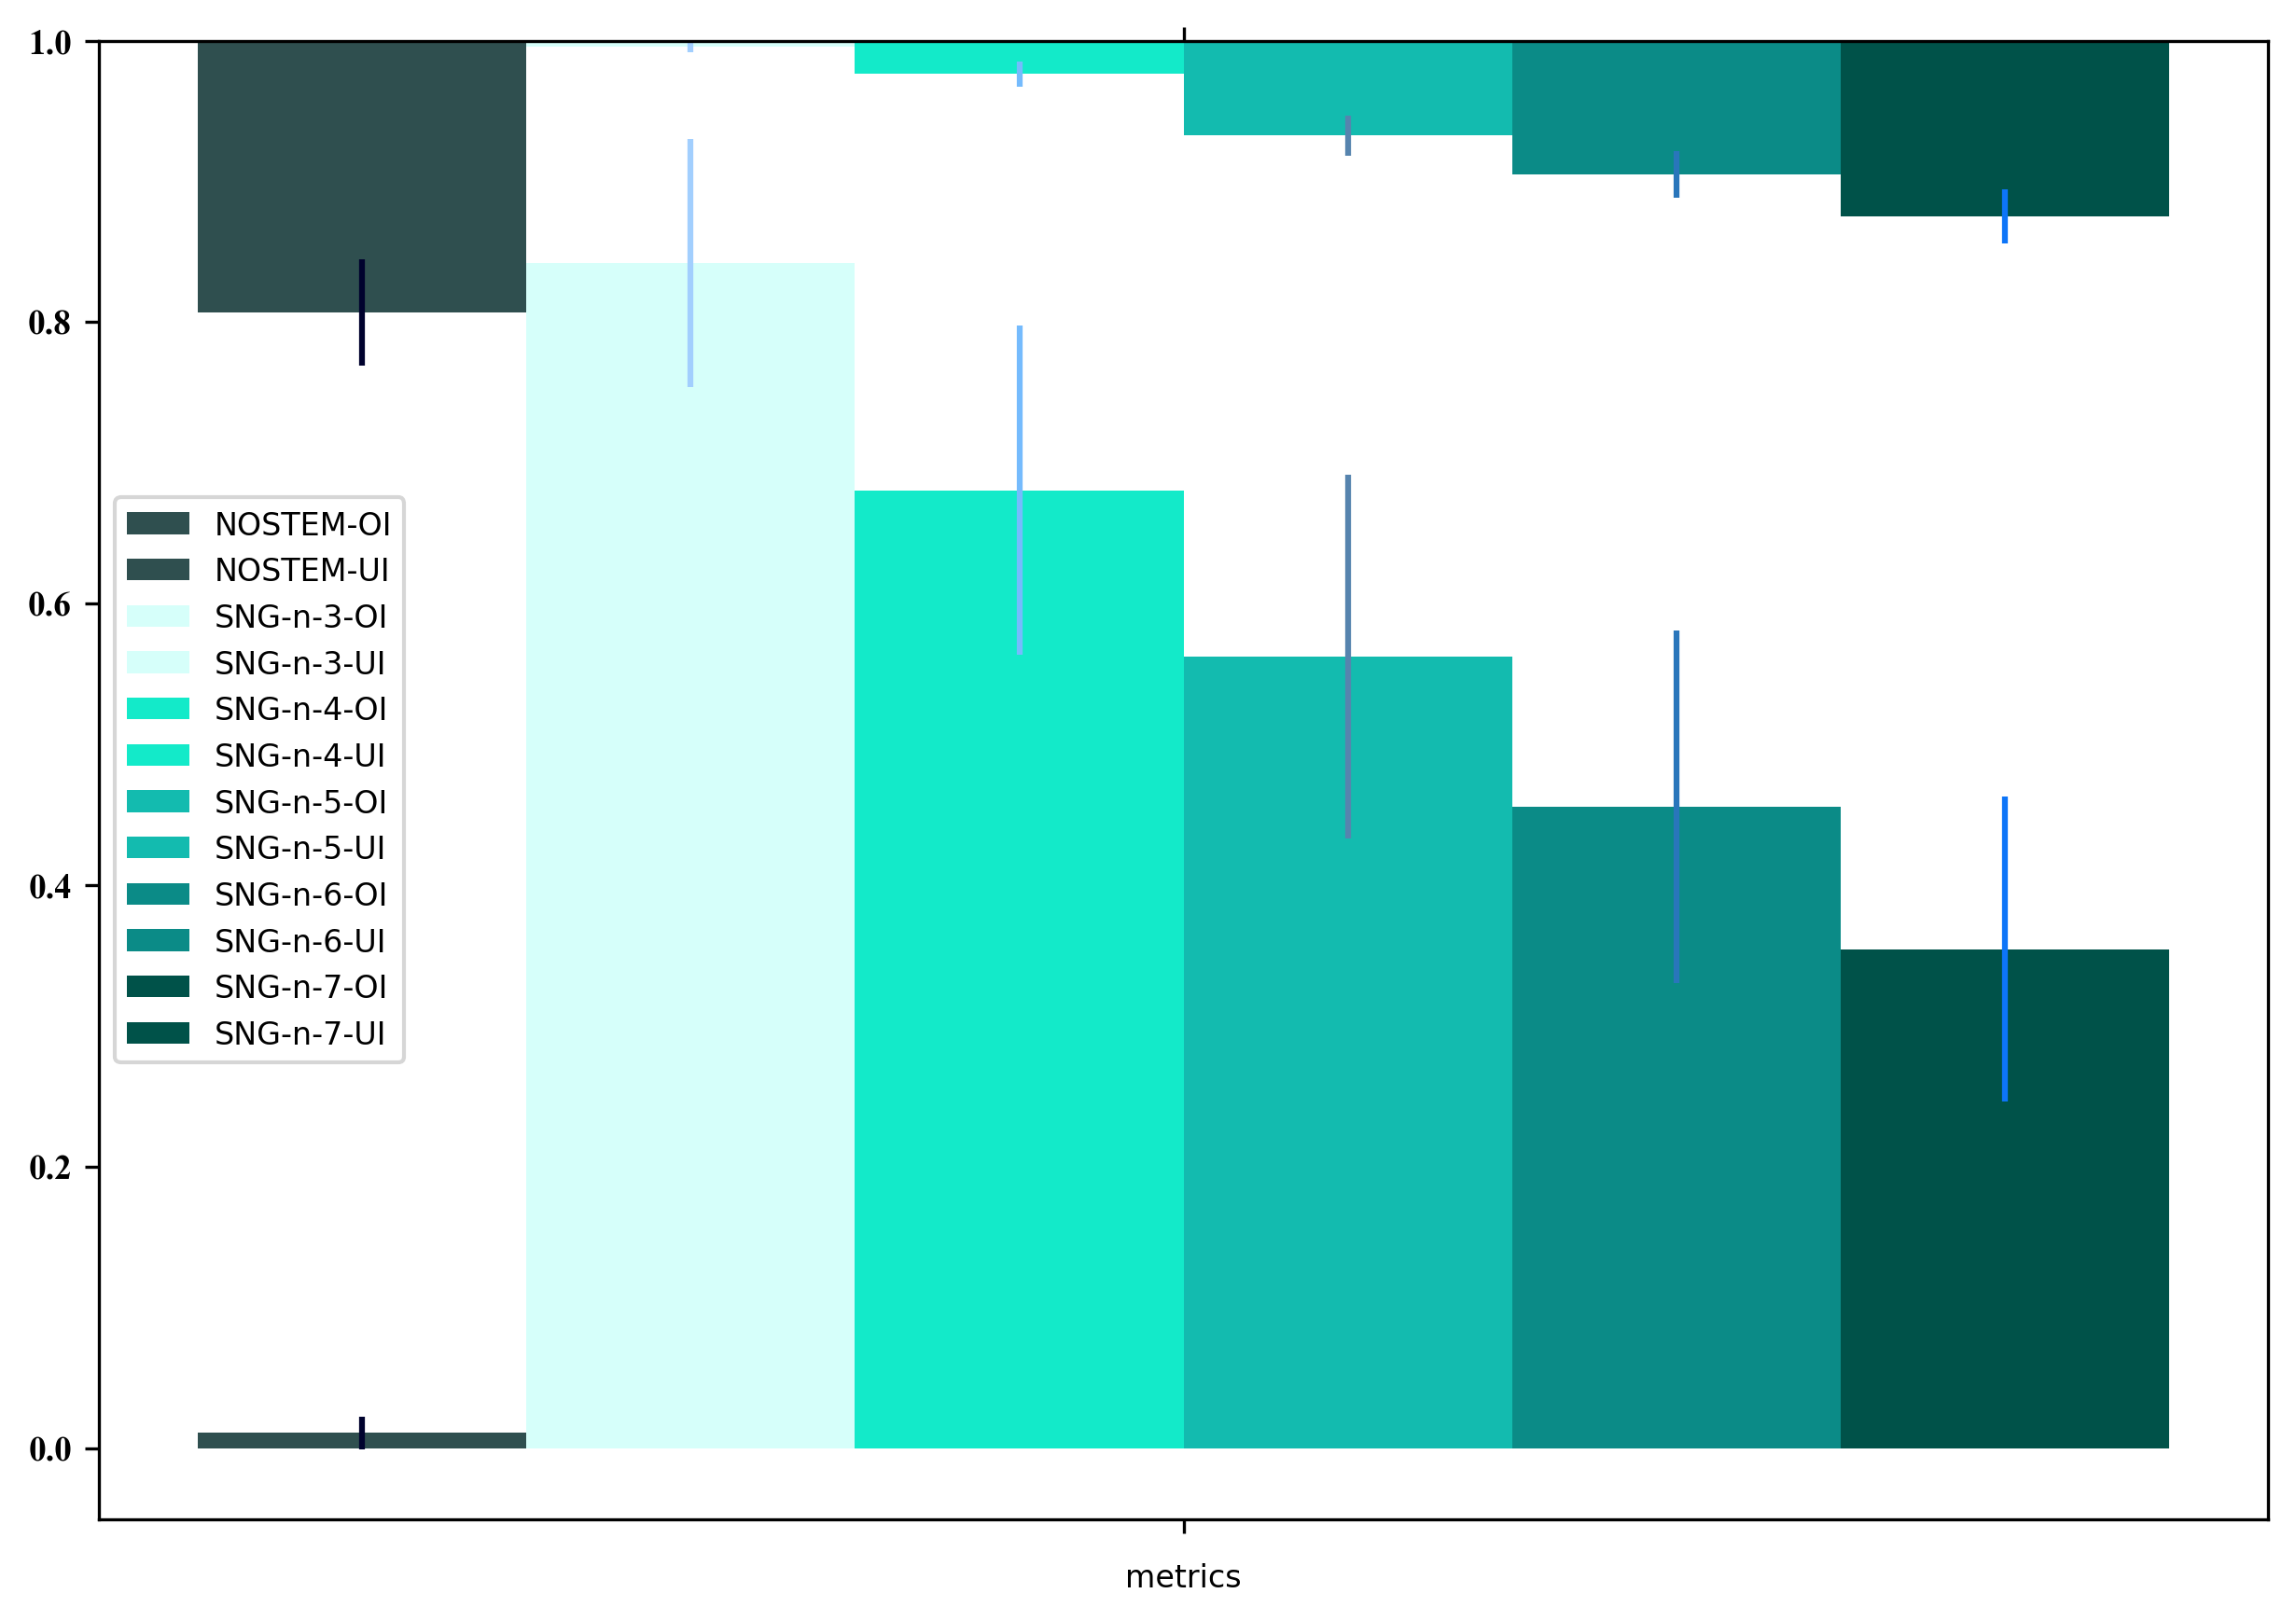

In [338]:
plot_matrics_vs_stemmer(['NOSTEM', 'SNG-n-3', 'SNG-n-4', 'SNG-n-5', 'SNG-n-6', 'SNG-n-7'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [0, 1],
                        colors=['darkslategray', '#d6fffa', '#13eac9', '#13bbaf', '#0b8b87', '#005249', '#03012d'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a'],
                       )
                        #figname='SNG_oui')

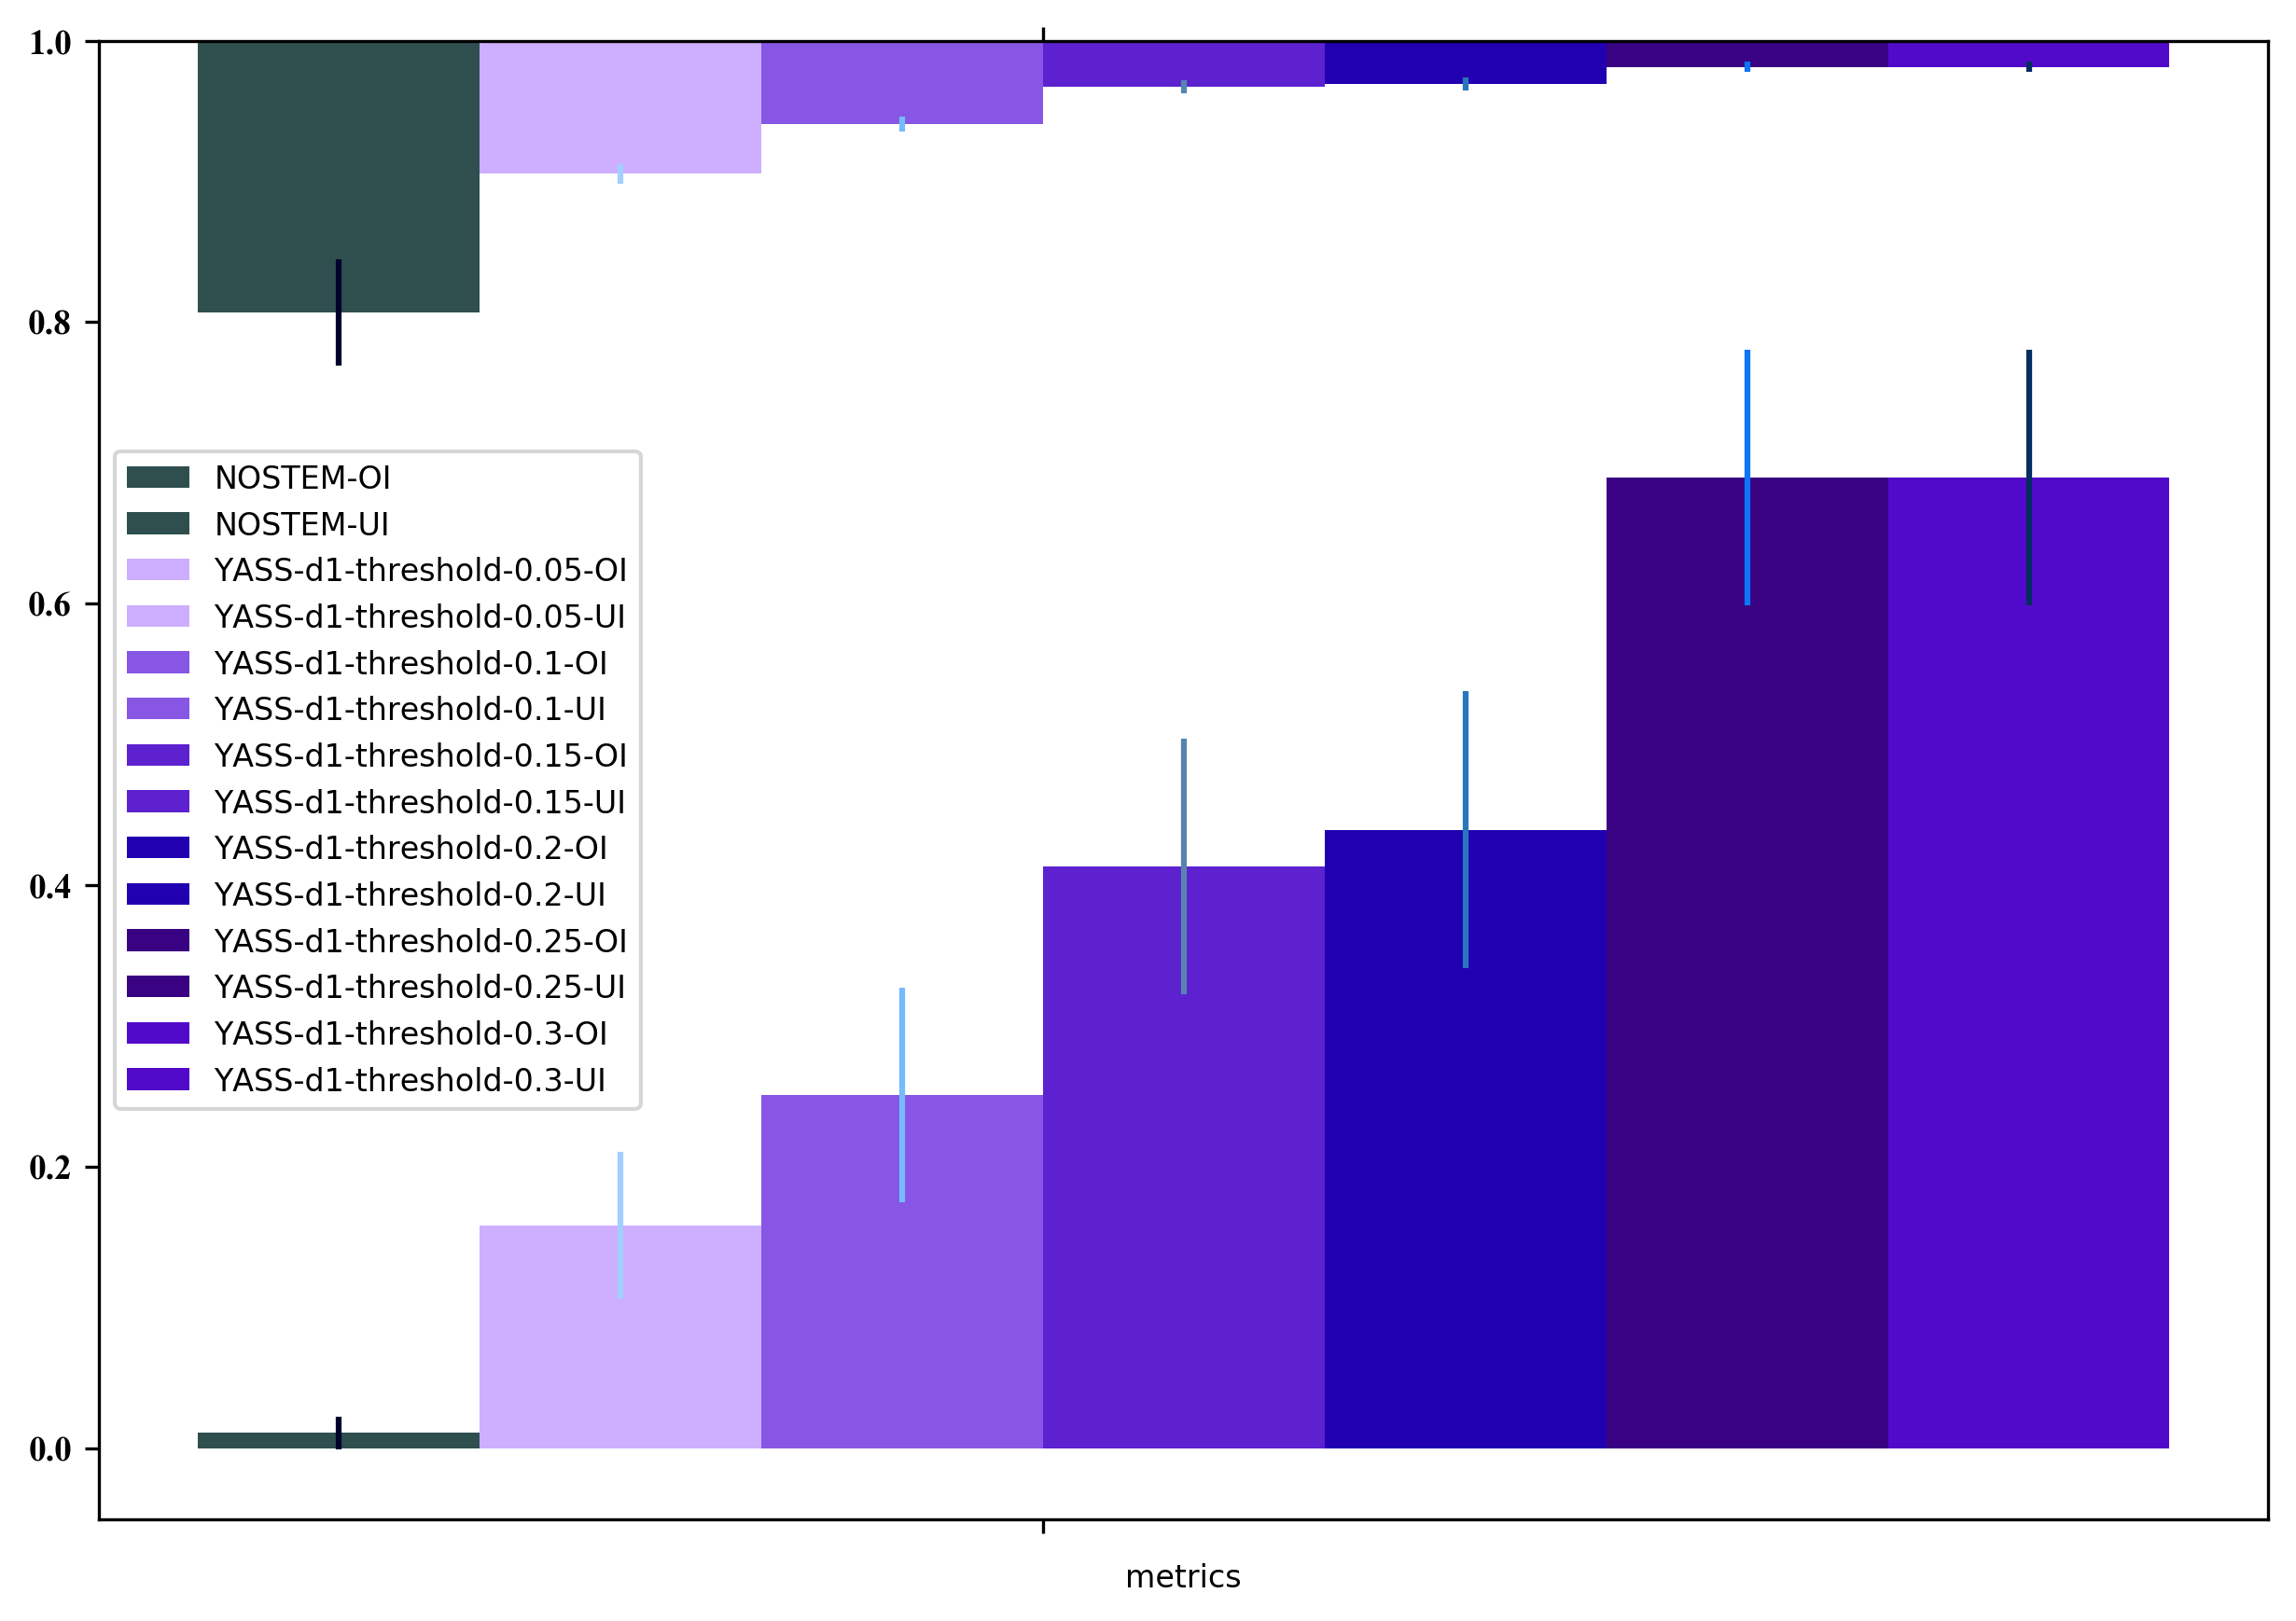

In [341]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d1-threshold-0.05', 
                         'YASS-d1-threshold-0.1',
                         'YASS-d1-threshold-0.15',
                         'YASS-d1-threshold-0.2',
                         'YASS-d1-threshold-0.25',
                         'YASS-d1-threshold-0.3'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [0, 1],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                        #figname='YASS_d1_oui')

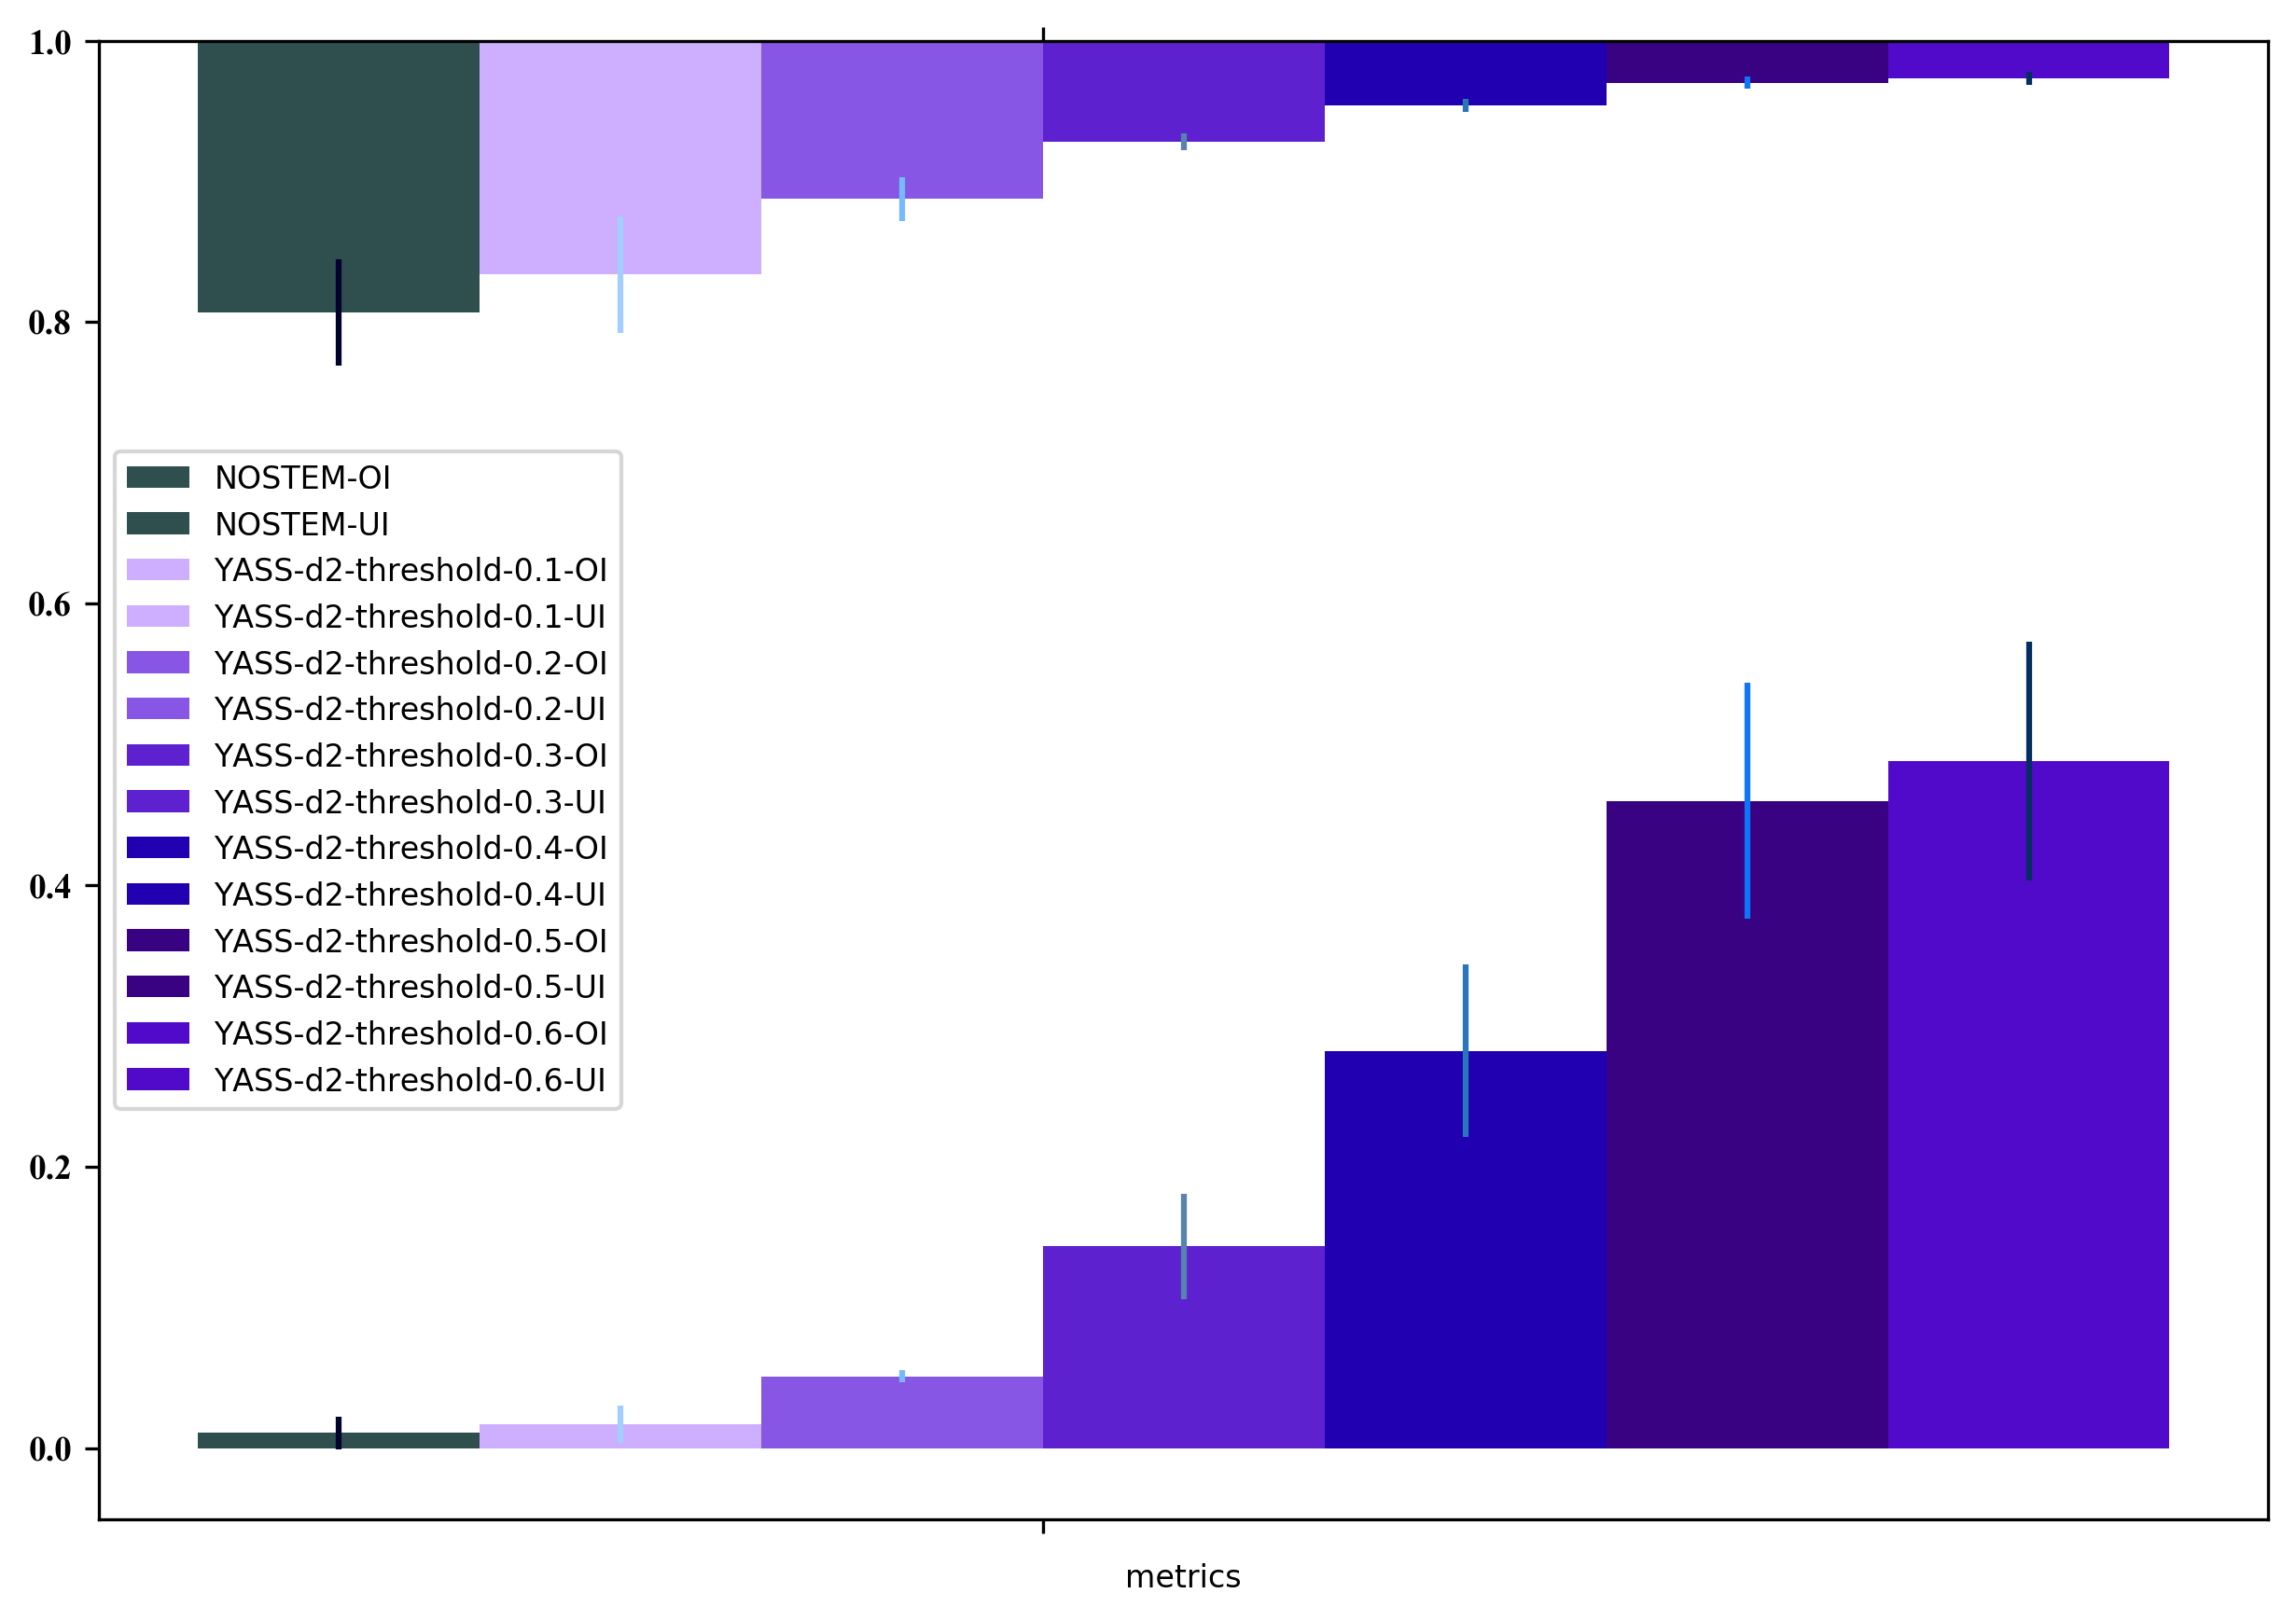

In [343]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d2-threshold-0.1', 
                         'YASS-d2-threshold-0.2',
                         'YASS-d2-threshold-0.3',
                         'YASS-d2-threshold-0.4',
                         'YASS-d2-threshold-0.5',
                         'YASS-d2-threshold-0.6'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [0, 1],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                       #figname='YASS_d2_oui')

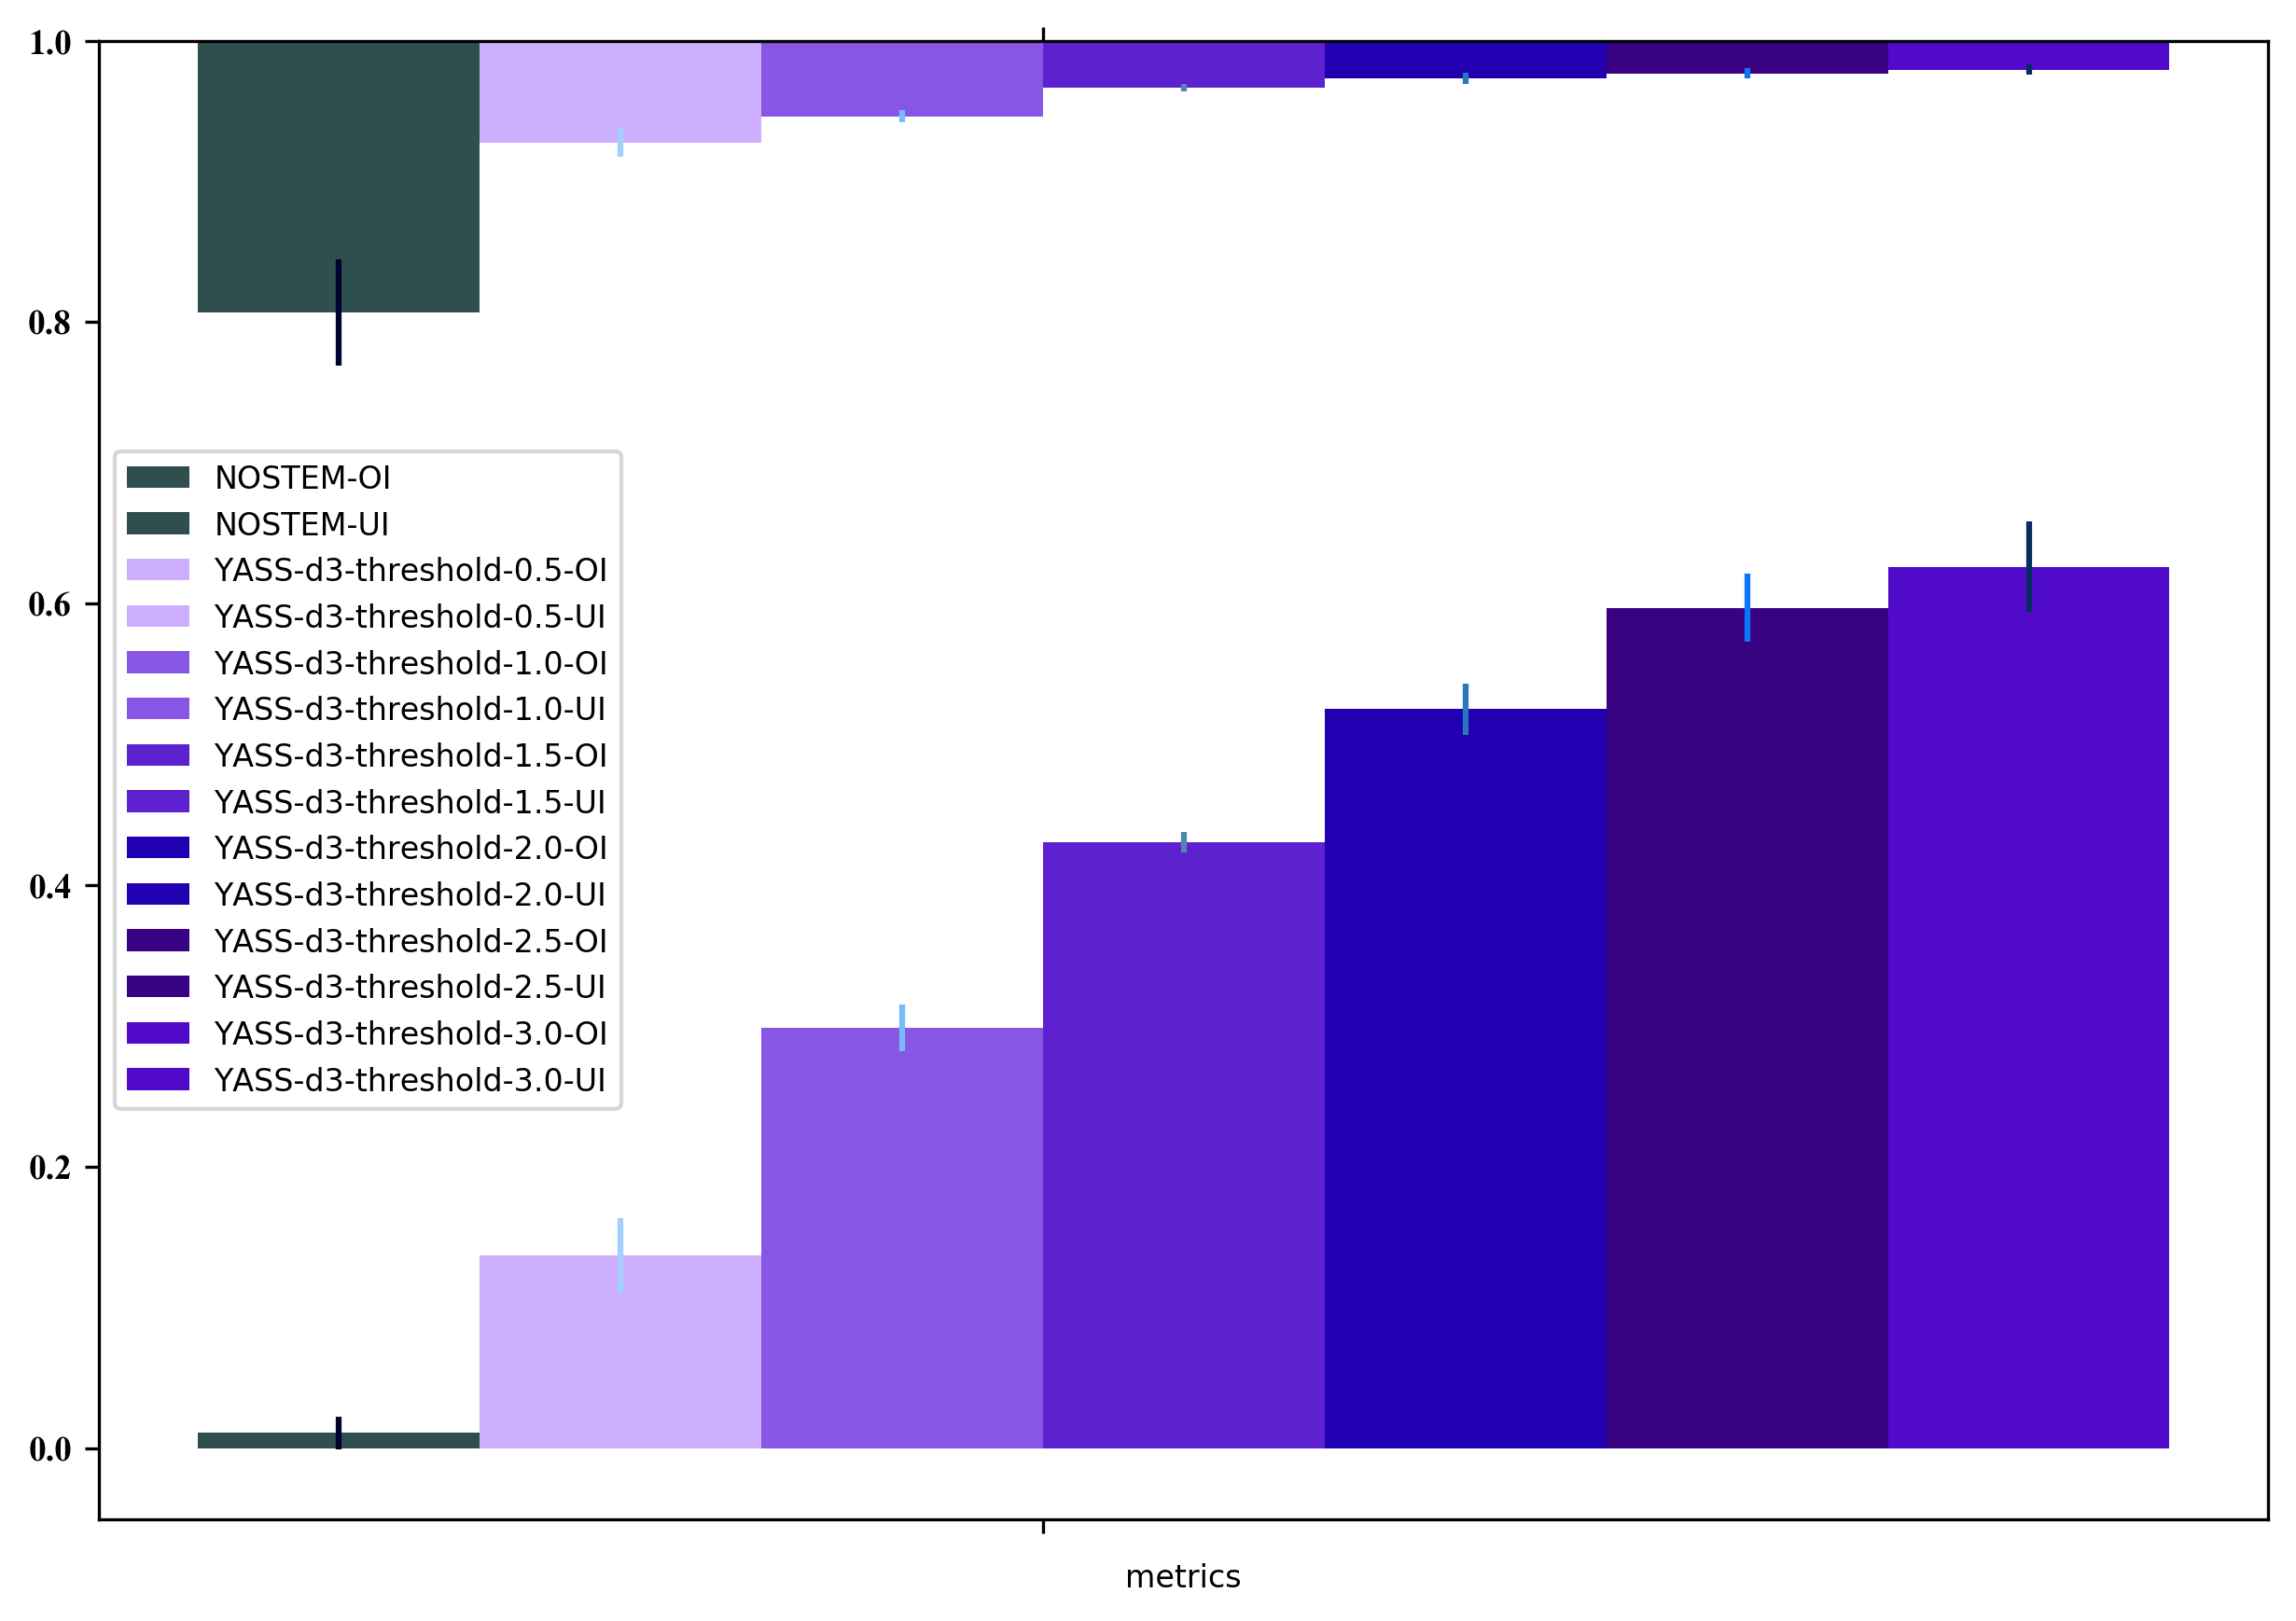

In [345]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d3-threshold-0.5', 
                         'YASS-d3-threshold-1.0',
                         'YASS-d3-threshold-1.5',
                         'YASS-d3-threshold-2.0',
                         'YASS-d3-threshold-2.5',
                         'YASS-d3-threshold-3.0'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [0, 1],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                       #figname='YASS_d3_oui')

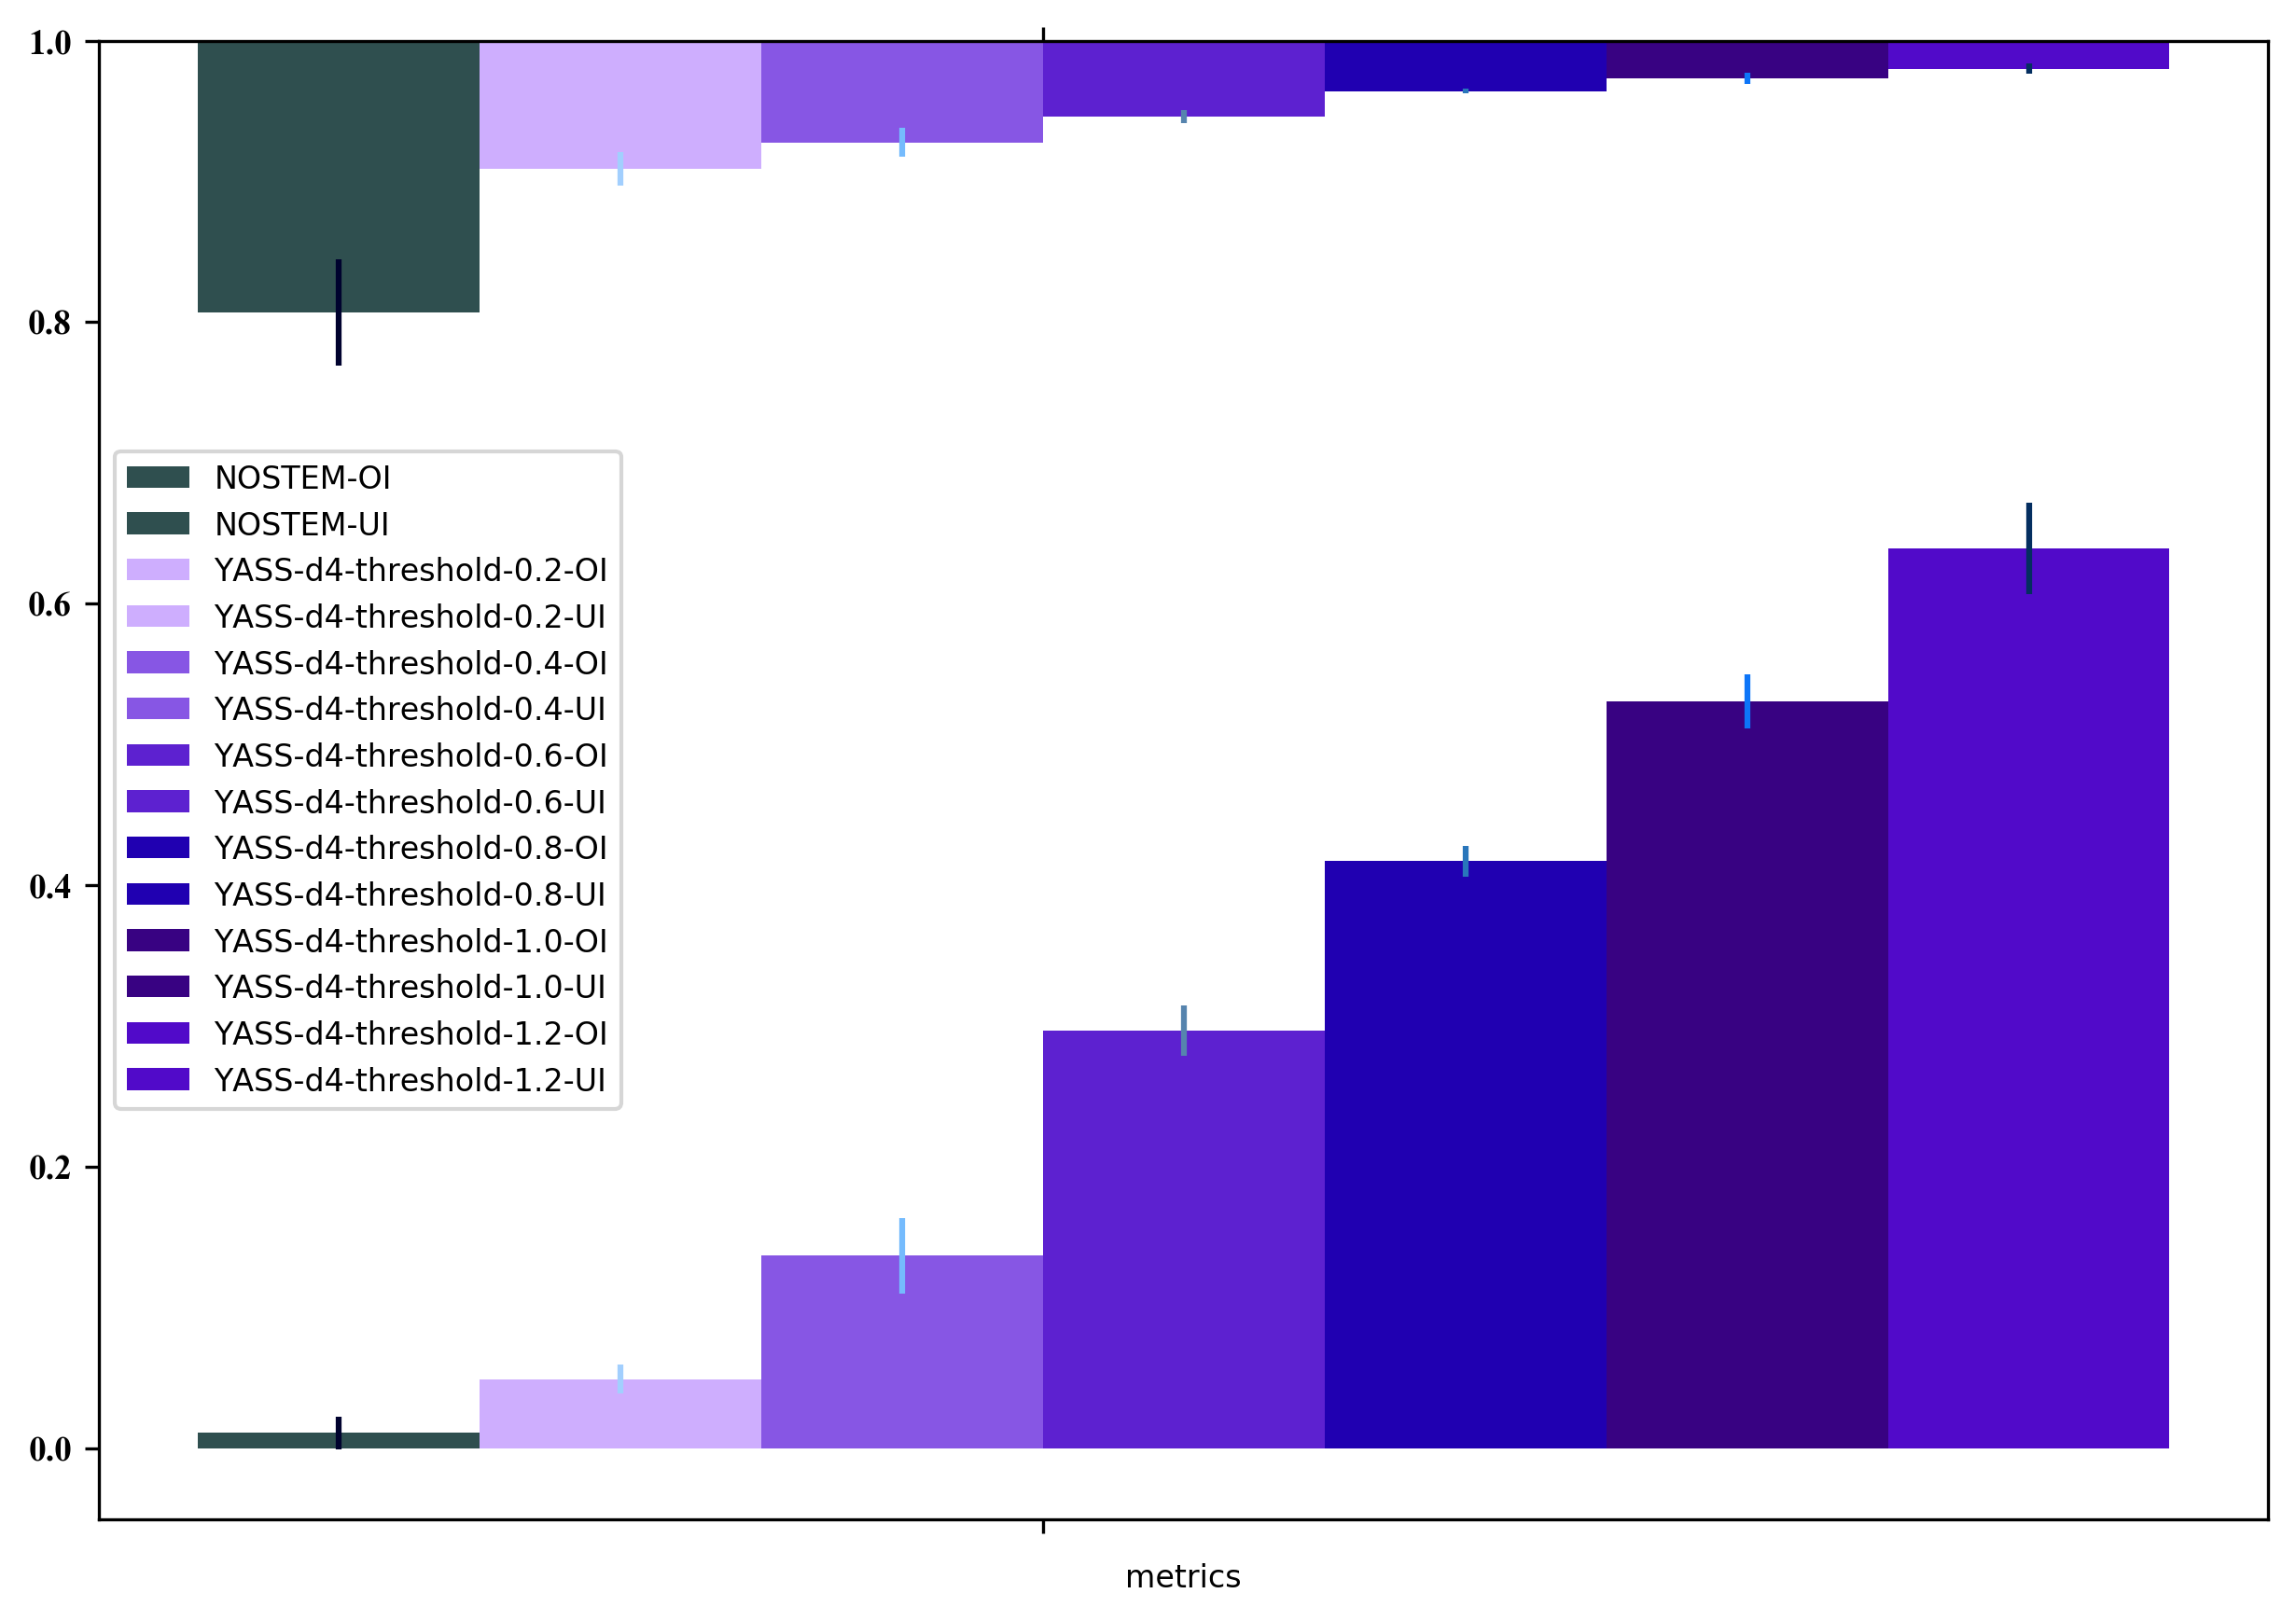

In [349]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d4-threshold-0.2', 
                         'YASS-d4-threshold-0.4',
                         'YASS-d4-threshold-0.6',
                         'YASS-d4-threshold-0.8',
                         'YASS-d4-threshold-1.0',
                         'YASS-d4-threshold-1.2'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [0, 1],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                       #figname='YASS_d4_oui')

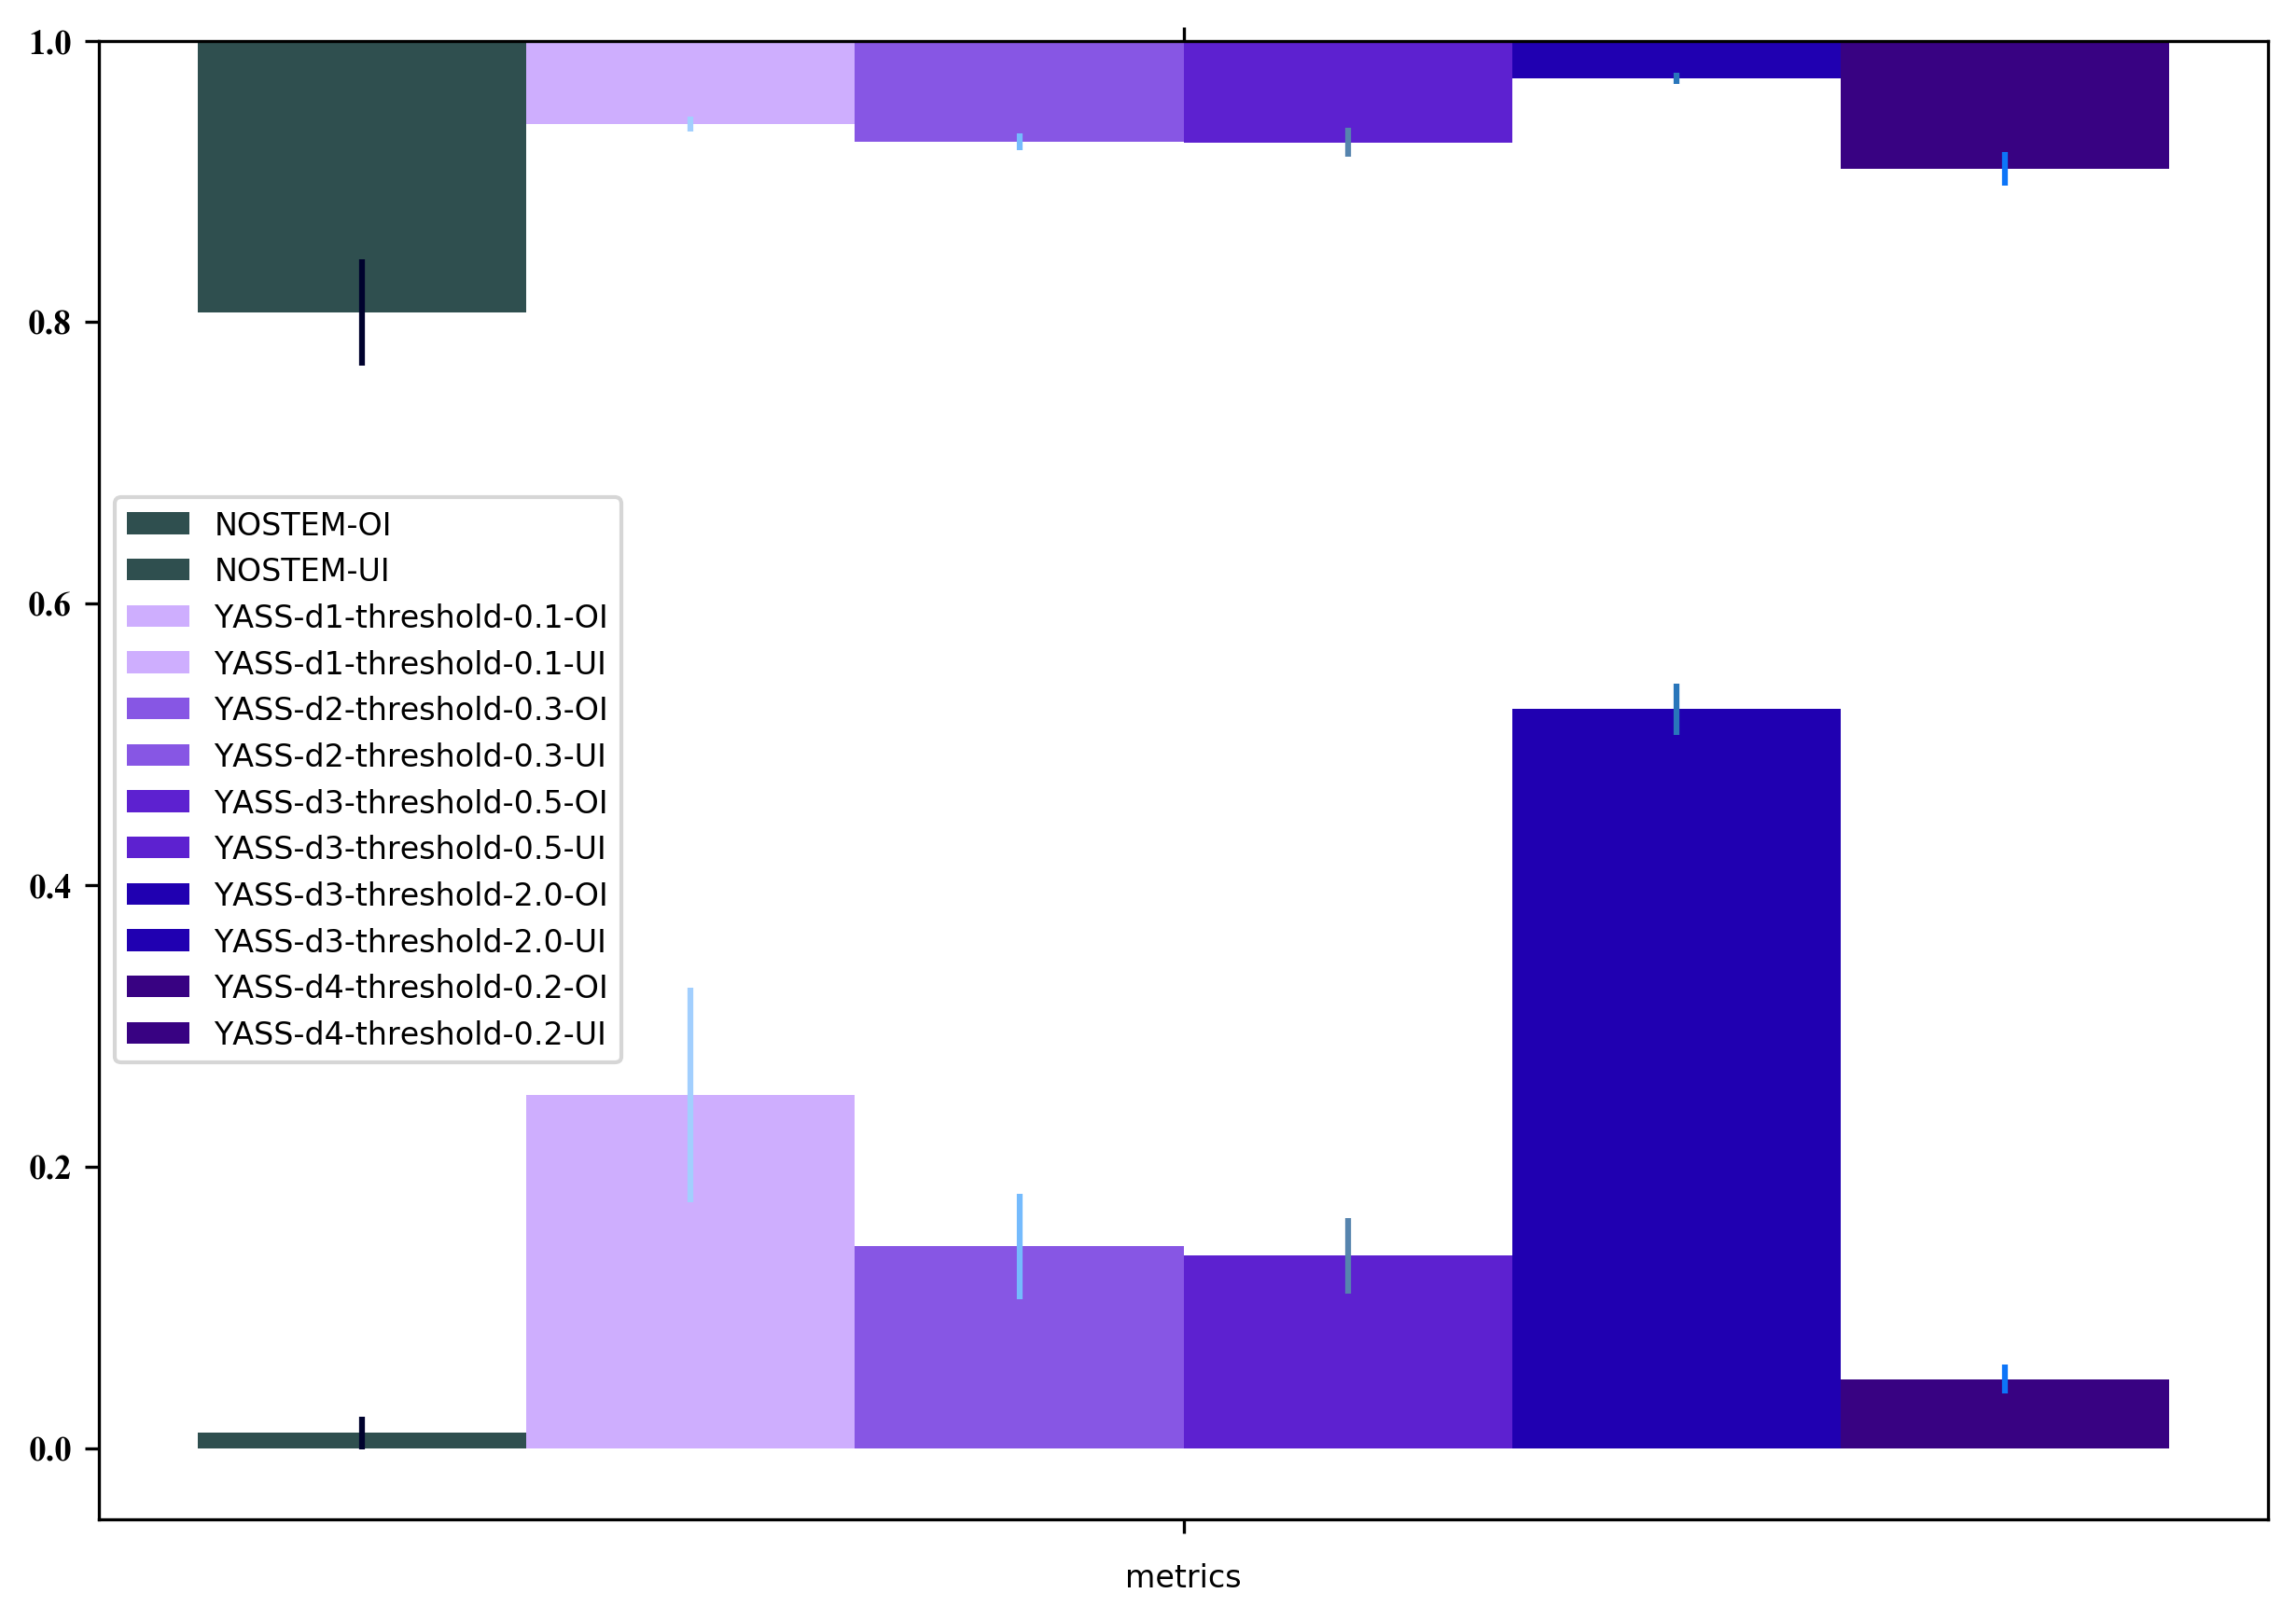

In [351]:
plot_matrics_vs_stemmer(['NOSTEM', 'YASS-d1-threshold-0.1', 
                         'YASS-d2-threshold-0.3',
                         'YASS-d3-threshold-0.5',
                         'YASS-d3-threshold-2.0',
                         'YASS-d4-threshold-0.2'],
                        ['Precise', 'Recall', 'F1', 'P(Corpus-baed)', 'R(Corpus-based)', 'F1(Corpus-based)'],
                        [0, 1],
                        colors=['darkslategray', '#ceaefe', '#8756e4', '#5d21d0', '#2000b1', '#380282', '#510ac9', '#1f0954'],
                        ecolors=['#00022e', '#a2cffe', '#75bbfd', '#5684ae', '#2976bb', '#0d75f8', '#042e60', '#01386a', '#FFFFFF'],
                       )
                       #figname='YASS_oui')

In [559]:
path = 'G:\\dataset\\corpus\\BNC\\Stem\\HMM\\HMM-6-5\\ACPROSE.bnc.stem.txt.model.info.txt'

In [560]:
f =open(path)

In [561]:

lines = f.readlines()
pi = np.array(lines[1].split(), dtype=np.float32)
tp = np.array([l.split() for l in lines[3:14]], dtype=np.float32)
ep = np.array([l.split() for l in lines[15:26]], dtype=np.float32)


In [562]:
pi

array([3.0162303e-02, 1.0165169e-28, 3.9796876e-43, 9.6983773e-01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [563]:
tp.shape

(11, 11)

In [564]:
ep.shape

(11, 28)

In [565]:
for i in range(11):
    temp = ep[i][-2]
    for j in range(26, 0, -1):
        ep[i][j] = ep[i][j - 1]
    ep[i][0] = temp

In [566]:
state_label = ['', '$S_{prefix}$', '$S_{prefix}$', '$S_{prefix}$','$S_{prefix}$','$S_{prefix}$','$S_{prefix}$',
              '$S_{suffix}$', '$S_{suffix}$', '$S_{suffix}$',  '$S_{suffix}$' , '$S_{suffix}$' ,'']
x = [-0.5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10.5]
y = [-0.5] + list(range(28)) + [27.5]
observed_state = ['', '^', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h' ,'i', 'j', 'k',
                  'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
                  'x', 'y', 'z', '$', '']

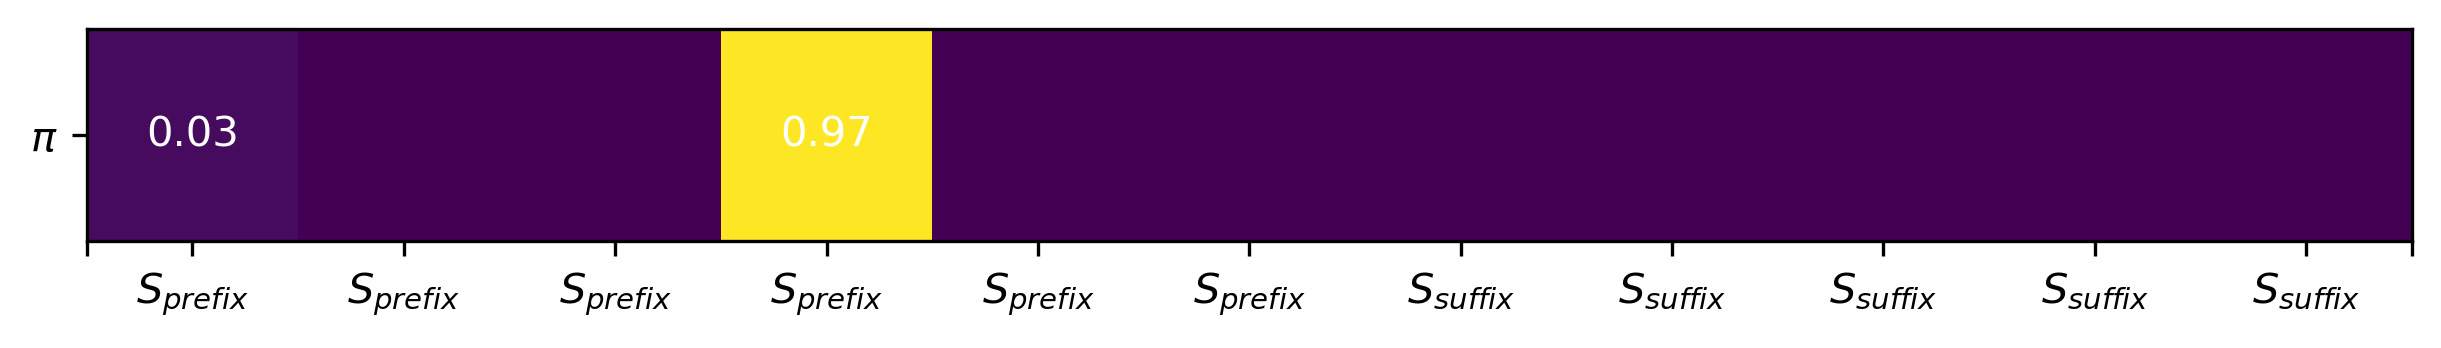

In [567]:
plt.imshow([pi])

plt.yticks([0], ['$\pi$'])
plt.xticks(x, state_label)
for i in range(len(pi)):
    if not '%.2f'%pi[i] == '0.00':
        plt.text(i, 0, '%.2f'%pi[i] , ha='center', va="center", color='w')
plt.savefig('HMM-6-5-Pi.jpg', bbox_inches = 'tight')
#plt.savefig('HMM-4-5-Pi.eps', dpi=300, format='eps', bbox_inches = 'tight')

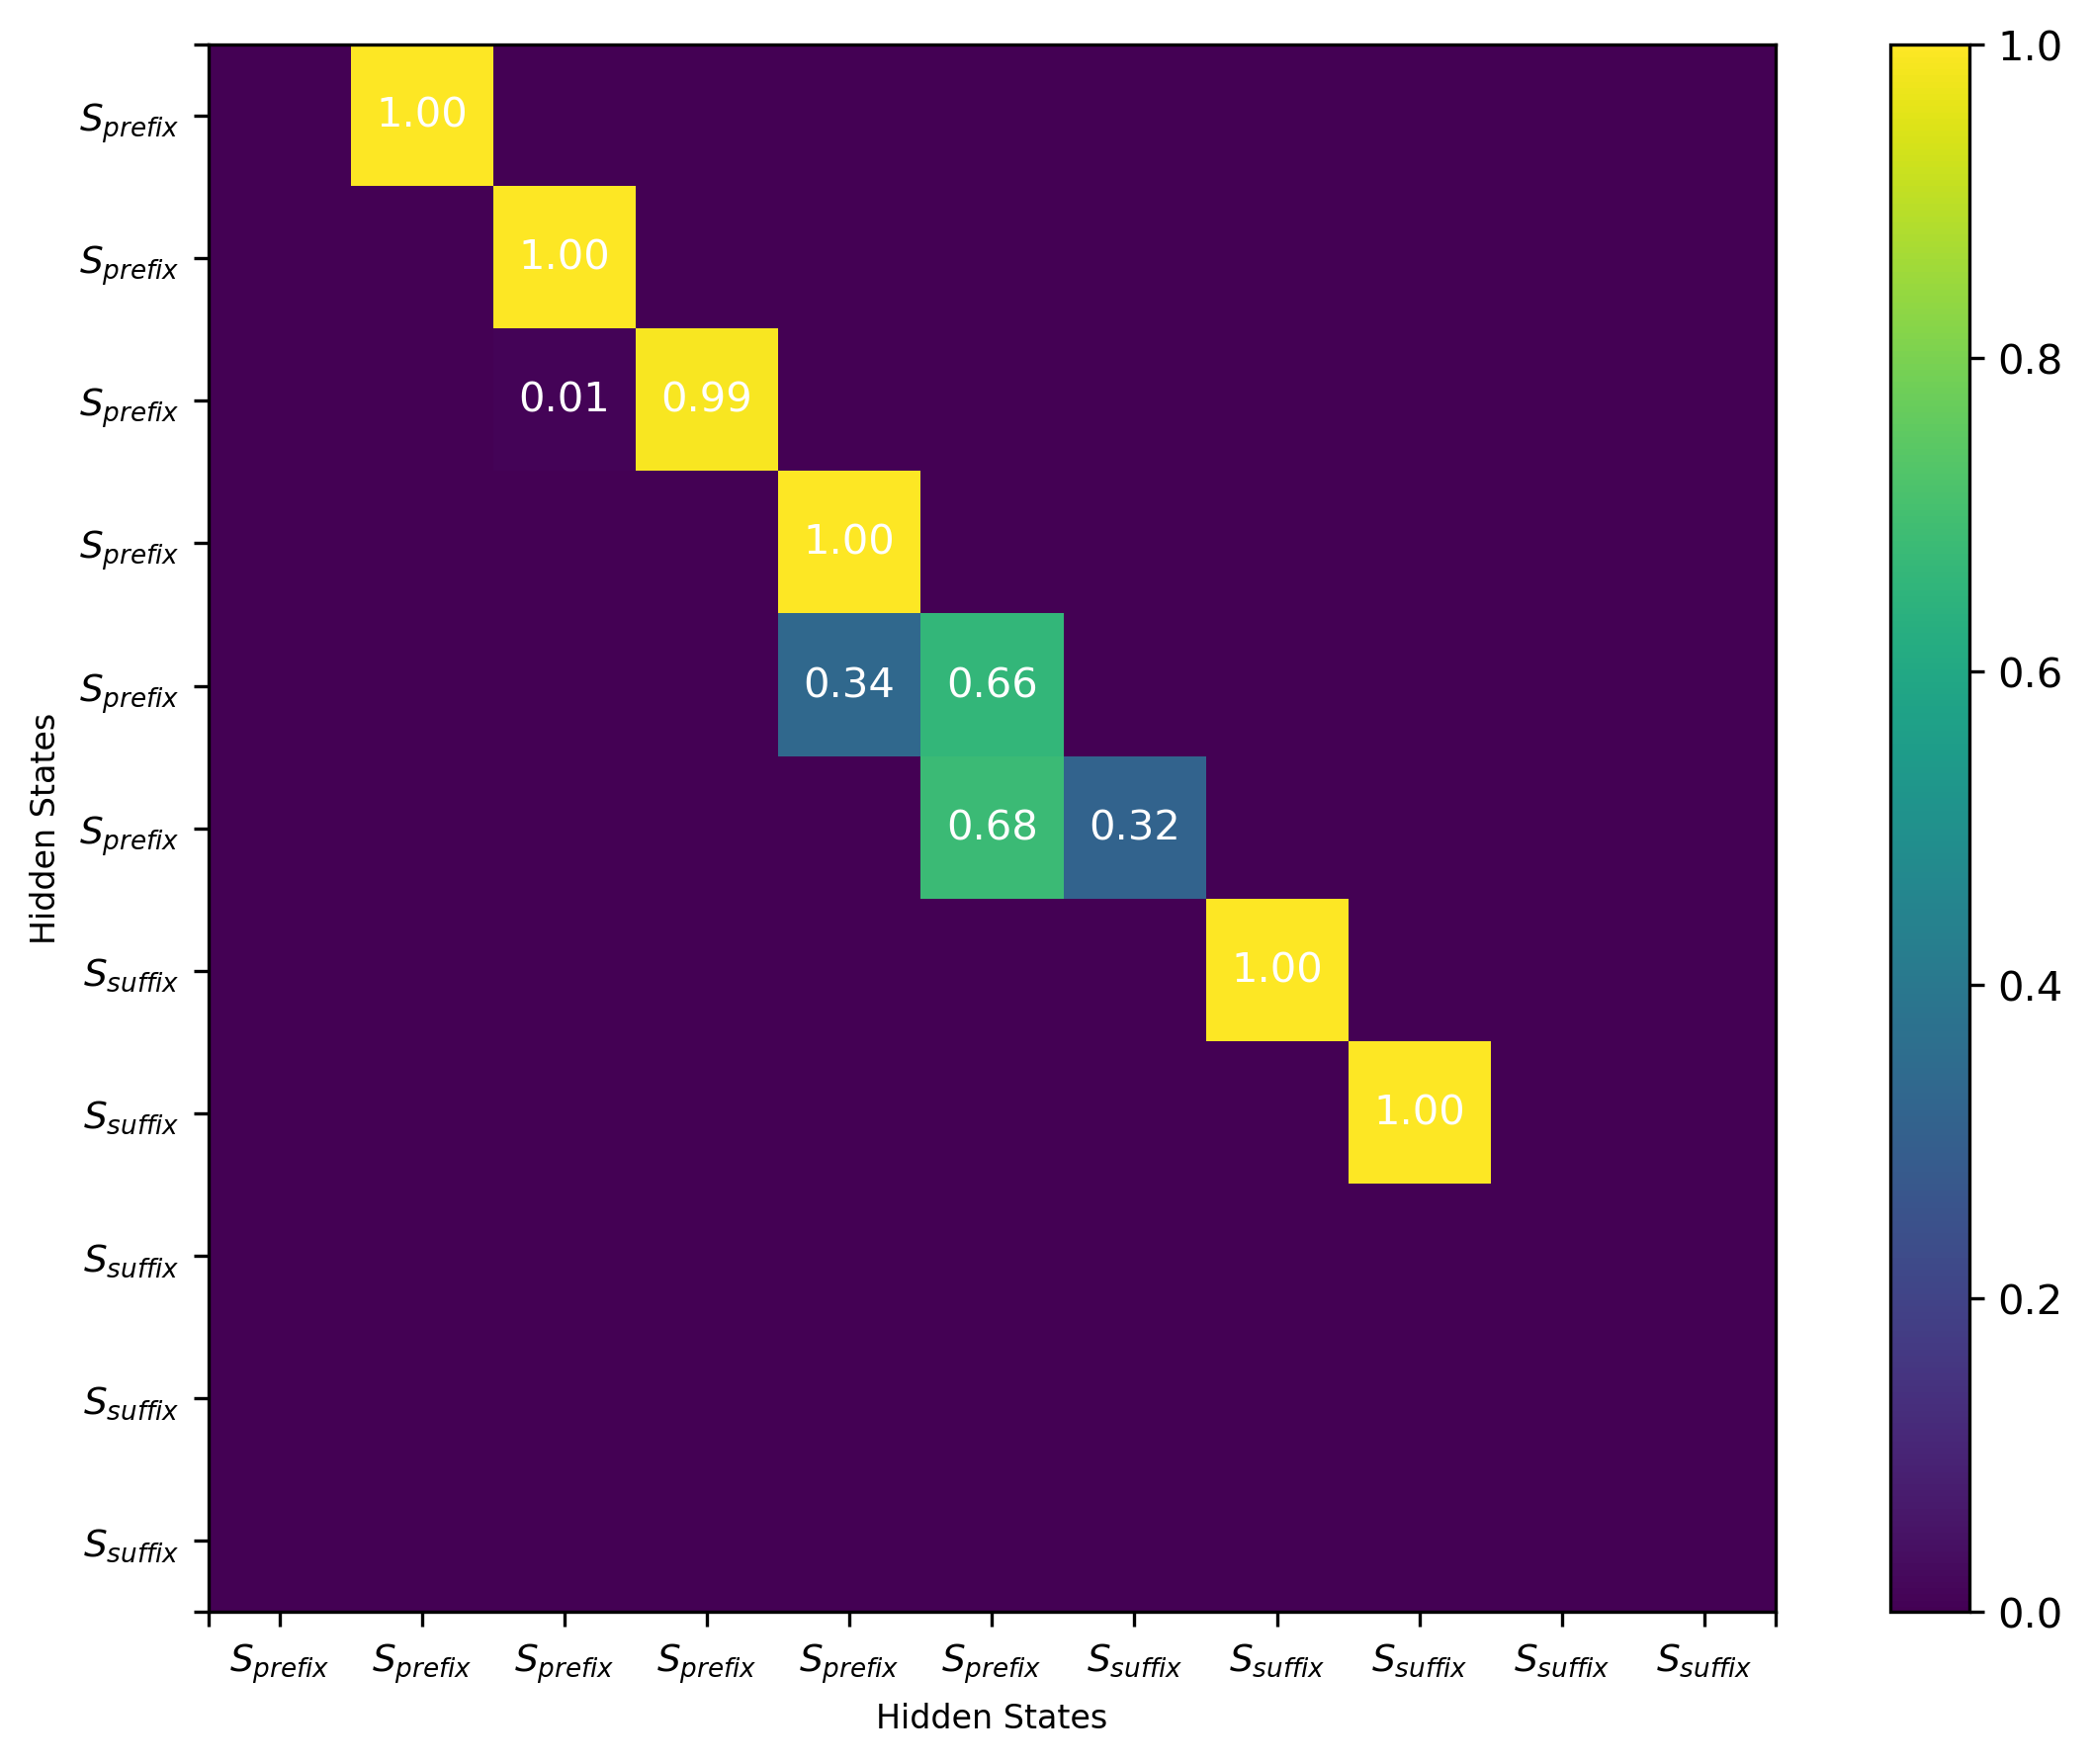

In [568]:
plt.imshow(tp)

plt.xticks(x, state_label, fontproperties = 'Times New Roman', size = 9)
plt.yticks(x, state_label, fontproperties = 'Times New Roman', size = 9)
for i in range(len(tp)):
    for j in range(len(tp[0])):
        if not '%.2f'%tp[i][j] == '0.00':
            plt.text(j, i, '%.2f'%tp[i][j], ha='center', va="center", color='w')
plt.xlabel('Hidden States', fontsize=8)
plt.ylabel('Hidden States', fontsize=8)
plt.colorbar()
plt.savefig('HMM-6-5-TP.jpg', bbox_inches = 'tight')
#plt.savefig('HMM-4-5-TP.eps', dpi=300, format='eps', bbox_inches = 'tight')

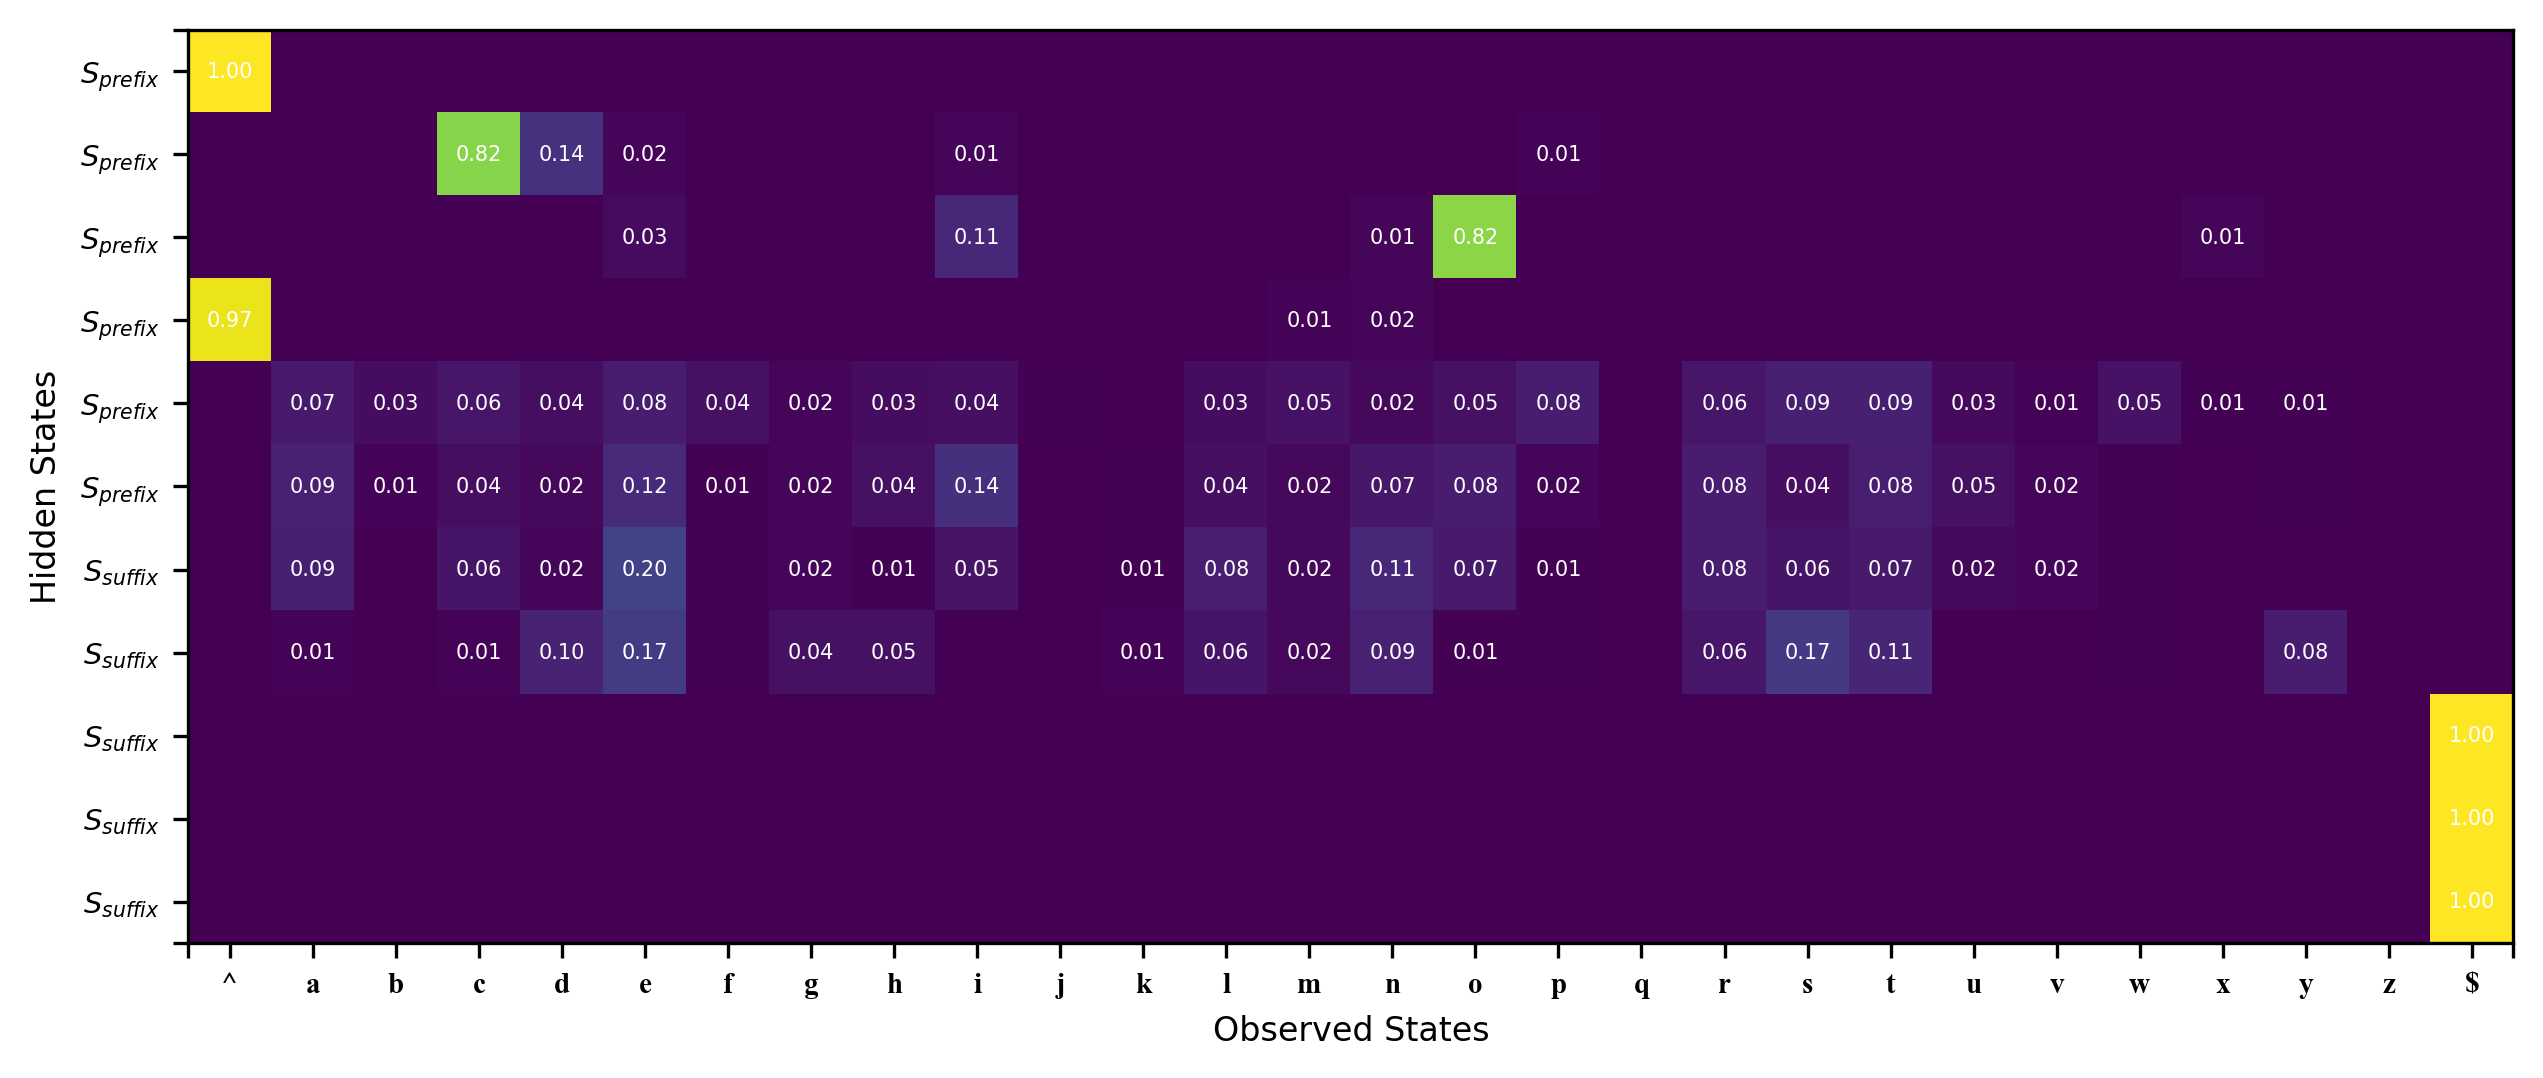

In [569]:
plt.imshow(ep)
plt.xticks(y, observed_state, fontproperties = 'Times New Roman', size = 7)
plt.yticks(x, state_label, fontproperties = 'Times New Roman', size = 7)
plt.xlabel('Observed States', fontsize=8)
plt.ylabel('Hidden States', fontsize=8)
for i in range(len(ep)):
    for j in range(len(ep[0])):
         if not '%.2f'%ep[i][j] == '0.00':
            plt.text(j, i, '%.2f'%ep[i][j], ha='center', va="center", color='w', fontsize=5)
plt.savefig('HMM-6-5-EP.jpg', bbox_inches = 'tight')
#plt.savefig('HMM-4-5-EP.eps', dpi=300, format='eps', bbox_inches = 'tight')

In [604]:
def plot_p_vs_r(m_name, m_index, figname=None):
    stemmer_vs_maxtrics_domain = {}
    domains = []
    for domain, stemmer_tuple in matrics.items():
        domains.append(domain)
        for stemmer, matrics_tuple in stemmer_tuple.items():
            if stemmer not in stemmer_vs_maxtrics_domain.keys():
                stemmer_vs_maxtrics_domain[stemmer] = {}
            for m in m_index:  
                if m not in stemmer_vs_maxtrics_domain[stemmer].keys():
                    stemmer_vs_maxtrics_domain[stemmer][m] = []
                stemmer_vs_maxtrics_domain[stemmer][m].append(matrics_tuple[m])
    metrics_stemmer_mean = {}
    metrics_stemmer_std = {}
    
    stemmer_name = [['YASS-d1-threshold-0.05', 
                         'YASS-d1-threshold-0.1',
                         'YASS-d1-threshold-0.15',
                         'YASS-d1-threshold-0.2',
                         'YASS-d1-threshold-0.25',
                         'YASS-d1-threshold-0.3'],
                    ['YASS-d2-threshold-0.1', 
                         'YASS-d2-threshold-0.2',
                         'YASS-d2-threshold-0.3',
                         'YASS-d2-threshold-0.4',
                         'YASS-d2-threshold-0.5',
                         'YASS-d2-threshold-0.6'],
                    ['YASS-d3-threshold-0.5', 
                         'YASS-d3-threshold-1.0',
                         'YASS-d3-threshold-1.5',
                         'YASS-d3-threshold-2.0',
                         'YASS-d3-threshold-2.5',
                         'YASS-d3-threshold-3.0'],
                    ['YASS-d4-threshold-0.2', 
                         'YASS-d4-threshold-0.4',
                         'YASS-d4-threshold-0.6',
                         'YASS-d4-threshold-0.8',
                         'YASS-d4-threshold-1.0',
                         'YASS-d4-threshold-1.2']]
    
    for m in m_index:
        if m not in metrics_stemmer_mean.keys():
            metrics_stemmer_mean[m] = {}
            metrics_stemmer_std[m] = {}
        for i in range(4):
            if i not in metrics_stemmer_mean[m].keys():
                metrics_stemmer_mean[m][i] = []
                metrics_stemmer_std[m][i] = []
            for stemmer in stemmer_name[i]:
                metrics_stemmer_mean[m][i].append( 
                    np.mean(stemmer_vs_maxtrics_domain[stemmer][m]))
                metrics_stemmer_std[m][i].append(np.std(
                    stemmer_vs_maxtrics_domain[stemmer][m], ddof=1))
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.figsize'] = (10, 7)
    
    colors = ['#f7879a', '#f7022a', '#9d0216', '#8c000f']
    markers = ['o', '+', '*', '.']
    for i in range(4):
        x = metrics_stemmer_mean[m_index[0]][i]
        y = metrics_stemmer_mean[m_index[1]][i]
        plt.plot(x, y, label=stemmer_name[i][0][0:7], 
               color=colors[i], marker=markers[i])
    
    plt.xlabel(m_name[0], fontsize=8)
    plt.ylabel(m_name[1], fontsize=8)
    plt.yticks(fontproperties = 'Times New Roman', size = 9)
    plt.xticks(fontproperties = 'Times New Roman', size = 9)
    plt.legend(fontsize=8)
    if figname is not None:
        plt.savefig(figname + '.jpg', bbox_inches = 'tight')
        plt.savefig(figname + '.eps', dpi=300, format='eps', bbox_inches = 'tight')

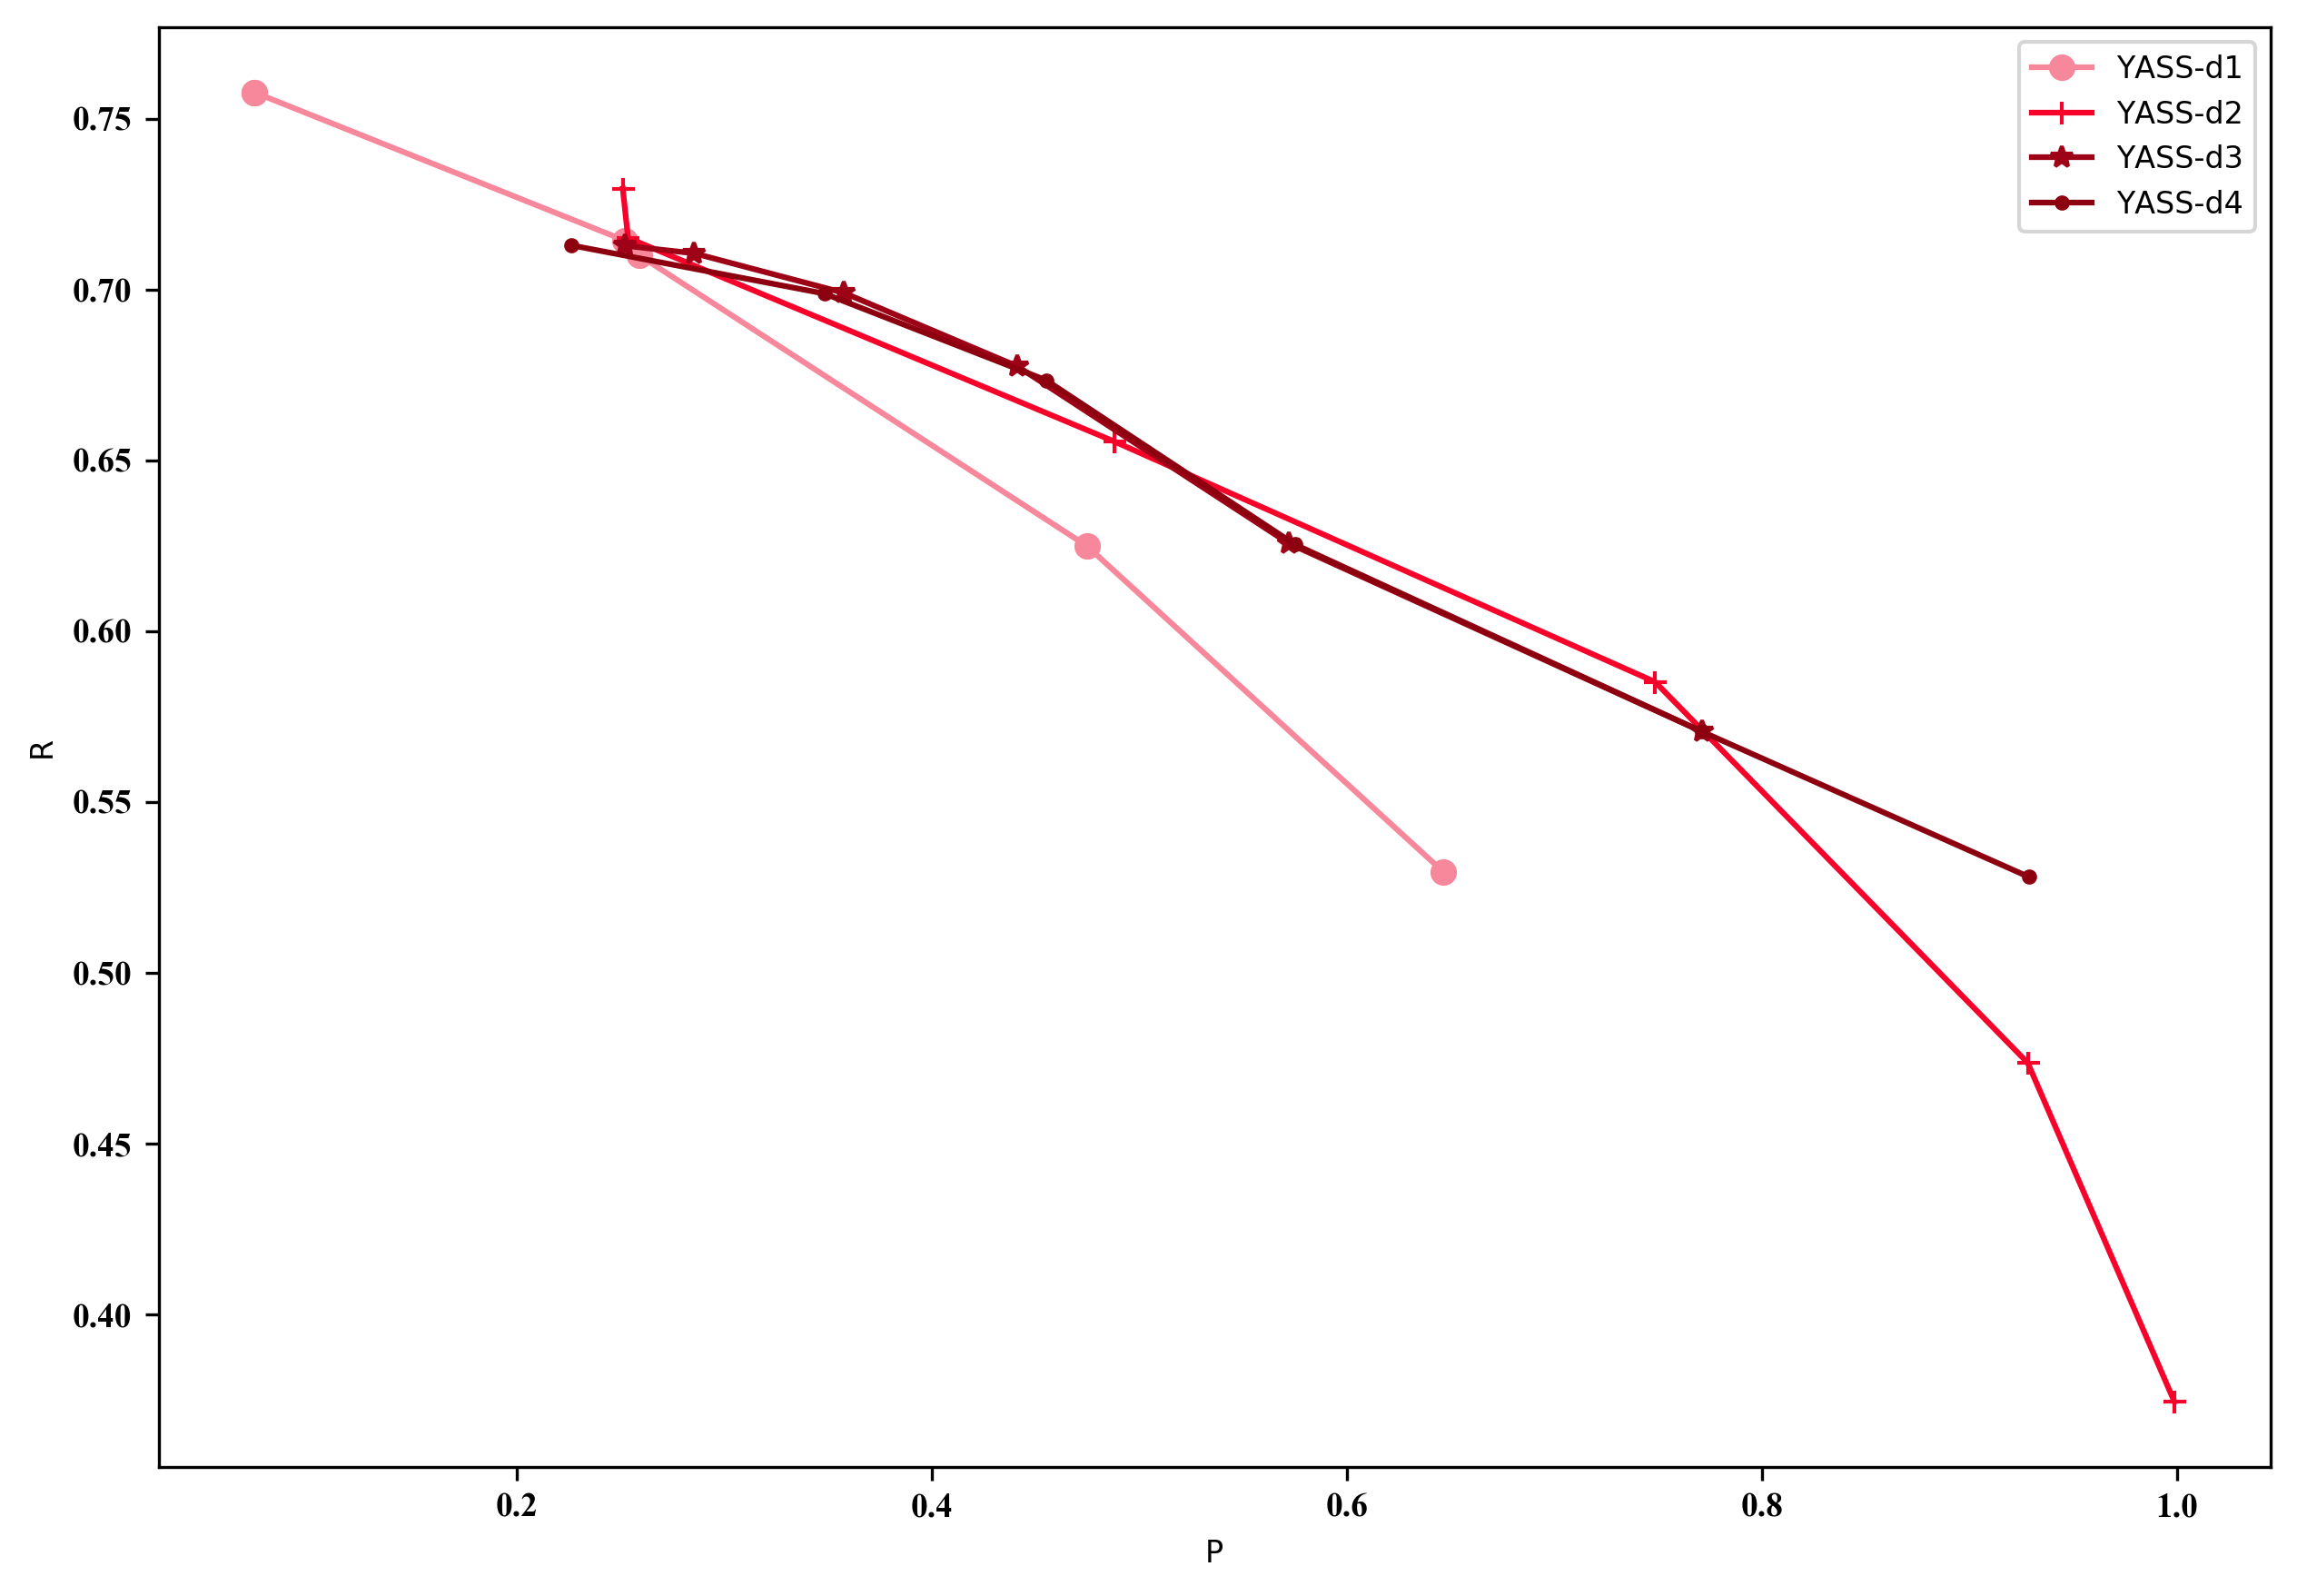

In [608]:
plot_p_vs_r(['P', 'R'], [5, 6],
           )
            #'YASS_PR')

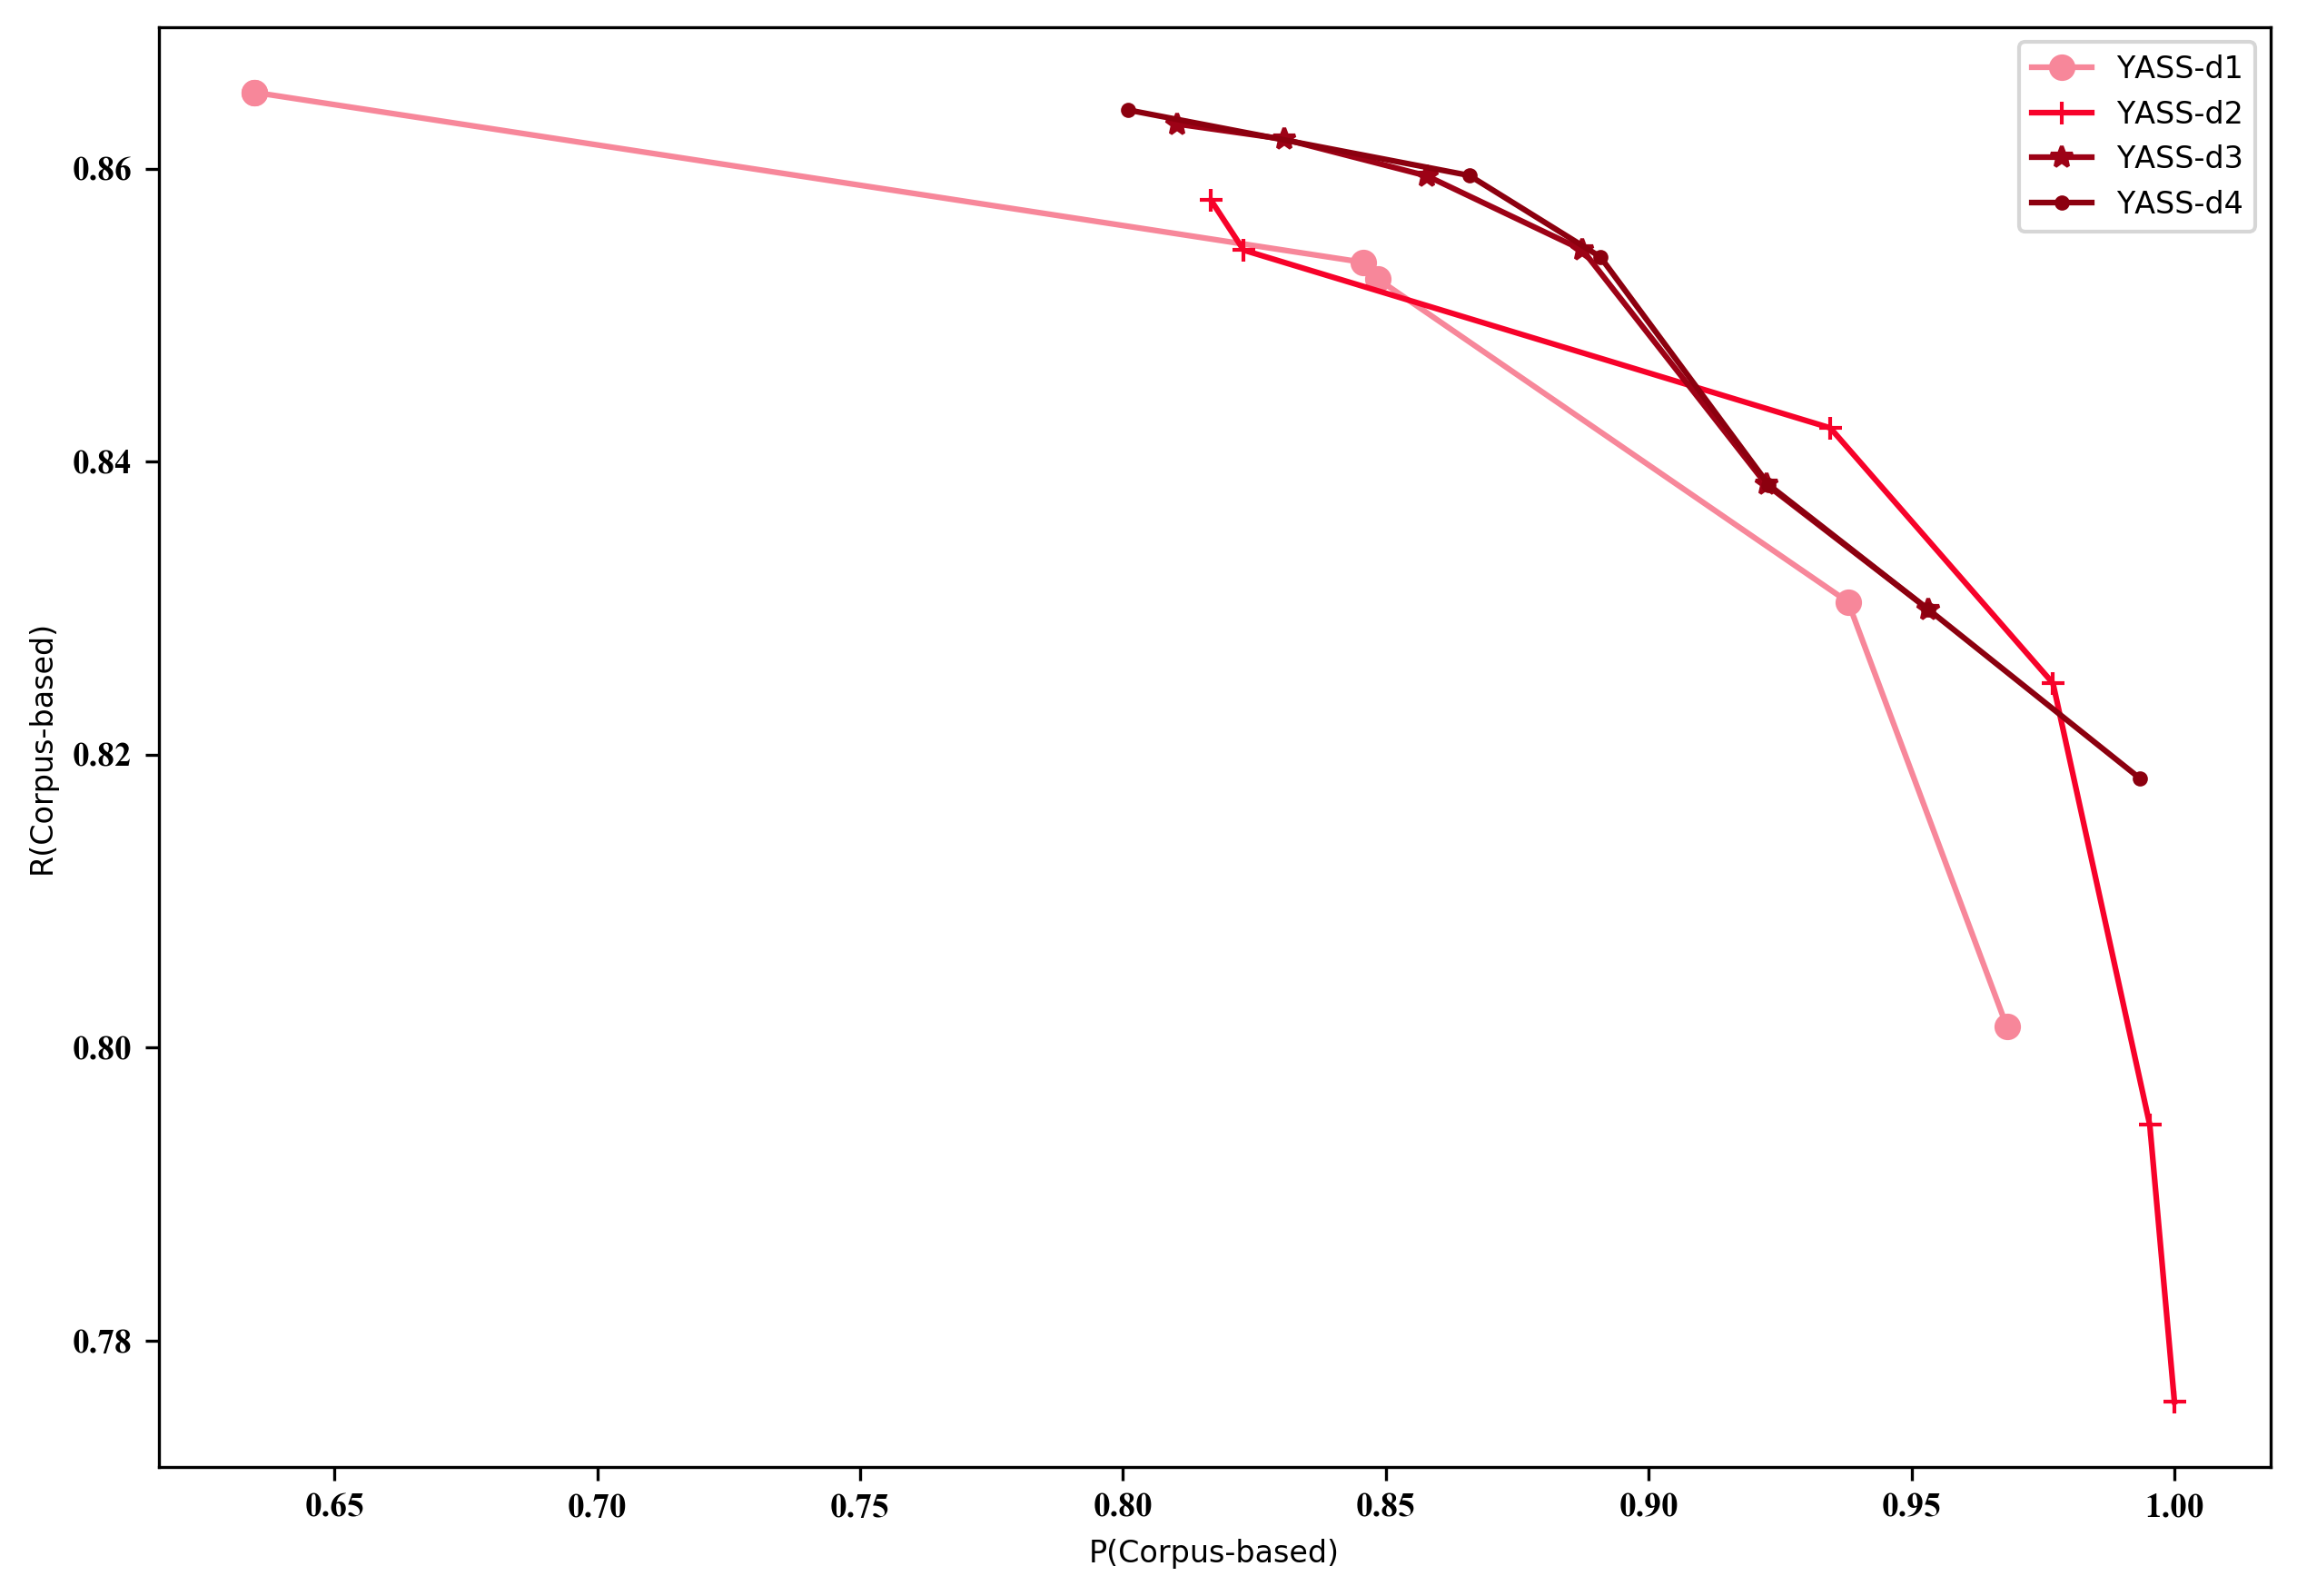

In [611]:
plot_p_vs_r(['P(Corpus-based)', 'R(Corpus-based)'], [8, 9],
           )
            #'YASS_PRC')

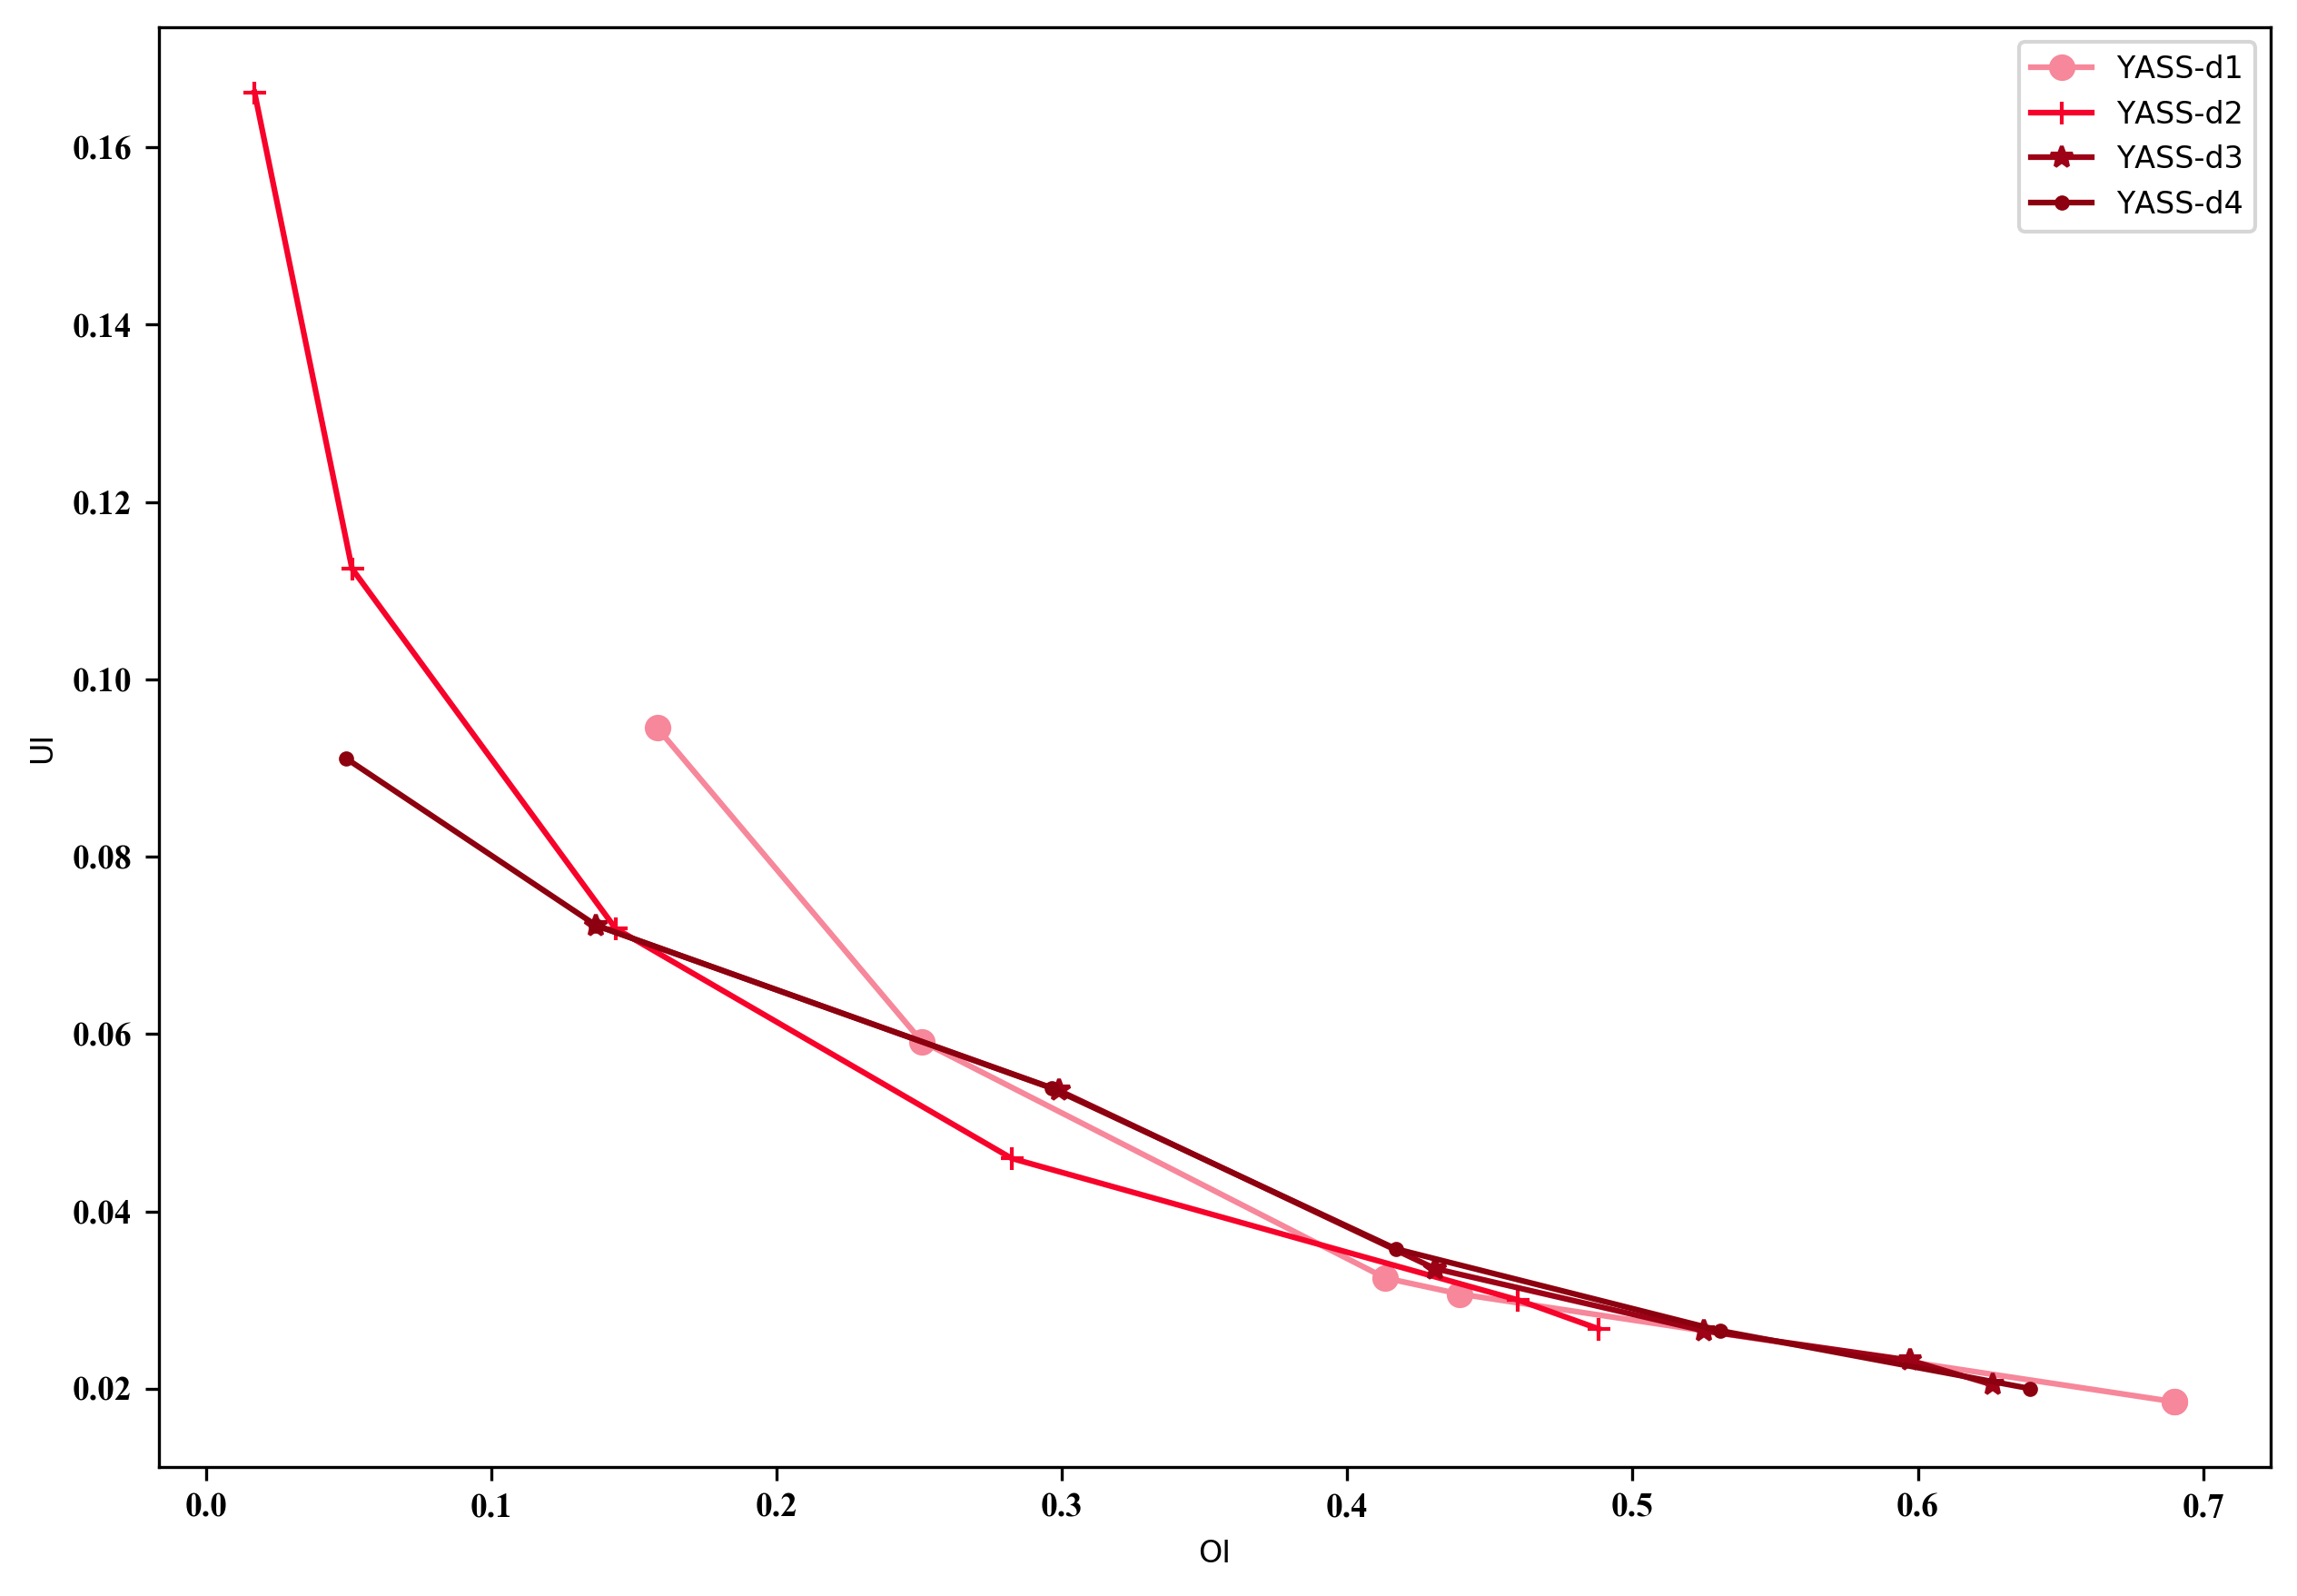

In [614]:
plot_p_vs_r(['OI', 'UI'], [0, 1],
           )
            #'YASS_OUI')

In [32]:
stemmers = ['NOSTEM', 'Porter', 'Lovins', 'HMM-HMM-4-5', 'HMM-HMM-4-6', 'HMM-HMM-5-3',
           'HMM-HMM-5-4', 'HMM-HMM-5-5', 'HMM-HMM-5-6', 'HMM-HMM-6-5', 'SNG-n-3',
           'SNG-n-4', 'SNG-n-5', 'SNG-n-6', 'SNG-n-7', 'YASS-d1-threshold-0.05',
           'YASS-d1-threshold-0.1', 'YASS-d1-threshold-0.15', 'YASS-d1-threshold-0.2',
           'YASS-d1-threshold-0.25', 'YASS-d1-threshold-0.3', 'YASS-d2-threshold-0.1',
           'YASS-d2-threshold-0.2', 'YASS-d2-threshold-0.3', 'YASS-d2-threshold-0.4',
           'YASS-d2-threshold-0.5', 'YASS-d2-threshold-0.6', 'YASS-d3-threshold-0.5',
           'YASS-d3-threshold-1.0', 'YASS-d3-threshold-1.5', 'YASS-d3-threshold-2.0',
           'YASS-d3-threshold-2.5', 'YASS-d3-threshold-3.0', 'YASS-d4-threshold-0.2',
           'YASS-d4-threshold-0.4', 'YASS-d4-threshold-0.6', 'YASS-d4-threshold-0.8',
           'YASS-d4-threshold-1.0', 'YASS-d4-threshold-1.2']

In [33]:
for domain in list(matrics.keys()):
    output_file_path = evaluate_result_path + '\\' + domain + '\\overall_result.txt' 
    output_file = open(output_file_path, 'w', encoding='utf-8')
    output_file.write('\t'.join(['Stemmer_name', 'OI', 'UI', 'RI', 'AOL', 
                      'AUL', 'P', 'R', 'F1', 'PC', 'RC', 'F1C']) + '\n')
    for stemmer in stemmers:
        if stemmer not in matrics[domain].keys():
            continue
        m = matrics[domain][stemmer]
        output_file.write('%s\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\n'
                         % (stemmer, m.OI, m.UI, m.RI, m.AOL, m.AUL, m.P, m.R, m.F1, m.PC, m.RC, m.F1C))
    
    output_file.close()

In [35]:
domains = list(matrics.keys())
for stemmer in stemmers:
    output_file_path = evaluate_result_path + '\\' + stemmer + '.over_result.txt'
    output_file = open(output_file_path, 'w', encoding='utf-8')
    output_file.write('\t'.join(['Domain', 'OI', 'UI', 'RI', 'AOL', 
                      'AUL', 'P', 'R', 'F1', 'PC', 'RC', 'F1C']) + '\n')
    for domain in domains:
        if stemmer not in matrics[domain].keys():
            continue
        m = matrics[domain][stemmer]
        output_file.write('%s\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\n'
                         % (domain, m.OI, m.UI, m.RI, m.AOL, m.AUL, m.P, m.R, m.F1, m.PC, m.RC, m.F1C))
    output_file.close()